# **Capstone Project: Providing Data-Driven Suggestions for HR**
### Using PACE (Plan, Analyze, Construct, Execute)

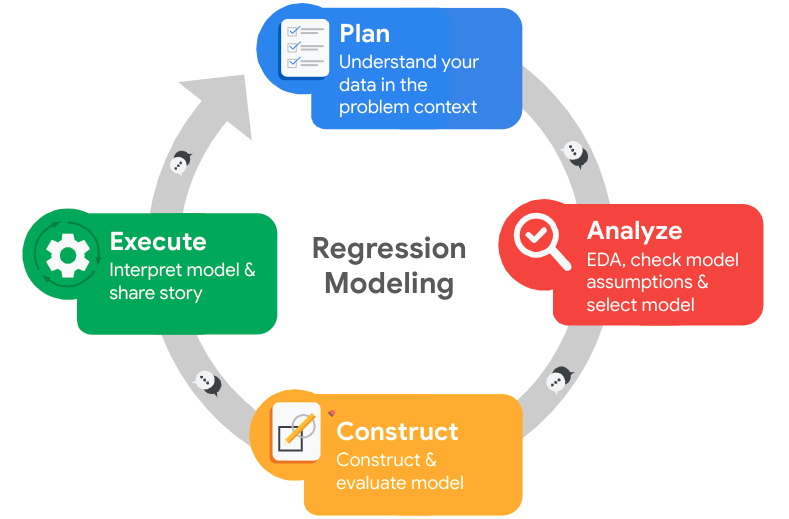

# **Pace: Plan**

---------------------------------------------------------------------------------------------------------------------------------------------

## The Business Scenario and Problem:

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

---------------------------------------------------------------------------------------------------------------------------------------------

The dataset in this scenario contains 15,000 rows and 10 columns for the variables listed below.

| Variable | Description |
|---|---|
| satisfaction_level | Employee-reported job satisfaction level [0–1] |
| last_evaluation | Score of employee's last performance review [0–1] |
| number_project | Number of projects employee contributes to |
| average_monthly_hours | Average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years) |
| Work_accident | Whether or not the employee experienced an accident while at work |
| left | Whether or not the employee left the company |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years |
| Department | The employee's department |
| salary | The employee's salary (U.S. dollars) |

---------------------------------------------------------------------------------------------------------------------------------------------

### Reflection Questions for the Plan Stage:

1. Who are your stakeholders for this project?
2. What are you trying to solve or accomplish?
3. What are your initial observations when you explore the data?
4. What resources do you find yourself using as you complete this stage?
5. Do you have any ethical considerations at this stage?


---------------------------------------------------------------------------------------------------------------------------------------------

### Reflection Results (Post Plan Phase): 
1. My stakeholders for this project is the HR department of Salifort Motors.
2. Per request, I’m trying to find out why turnover is high among Salifort employees and develop a model that can help predict and prevent turnover.   Finding out why will help Salifort Motors retain employees and save money and resources.
3. The data is composed of int64, float64, and object data types.  There are no nulls, but 3008 duplicates (these were dropped after consideration).  There are 824 outliers in the tenure column composed of employees who worked 6 or more years.
4. Currently, I need the employee survey data collected by HR.  I will use Python with appropriate packages to clean and process the data.  Afterwards, I will use Python to develop some machine learning models to predict and prevent employee turnover.  Dataset for reference [here.](https://www.kaggle.com/datasets/tohidkhanbagani/salifort-dataset/data) <- (This data is open source and open to public use.)
5. There are no ethical considerations at this time.  The data doesn't contain any identifiers such as name, gender, username, or other sensitive identifiable information.
----------------------------------------------------------------------------------------------------------------------------------------

## Step 1. Import and Load

*   Import packages
*   Load dataset

### Import packages:
- These packages were added below as needed throughout by notebook:

In [21]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

from sklearn import naive_bayes
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from collections import Counter
import math
import warnings

### Importing and Loading the Data

In [2]:
#IMPORTING DATA. 
# Load dataset into a dataframe
path = r"C:\Users\markw\Desktop\Advanced Good Data Analytics\Lab Files - Google Advanced Data Analytics\Capstone - Google Advanced Data Analytics\\HR_comma_sep.csv"
df0 = pd.read_csv(path)

# Display first few rows of the dataframe
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

----------------------------------------------------------------------------------------------------------------------------------------
## Step 2. Data Exploration (Initial Exploratory Data Analysis and Data Cleaning)

- Understand your variables
- Clean your dataset (missing data, misspellings, redundant data, outliers)

## Important Note: 
- Exploratory Data Analysis will be labeled as '__<u>EDA</u>__' from this point onward.

### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns={'promotion_last_5years': 'recent_promotion', \
                    'average_montly_hours': 'avg_monthly_hours', 
                    'time_spend_company': 'tenure', 'Department': 'department', 'Work_accident': \
                   'work_accident'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'recent_promotion', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level    0
last_evaluation       0
number_project        0
avg_monthly_hours     0
tenure                0
work_accident         0
left                  0
recent_promotion      0
department            0
salary                0
dtype: int64

In [8]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [9]:
# Inspecting rows that are duplicated
print(df0[df0.duplicated()])

       satisfaction_level  last_evaluation  number_project  avg_monthly_hours  \
396                  0.46             0.57               2                139   
866                  0.41             0.46               2                128   
1317                 0.37             0.51               2                127   
1368                 0.41             0.52               2                132   
1461                 0.42             0.53               2                142   
...                   ...              ...             ...                ...   
14994                0.40             0.57               2                151   
14995                0.37             0.48               2                160   
14996                0.37             0.53               2                143   
14997                0.11             0.96               6                280   
14998                0.37             0.52               2                158   

       tenure  work_acciden

### **Note:**
* These duplications in the above code are unlikely to occur naturally.  Removing them would be the most logical conclusion.

In [10]:
# Drop duplicate values and save resulting dataframe (df1) as a new variable
df1 = df0.drop_duplicates()

# Check for duplications in new dataframe
print('Duplicated Values in Dataframe:', df1.duplicated().sum())

Duplicated Values in Dataframe: 0


In [12]:
# Display first few rows of new dataframe
df1.head(7)

satisfaction_level  last_evaluation  number_project  avg_monthly_hours  \
0                0.38             0.53               2                157   
1                0.80             0.86               5                262   
2                0.11             0.88               7                272   
3                0.72             0.87               5                223   
4                0.37             0.52               2                159   
5                0.41             0.50               2                153   
6                0.10             0.77               6                247   

   tenure  work_accident  left  recent_promotion department  salary  
0       3              0     1                 0      sales     low  
1       6              0     1                 0      sales  medium  
2       4              0     1                 0      sales  medium  
3       5              0     1                 0      sales     low  
4       3              0     1                 0      sales     low  
5       3              0     1                 0      sales     low  
6       4              0     1                 0      sales     low

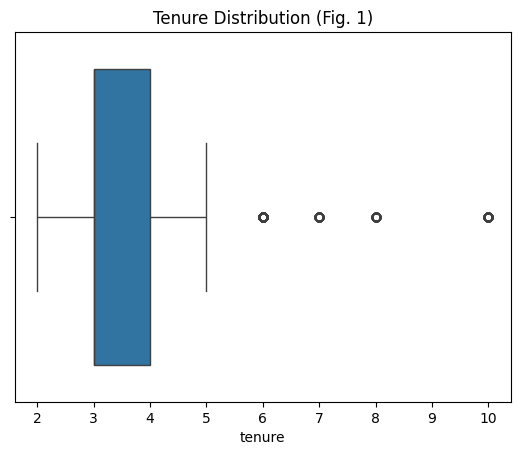

In [171]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x="tenure", data=df1)
plt.title("Tenure Distribution (Fig. 1)")
plt.show()

### Important Note For Tenure Box Plot (Fig. 1):
- A box plot was created for each relevant independent variable above.
    - It was found that 'tenure' was the only variable with significant outliers.
    - In turn, I only displayed tenure to keep the notebook concise and show relevant data only. 

In [172]:
# Determine the number of tenure rows containing outliers

# Determining Inner Quartile Range
percent25 = df1['tenure'].quantile(0.25)
percent75 = df1['tenure'].quantile(0.75)
innerquartilerange = percent75 - percent25

# Defining Upper and Lower Limits
uplimit = abs(innerquartilerange * 1.5 + percent75)
lowlimit = abs(innerquartilerange * 1.5 - percent25)

print('Upper Limit Tenure:', uplimit)
print('Lower Limit Tenure:', lowlimit)

# Finding Total Number of Outliers
long_tenure_amount = {}
for i in df1['tenure']:
    if i > uplimit or i < lowlimit:
        if i in long_tenure_amount:
            long_tenure_amount[i] += 1
        else:
            long_tenure_amount[i] = 1


print('Total Outliers in Tenure:', sum(long_tenure_amount.values()))

Upper Limit Tenure: 5.5
Lower Limit Tenure: 1.5
Total Outliers in Tenure: 824


### Note:
Certain types of models are more sensitive to outliers than others. We'll need to decide whether to include/exclude outliers during model development.

----------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------


# pAce: Analyze Stage
- Perform Exploratory Data Analysis (EDA)
    - Analyze relationships between variables.
----------------------------------------------------------------------------------------------------------------------------------------

## Reflection Questions During Analyze Stage:

1. What did you observe about the relationships between variables?
2. What do you observe about the distributions in the data?
3. What transformations did you make with your data? Why did you choose to make those decisions?
4. What are some purposes of EDA before constructing a predictive model?
5. What resources do you find yourself using as you complete this stage?
6. Do you have any ethical considerations in this stage?
----------------------------------------------------------------------------------------------------------------------------------------

## Reflection Results (Post Exploration and Analysis):
1. There were a lot of important and interesting observations that can't be summarized in one to two sentences.  See the **<u>Generalized Insights:</u>** below for a full analysis and discussion **OR** skip over to the **<u>Final EDA Insights Summary:</u>** section for the most important insights only.
2. See **<u>Generalized Insights:</u>** and/or **<u>Final EDA Insights Summary:</u>** below for more information.
3. Besides correcting misspellings and shortening column names, the 'salary' column was encoded and the 'department' was dummy encoded since they both contained the string type variable.  String variables can't easily be processed or utilized by Python's built-in graphing functions, statistical models, or machine learning algorithms without conversion.  Further transformations and feature engineering will likely occur during the construct phase as needed for model testing.
4. The purpose of EDA before model construction is to understand the data, find patterns and trends, see what variables correlate more strongly with one another, and (if necessary) transform the data to prepare for model construction.  
5. At this phase, I'm using Python w/Jupyter Notebooks along with AI assistance.
6. Even though the data contained no personally identifiable information, the data set potentially showed some form of data manipulation/bias with how satisfaction level surveys were conducted.  See the satisfaction level sections in **<u>Generalized Insights:</u>** or **<u>Final EDA Insights Summary:</u>** for a more thorough analysis and breakdown of the issue.
----------------------------------------------------------------------------------------------------------------------------------------

## <u>Important Note:</u>
- The next two coding sections are my raw, unoptimized EDA of the Turnover Dataset.
- I left it in here to provide a reference to how I initially performed my EDA and how it led to my findings in the 'General EDA Insights Section:'.
- Skip over to the **<u>Generalized EDA Insights:</u>** section if you want to see the organized analysis and insights of my EDA process.
- **<u>OR</u>**
- If you are short on time, skip down to the **<u>Final EDA Insights Summary:</u>** for the most important insights and subsequent suggestions.
----------------------------------------------------------------------------------------------------------------------------------------

## <u>EDA Aggregations (Raw):</u>

In [173]:
#EDA of Turnovered Employees Grouped With Different Variables (1 = Left)

print('Turnover Counts: (1 = Left)\n', df1['left'].value_counts(), '\n', sep='')
print('Turnover Percentages:\n', str(df1['left'].value_counts(normalize=True)*100), '\n', sep='')

np_l_counts = df1.groupby('number_project')['left'].value_counts().rename('Counts')
np_l_normalized = df1.groupby('number_project')['left'].value_counts(normalize=True).rename('Percentage')*100 
np_l_result = pd.concat([np_l_counts, np_l_normalized], axis=1).reset_index()
print('Turnover Count by Project: \n', np_l_result, '\n', sep='')

l_np_counts = df1.groupby('left')['number_project'].value_counts().rename('Counts')
l_np_normalized = df1.groupby('left')['number_project'].value_counts(normalize=True).rename('Percentage')*100 
l_np_result = pd.concat([l_np_counts, l_np_normalized], axis=1).reset_index()
print('Turnover Count Ranking by Project: \n', l_np_result, '\n', sep='')

t_l_counts = df1.groupby('tenure')['left'].value_counts().rename('Counts')
t_l_normalized = df1.groupby('tenure')['left'].value_counts(normalize=True).rename('Percentage')*100 
t_l_result = pd.concat([t_l_counts, t_l_normalized], axis=1).reset_index()
print('Turnover Count by Tenure: \n', t_l_result, '\n', sep='')

l_t_counts = df1.groupby('left')['tenure'].value_counts().rename('Counts')
l_t_normalized = df1.groupby('left')['tenure'].value_counts(normalize=True).rename('Percentage')*100 
l_t_result = pd.concat([l_t_counts, l_t_normalized], axis=1).reset_index()
print('Turnover Count Ranking by Tenure: \n', l_t_result, '\n', sep='')

d_l_counts = df1.groupby('department')['left'].value_counts().rename('Counts')
d_l_normalized = df1.groupby('department')['left'].value_counts(normalize=True).rename('Percentage')*100 
d_l_result = pd.concat([d_l_counts, d_l_normalized], axis=1).reset_index()
print('Turnover by Department: \n', d_l_result, '\n', sep='')

s_l_counts = df1.groupby('salary')['left'].value_counts().rename('Counts')
s_l_normalized = df1.groupby('salary')['left'].value_counts(normalize=True).rename('Percentage')*100 
s_l_result = pd.concat([s_l_counts, s_l_normalized], axis=1).reset_index()
print('Turnover by Salary: \n', s_l_result, '\n', sep='')

l_s_counts = df1.groupby('left')['salary'].value_counts().rename('Counts')
l_s_normalized = df1.groupby('left')['salary'].value_counts(normalize=True).rename('Percentage')*100 
l_s_result = pd.concat([l_s_counts, l_s_normalized], axis=1).reset_index()
print('Turnover Count Ranking by Salary: \n', l_s_result, '\n', sep='')

accident_counts = df1['work_accident'].value_counts().rename('Counts')
accident_normalized = df1['work_accident'].value_counts(normalize=True).rename('Percentage')*100 
accident_result = pd.concat([accident_counts, accident_normalized], axis=1)
print('Accident Count: \n', accident_result, '\n', sep='')

w_l_counts = df1.groupby('work_accident')['left'].value_counts().rename('Counts')
w_l_normalized = df1.groupby('work_accident')['left'].value_counts(normalize=True).rename('Percentage')*100 
w_l_result = pd.concat([w_l_counts, w_l_normalized], axis=1).reset_index()
print('Turnover by Work Accident: \n', w_l_result, '\n', sep='')

r_l_counts = df1.groupby('recent_promotion')['left'].value_counts().rename('Counts')
r_l_normalized = df1.groupby('recent_promotion')['left'].value_counts(normalize=True).rename('Percentage')*100 
r_l_result = pd.concat([r_l_counts, r_l_normalized], axis=1).reset_index()
print('Turnover by Recent Promotion: \n', r_l_result, '\n', sep='')

w_d_counts = df1.groupby('department')['work_accident'].value_counts().rename('Counts')
w_d_normalized = df1.groupby('department')['work_accident'].value_counts(normalize=True).rename('Percentage')*100 
w_d_result = pd.concat([w_d_counts, w_d_normalized], axis=1).reset_index()
print('Work Accidents by Department: \n', w_d_result, '\n', sep='')

print('Turnover Average and Median by Satisfaction Level: \n', df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])*100, sep='')

Turnover Counts: (1 = Left)
left
0    10000
1     1991
Name: count, dtype: int64

Turnover Percentages:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

Turnover Count by Project: 
    number_project  left  Counts  Percentage
0                2     1     857   54.171934
1                2     0     725   45.828066
2                3     0    3482   98.920455
3                3     1      38    1.079545
4                4     0    3448   93.568521
5                4     1     237    6.431479
6                5     0    1890   84.639498
7                5     1     343   15.360502
8                6     0     455   55.084746
9                6     1     371   44.915254
10               7     1     145  100.000000

Turnover Count Ranking by Project: 
    left  number_project  Counts  Percentage
0      0               3    3482   34.820000
1      0               4    3448   34.480000
2      0               5    1890   18.900000
3      0               2     725    7.250000

## EDA Visualizations (Raw)

In [174]:
# Checking Data Types Pre-Transformation
df1.dtypes

satisfaction_level    float64
last_evaluation       float64
number_project          int64
avg_monthly_hours       int64
tenure                  int64
work_accident           int64
left                    int64
recent_promotion        int64
department             object
salary                 object
dtype: object

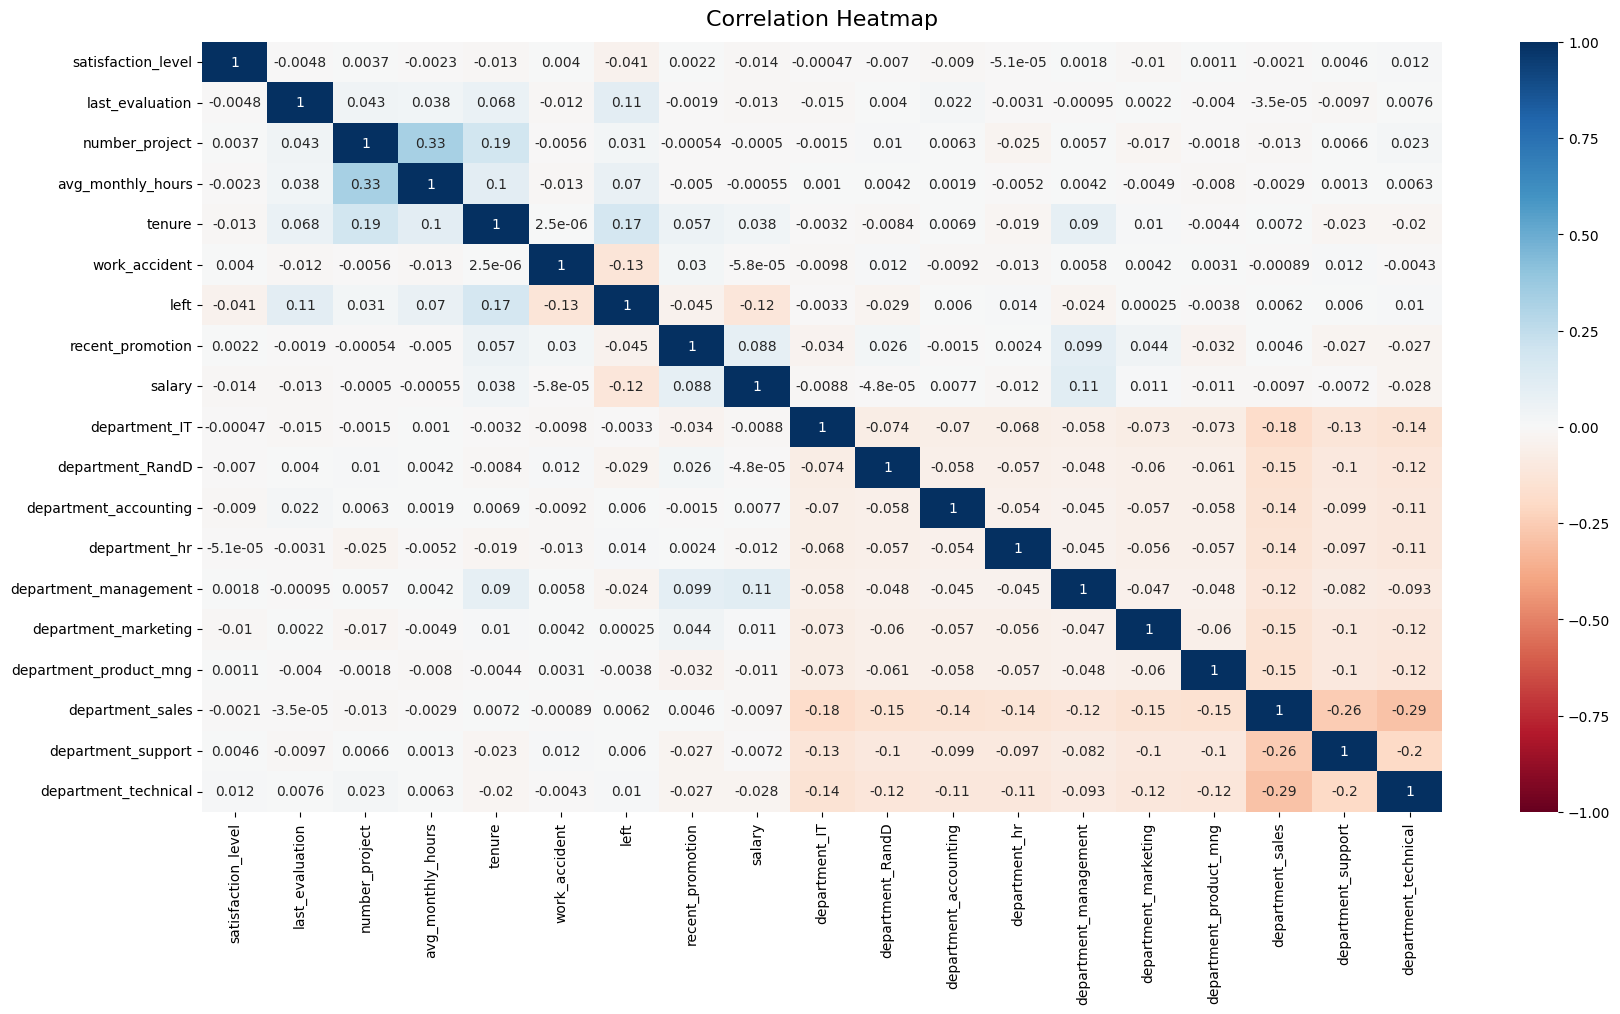

In [175]:
#To See Correlation Between Variables

#Need to encode Salary and Department 
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
df_enc = df1.copy()
df_enc['salary'] = df_enc['salary'].map(salary_codes)
df_enc = pd.get_dummies(df_enc, drop_first=False).astype(int)
df_enc.head(5)

# The Heat Map
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_enc.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

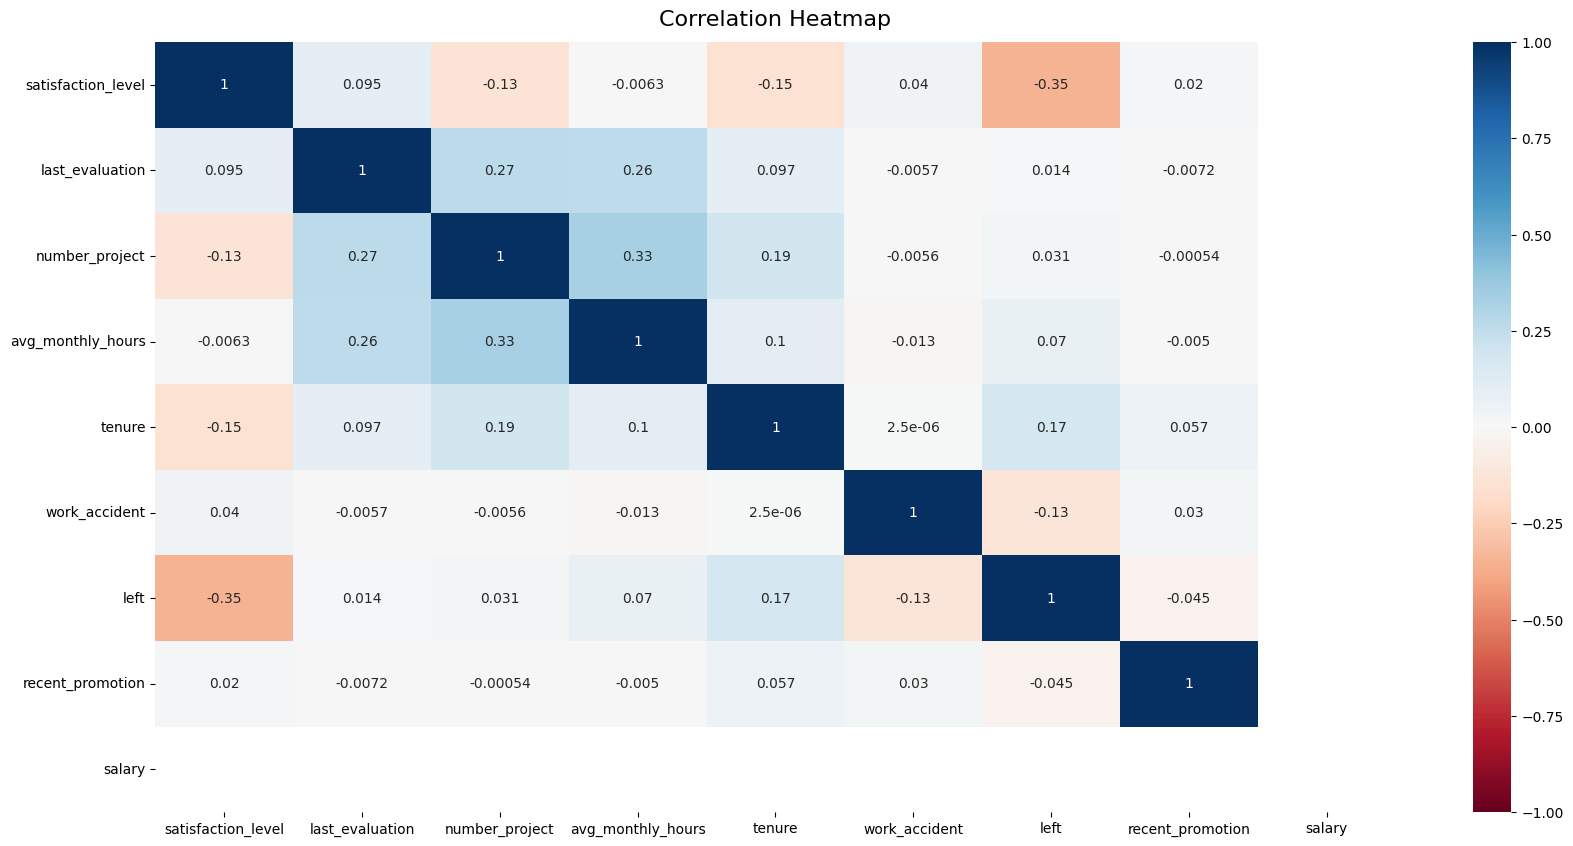

In [176]:
#Simplified Correlation Between Variables

#Need to encode salary and drop department 
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
df_enc2 = df1.copy()
df_enc2['salary'] = df_enc['salary'].map(salary_codes)
df_enc2 = df_enc2.drop(columns = 'department')
df_enc.head(5)

# Simplified Correlation Heat Map
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_enc2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);


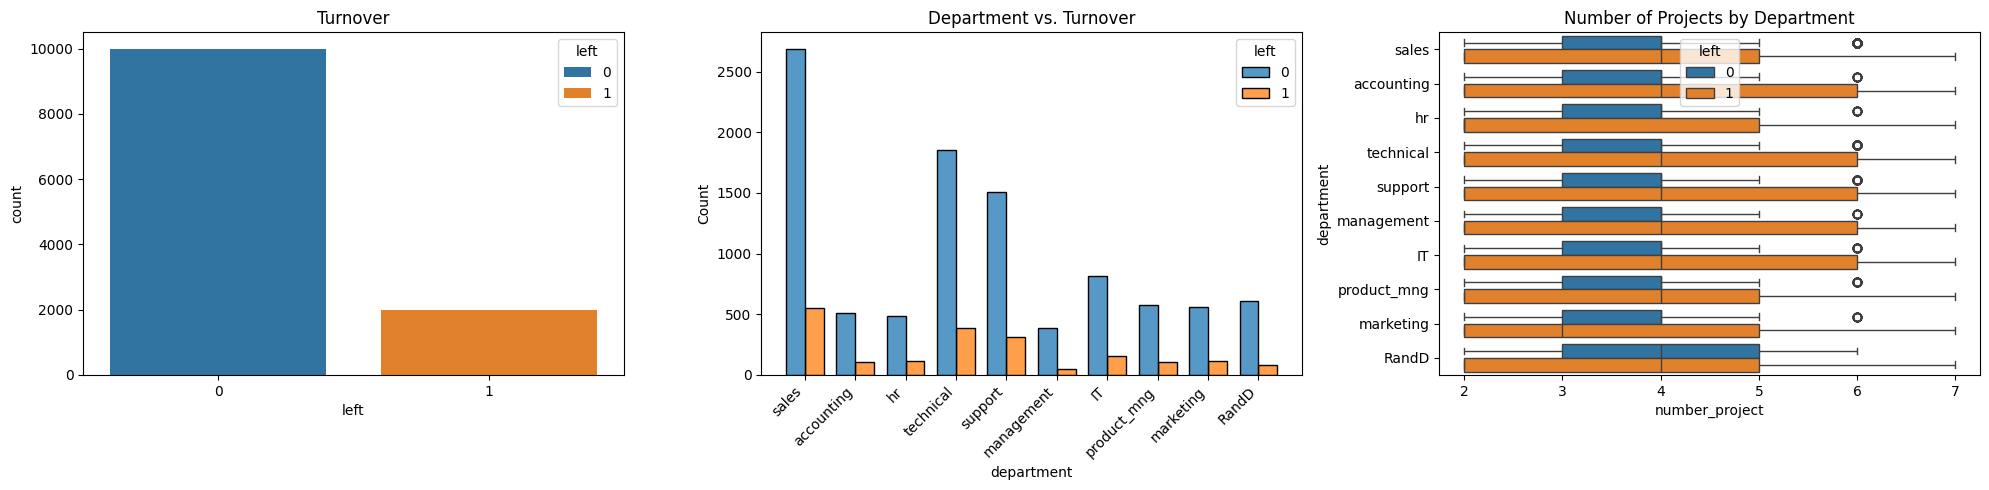

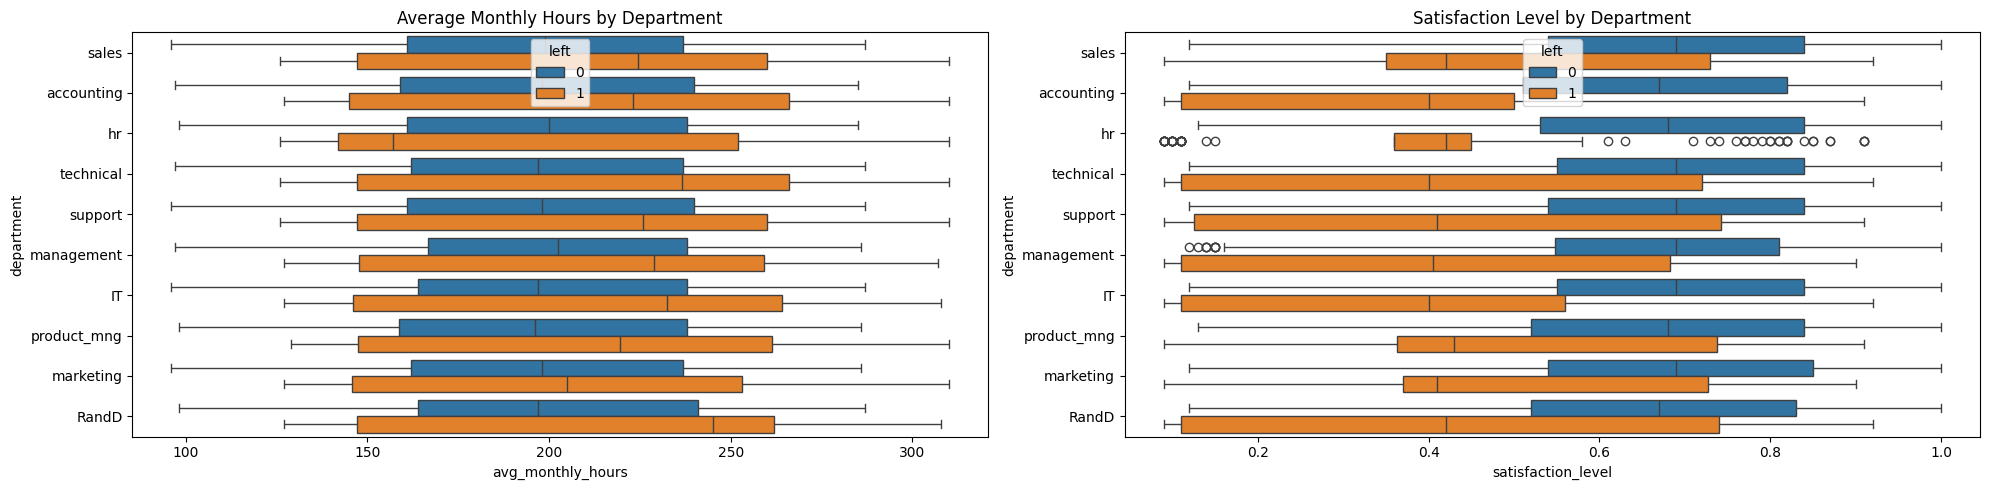

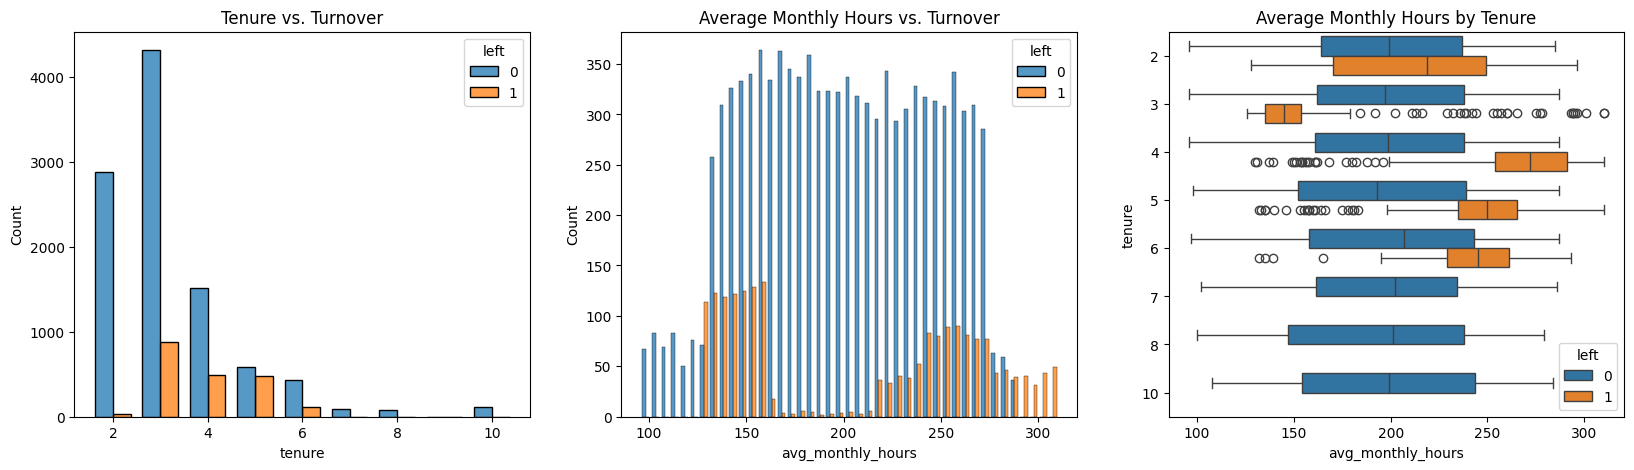

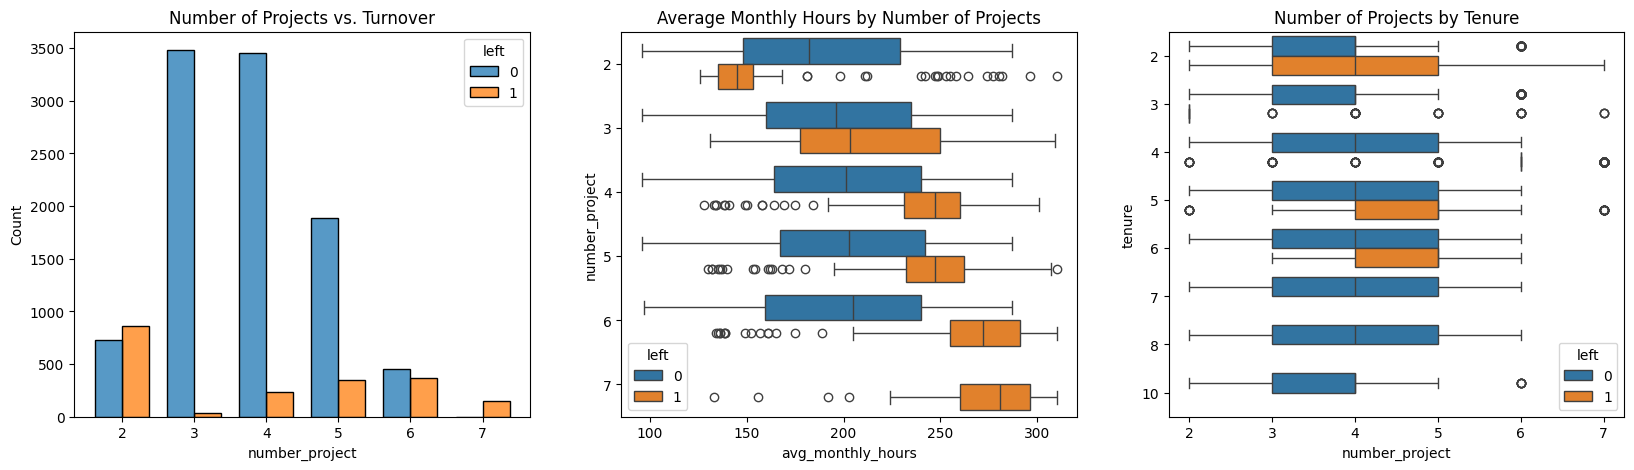

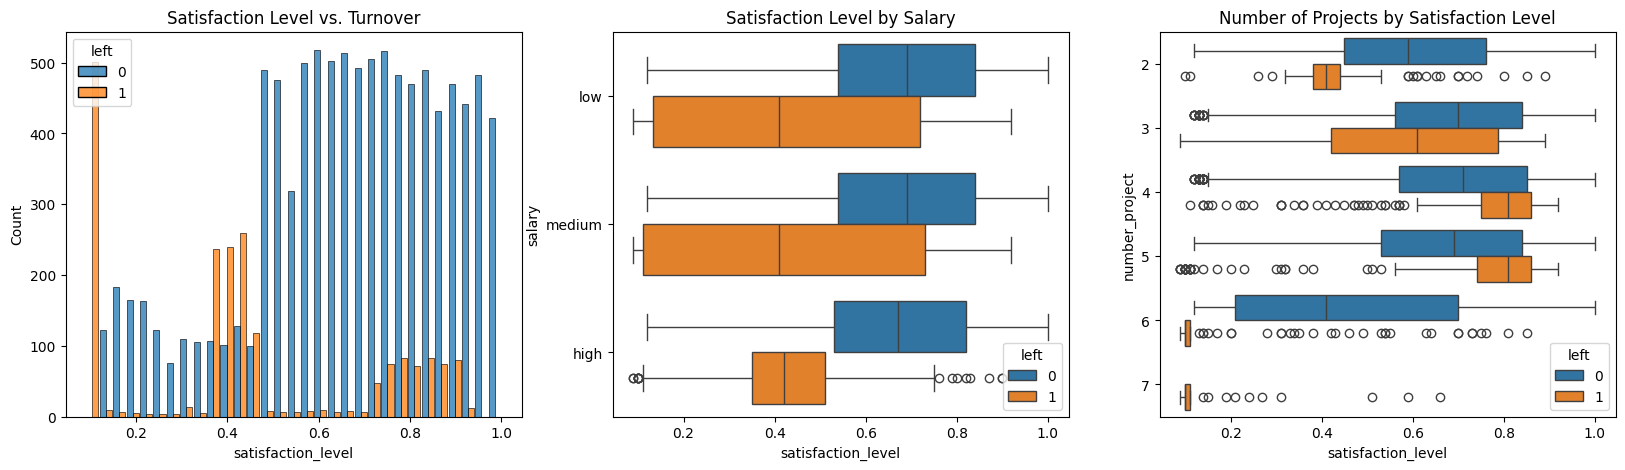

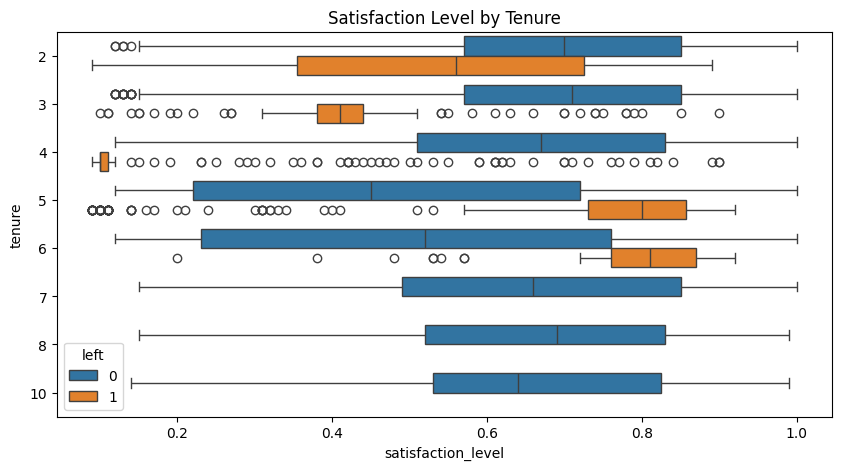

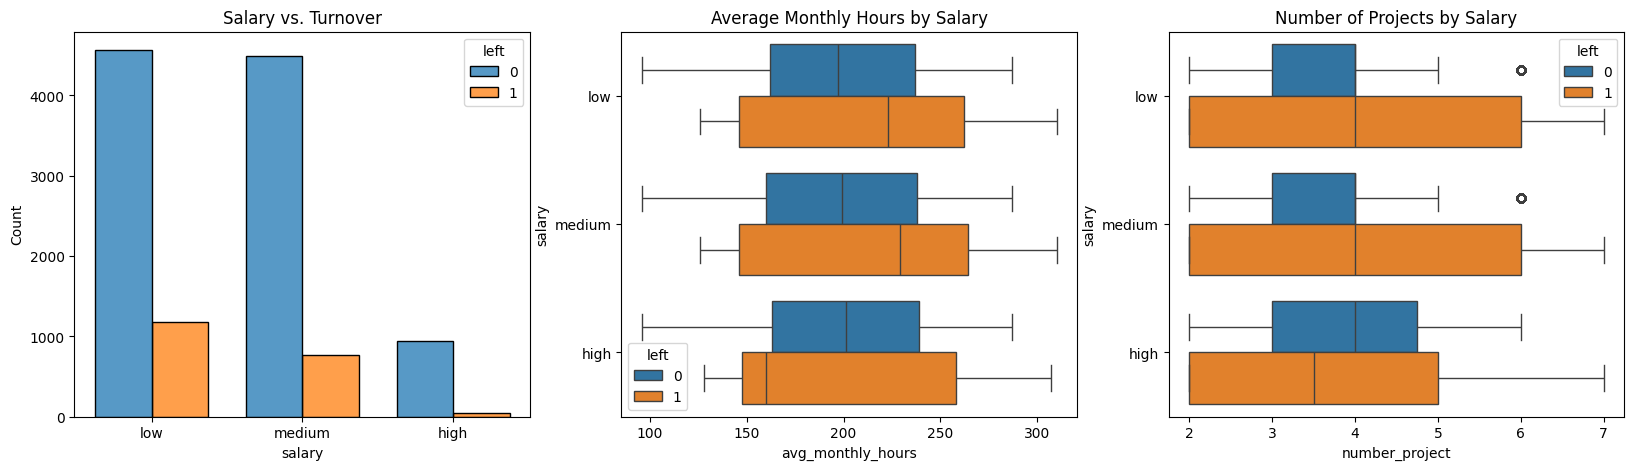

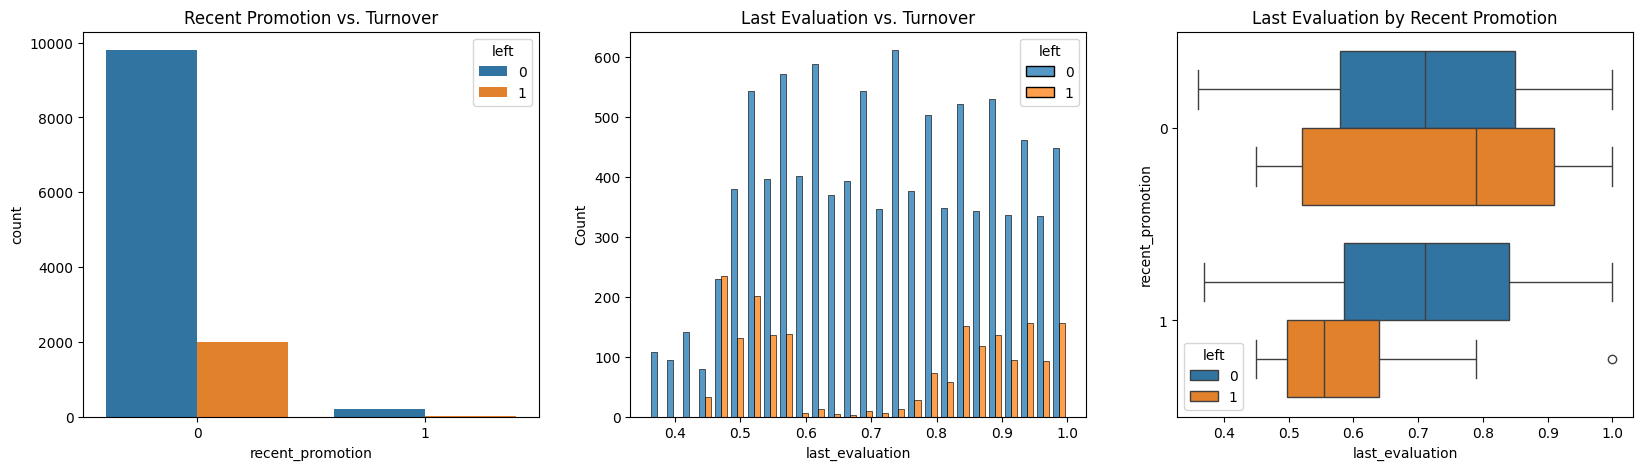

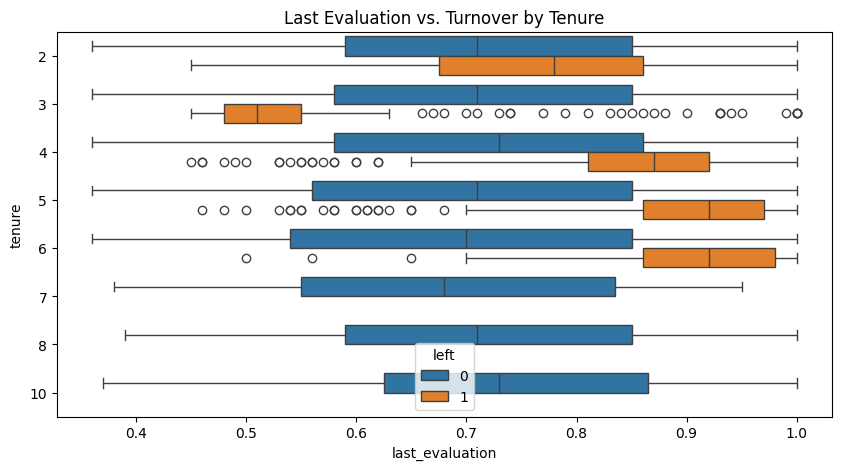

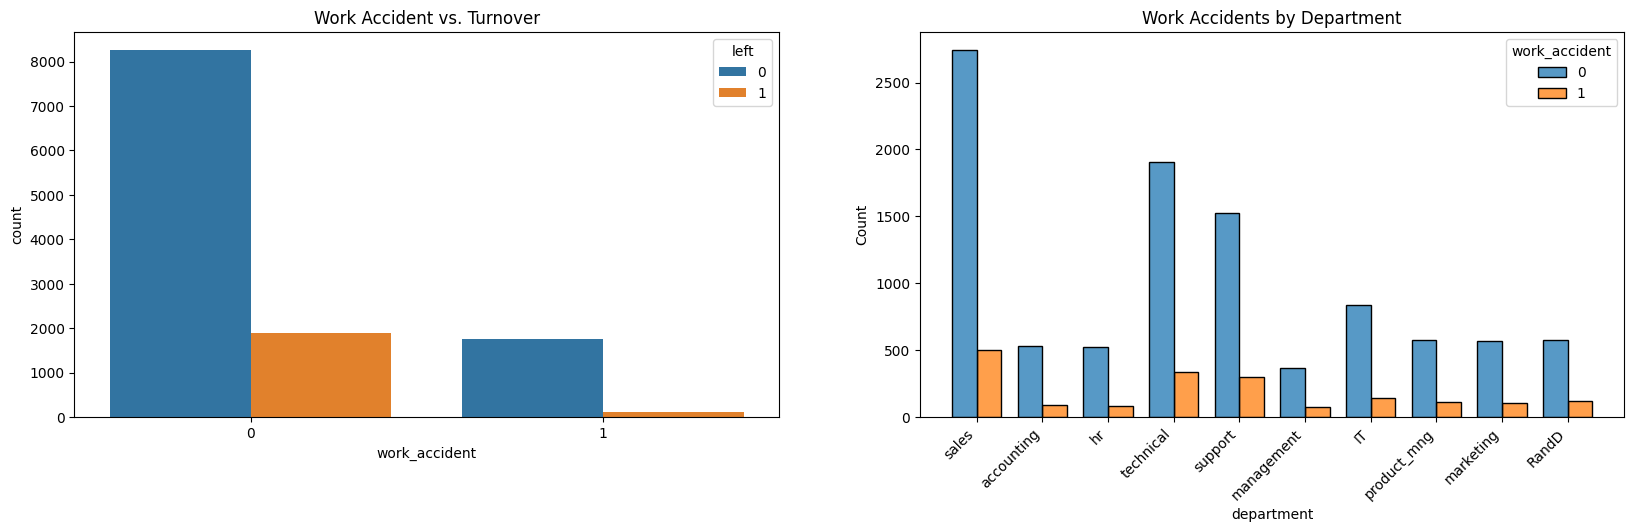

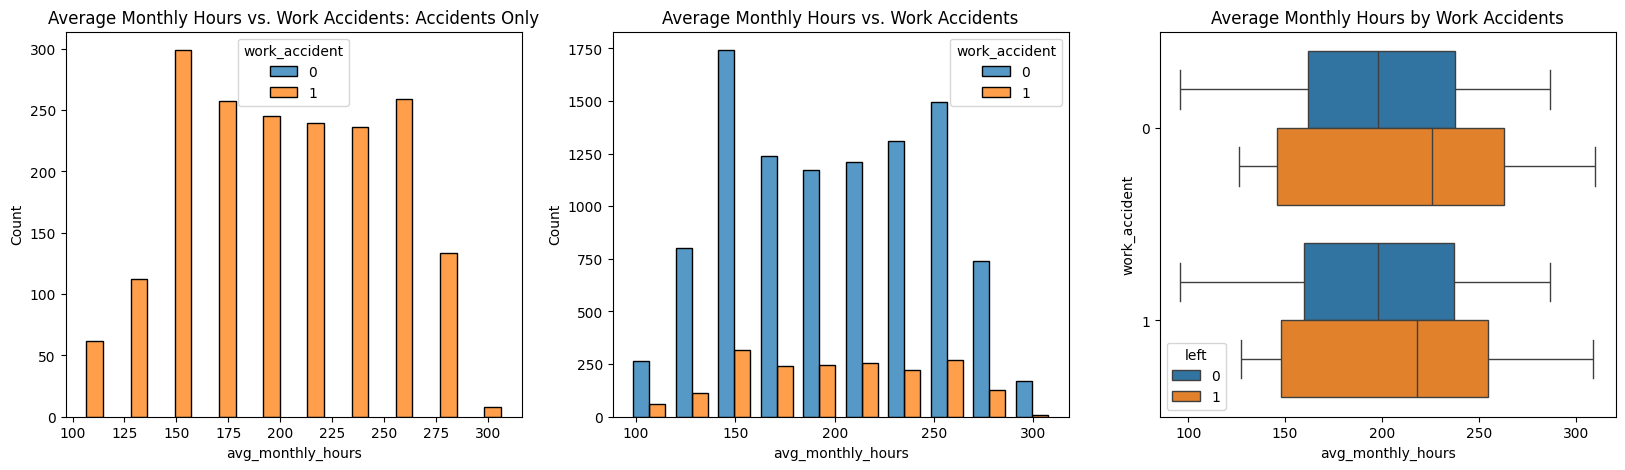

In [177]:
#EDA Visualization Pre-Modeling

#EDA Visualizations 1
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x = 'left', hue = 'left', data=df1, ax=axes[0])
axes[0].set_title('Turnover') 
sns.histplot(x='department', hue='left', data=df1, hue_order=[0, 1], discrete=1, multiple='dodge', shrink=.75, ax=axes[1])
axes[1].set_xticks(np.arange(len(df1['department'].unique()))) # Set tick locations
axes[1].set_xticklabels(df1['department'].unique(), rotation=45, ha='right')
axes[1].set_title('Department vs. Turnover') 
sns.boxplot(x='number_project', y='department', hue='left', data=df1, orient="h", ax=axes[2])
axes[2].set_title('Number of Projects by Department') 
plt.tight_layout()

#EDA Visualizations 2
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x='avg_monthly_hours', y='department', hue='left', data=df1, orient="h", ax=axes[0])
axes[0].set_title('Average Monthly Hours by Department') 
sns.boxplot(x='satisfaction_level', y='department', hue='left', data=df1, orient="h", ax=axes[1])
axes[1].set_title('Satisfaction Level by Department') 
plt.tight_layout()

#EDA Visualizations 3
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(x='tenure', hue='left', data=df1, hue_order=[0, 1], discrete=1, multiple='dodge', shrink=.75, ax=axes[0])
axes[0].set_title('Tenure vs. Turnover') 
sns.histplot(x='avg_monthly_hours', hue='left', data=df1, hue_order=[0, 1], \
             bins = round((max(df1['avg_monthly_hours'])-min(df1['avg_monthly_hours']))/5), multiple='dodge', shrink=.75, ax=axes[1])
axes[1].set_title('Average Monthly Hours vs. Turnover') 
sns.boxplot(x='avg_monthly_hours', y='tenure', hue='left', data=df1, orient="h", ax=axes[2])
axes[2].set_title('Average Monthly Hours by Tenure') 
plt.show()


#EDA Visualizations 4
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(x='number_project', hue='left', hue_order=[0, 1], data=df1, discrete=1, multiple='dodge', shrink=.75, ax=axes[0])
axes[0].set_title('Number of Projects vs. Turnover')
sns.boxplot(x = 'avg_monthly_hours', y = 'number_project', hue='left', data=df1, orient="h", ax=axes[1])
axes[1].set_title('Average Monthly Hours by Number of Projects')
sns.boxplot(x = 'number_project', y = 'tenure', hue='left', data=df1, orient="h", ax=axes[2])
axes[2].set_title('Number of Projects by Tenure')
plt.show()


#EDA Visualizations 5
fig, axes = plt.subplots(1, 3, figsize=(20,5))
custom_bins_sl = []
for i in range(11):  
    custom_bins_sl.append(round(i*.1,2))
sns.histplot(x='satisfaction_level', hue='left', data=df1, hue_order=[0, 1], multiple='dodge', shrink=.9, ax=axes[0])
axes[0].set_title('Satisfaction Level vs. Turnover')
sns.boxplot(x="satisfaction_level", y = 'salary', hue = 'left', data=df1, orient = 'h', ax = axes[1])
axes[1].set_title('Satisfaction Level by Salary')
sns.boxplot(x="satisfaction_level", y = 'number_project', hue = 'left', data=df1, orient = 'h', ax = axes[2])
axes[2].set_title('Number of Projects by Satisfaction Level')
plt.show()


#EDA Visualizations 6
plt.figure(figsize=(10,5))
sns.boxplot(x='satisfaction_level', y='tenure', hue='left', data=df1, orient="h")
plt.title('Satisfaction Level by Tenure') 
plt.show()


#EDA Visualizations 7
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(x='salary', hue='left', hue_order=[0, 1], data=df1, discrete=1, multiple='dodge', shrink=.75, ax = axes[0])
axes[0].set_title('Salary vs. Turnover')
sns.boxplot(x="avg_monthly_hours", y = 'salary', hue = 'left', data=df1, ax = axes[1])
axes[1].set_title('Average Monthly Hours by Salary')
sns.boxplot(x="number_project", y = 'salary', hue = 'left', data=df1, ax = axes[2])
axes[2].set_title('Number of Projects by Salary')
plt.show()


#EDA Visualizations 8
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x='recent_promotion', hue='left', data=df1, ax=axes[0])
axes[0].set_title('Recent Promotion vs. Turnover')  
sns.histplot(x='last_evaluation', hue='left', hue_order=[0, 1], data=df1, multiple='dodge', shrink=.75, ax=axes[1])
axes[1].set_title('Last Evaluation vs. Turnover')  
sns.boxplot(x='last_evaluation', y='recent_promotion', hue='left', orient = 'h', data=df1, ax=axes[2])
axes[2].set_title('Last Evaluation by Recent Promotion') 
plt.show()

#EDA Visualizations 9
plt.figure(figsize=(10,5))
sns.boxplot(x='last_evaluation', y='tenure', hue='left', orient = 'h', data=df1)
plt.title('Last Evaluation vs. Turnover by Tenure') 
plt.show()

#EDA Visualizations 10
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='work_accident', hue='left', data=df1, ax=axes[0])
axes[0].set_title('Work Accident vs. Turnover')
sns.histplot(x='department', hue ='work_accident', data=df1, multiple='dodge', shrink=.75, ax = axes[1])
plt.xticks(rotation=45, ha='right')
axes[1].set_title('Work Accidents by Department')
plt.show()


#EDA Visualizations 11
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(x='avg_monthly_hours', hue='work_accident', data=df1[df1['work_accident'] == 1], bins=10, hue_order=[0, 1], multiple='dodge', shrink=.75, ax=axes[0])
axes[0].set_title('Average Monthly Hours vs. Work Accidents: Accidents Only')
sns.histplot(x='avg_monthly_hours', hue='work_accident', data=df1, bins=10, hue_order=[0, 1], multiple='dodge', shrink=.75, ax=axes[1])
axes[1].set_title('Average Monthly Hours vs. Work Accidents')
sns.boxplot(x='avg_monthly_hours', y='work_accident', hue ='left', data=df1, orient = 'h')
axes[2].set_title('Average Monthly Hours by Work Accidents')
plt.show()

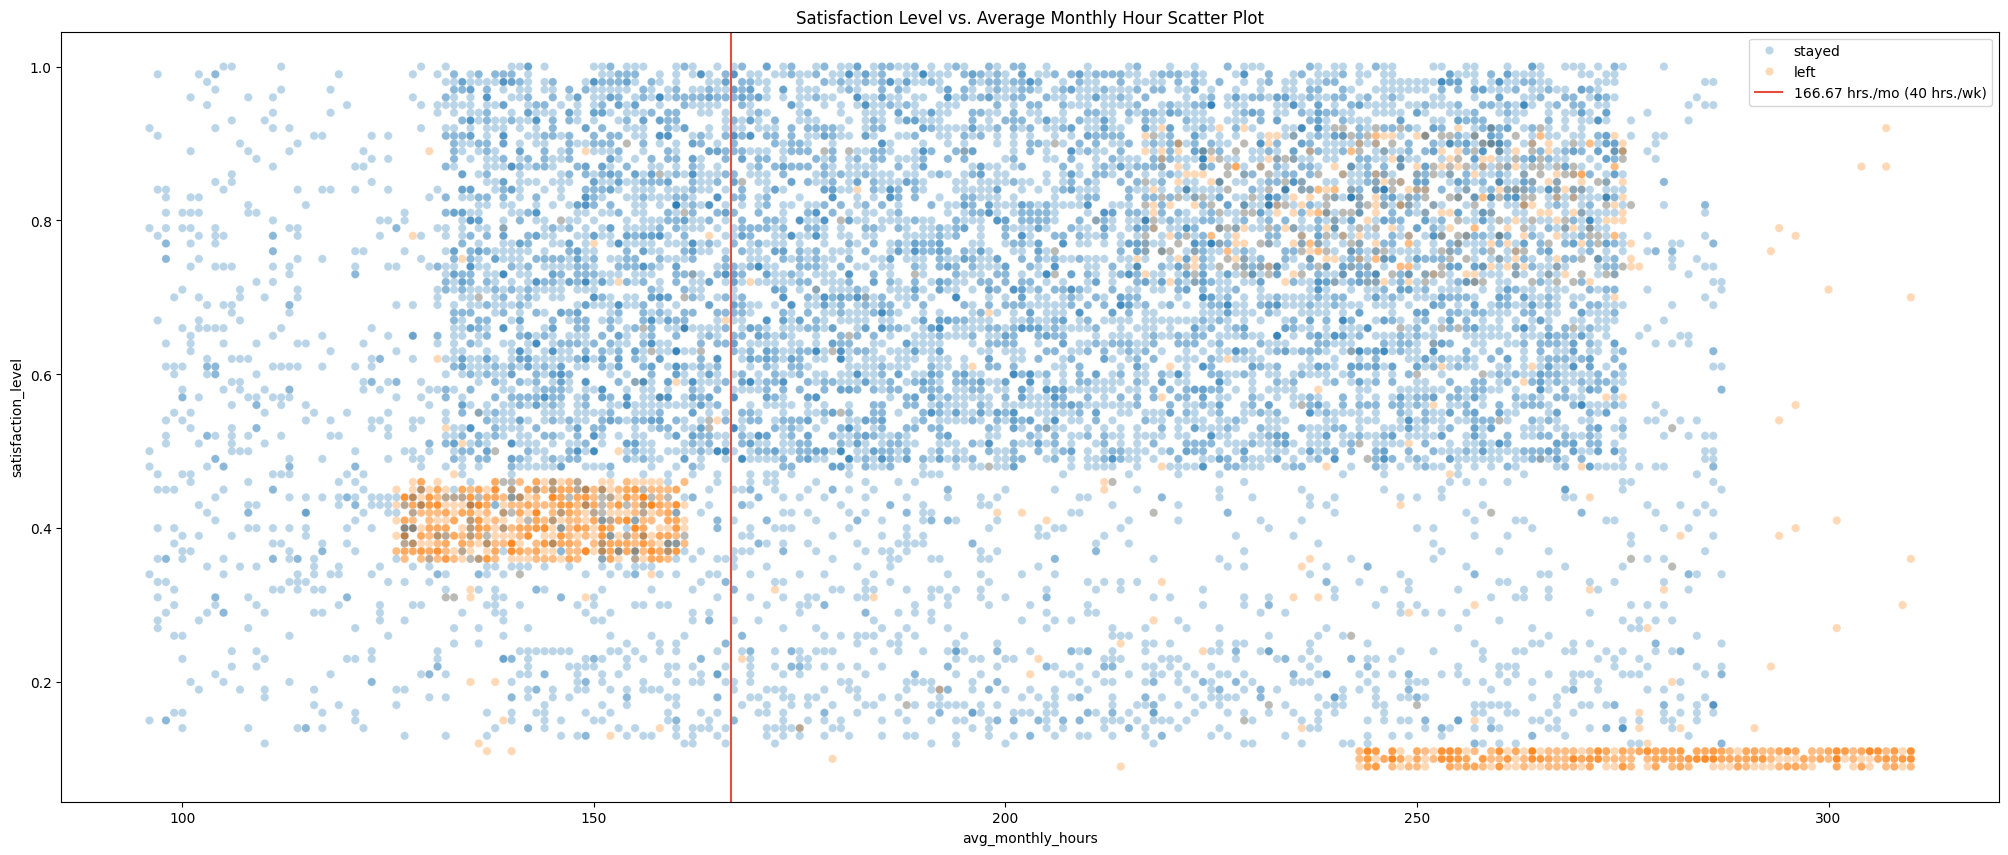

In [178]:
#Satisfaction Level vs. Average Monthly Hour Scatter Plot

plt.figure(figsize=(25, 10))
ax = sns.scatterplot(x='avg_monthly_hours', y='satisfaction_level', hue = 'left', alpha = .3, data=df1)
line = plt.axvline(x=166.67, color='#e74c3c', ls='-')
plt.title("Satisfaction Level vs. Average Monthly Hour Scatter Plot")

# Customize the labels in the scatterplot
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'stayed'
labels[1] = 'left'

# Add the 'line' object and its label to the lists
handles.append(line)
labels.append('166.67 hrs./mo (40 hrs./wk)')

# Update legend with above changes.
plt.legend(handles=handles, labels= labels)
plt.show()

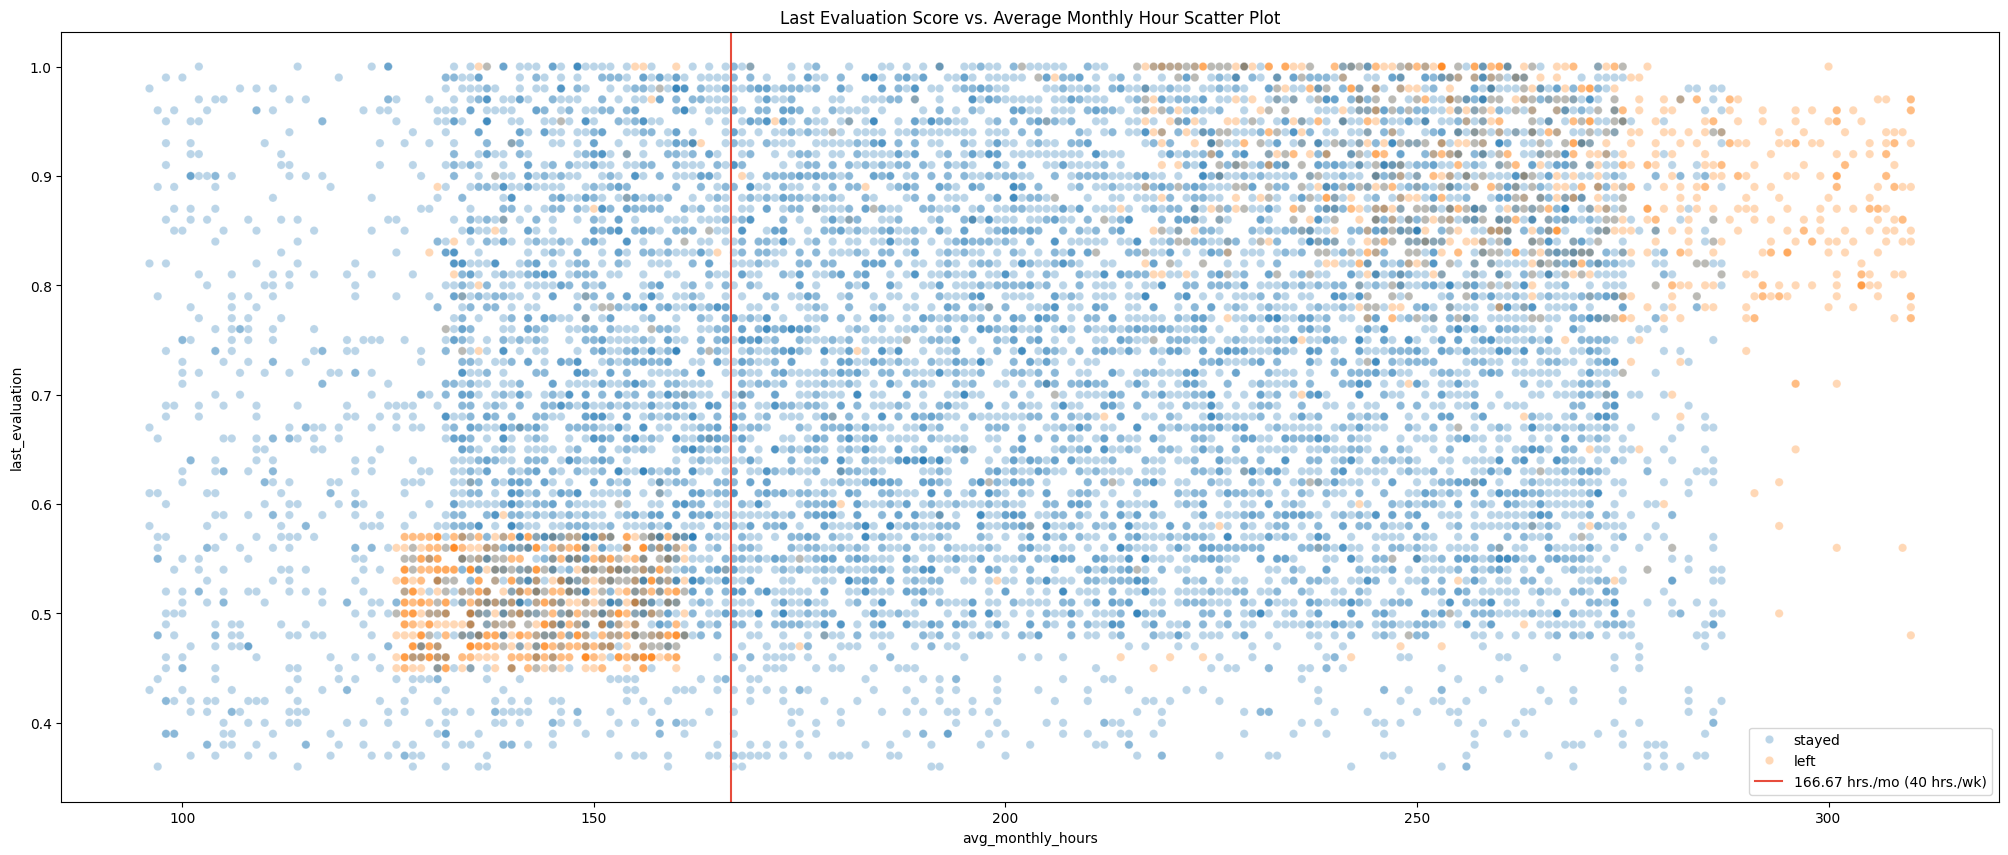

In [179]:
#Last Evaluation Score vs. Average Monthly Hour Scatter Plot

plt.figure(figsize=(25, 10))
ax = sns.scatterplot(x='avg_monthly_hours', y='last_evaluation', hue = 'left', alpha = .3, data=df1)
line = plt.axvline(x=166.67, color='#e74c3c', ls='-')
plt.title("Last Evaluation Score vs. Average Monthly Hour Scatter Plot")

# Customize the labels in the scatterplot
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'stayed'
labels[1] = 'left'

# Add the 'line' object and its label to the lists
handles.append(line)
labels.append('166.67 hrs./mo (40 hrs./wk)')

# Update legend with above changes.
plt.legend(handles=handles, labels= labels)
plt.show()



----------------------------------------------------------------------------------------------------------------------------------------
# <u> Generalized Insights:</u>
----------------------------------------------------------------------------------------------------------------------------------------
## <u>Turnover Data:</u>
- Since the main focus of our project is to predict and prevent turnover, we need to see the full impact of turnover by looking at how many employees left vs. how many stayed and see how it distributes across different groupings.

In [180]:
# Turnover Stats Intro
turnover_counts = df1['left'].value_counts().rename('Counts')
turnover_normalized = df1['left'].value_counts(normalize=True).rename('Percentage')
turnover_result = pd.concat([turnover_counts, turnover_normalized], axis=1).reset_index()
print('Turnover Counts: (1 = Left)\n', turnover_result, '\n', sep='')


Turnover Counts: (1 = Left)
   left  Counts  Percentage
0     0   10000    0.833959
1     1    1991    0.166041



Turnover Counts: (1 = Left)
   left  Counts  Percentage
0     0   10000    0.833959
1     1    1991    0.166041

Turnover Count by Tenure: 
    tenure  left  Counts  Percentage
0        2     0    2879   98.934708
1        2     1      31    1.065292
2        3     0    4316   83.159923
3        3     1     874   16.840077
4        4     0    1510   75.311721
5        4     1     495   24.688279
6        5     0     580   54.613936
7        5     1     482   45.386064
8        6     0     433   79.889299
9        6     1     109   20.110701
10       7     0      94  100.000000
11       8     0      81  100.000000
12      10     0     107  100.000000

Turnover Count Ranking by Tenure: 
    left  tenure  Counts  Percentage
0      0       3    4316   43.160000
1      0       2    2879   28.790000
2      0       4    1510   15.100000
3      0       5     580    5.800000
4      0       6     433    4.330000
5      0      10     107    1.070000
6      0       7      94    0.940000
7      0  

Text(0.5, 1.0, 'Tenure vs. Turnover (Fig. 3)')

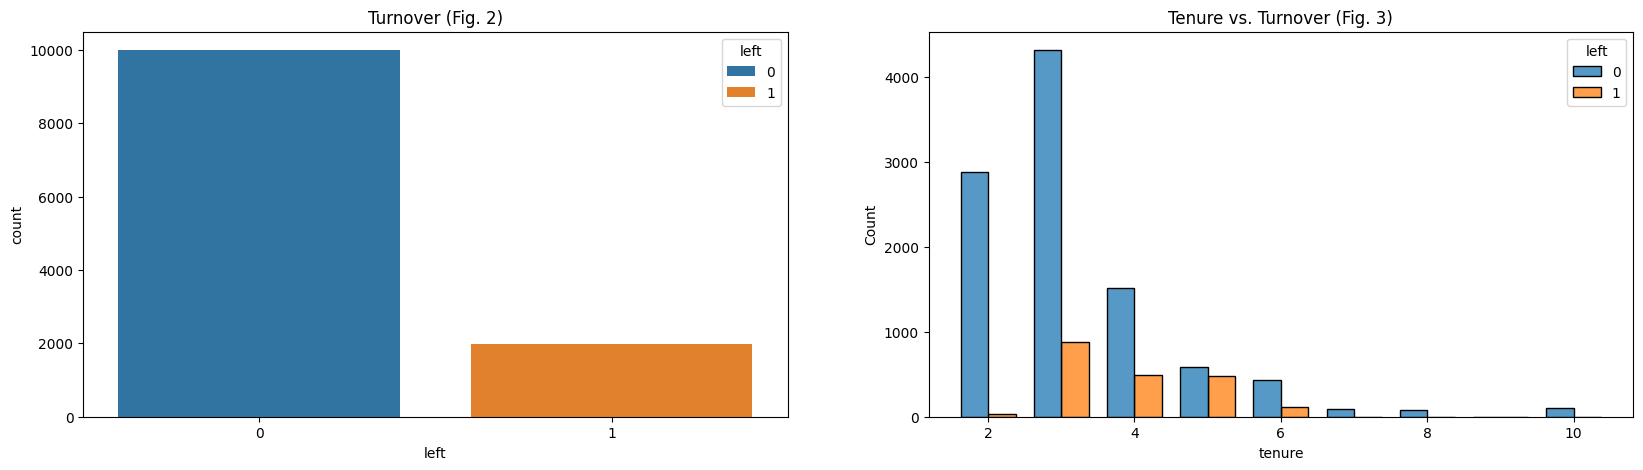

In [181]:
# Turnover Stats Full
turnover_counts = df1['left'].value_counts().rename('Counts')
turnover_normalized = df1['left'].value_counts(normalize=True).rename('Percentage')
turnover_result = pd.concat([turnover_counts, turnover_normalized], axis=1).reset_index()
print('Turnover Counts: (1 = Left)\n', turnover_result, '\n', sep='')
t_l_counts = df1.groupby('tenure')['left'].value_counts().rename('Counts')
t_l_normalized = df1.groupby('tenure')['left'].value_counts(normalize=True).rename('Percentage')*100 
t_l_result = pd.concat([t_l_counts, t_l_normalized], axis=1).reset_index()
print('Turnover Count by Tenure: \n', t_l_result, '\n', sep='')
l_t_counts = df1.groupby('left')['tenure'].value_counts().rename('Counts')
l_t_normalized = df1.groupby('left')['tenure'].value_counts(normalize=True).rename('Percentage')*100 
l_t_result = pd.concat([l_t_counts, l_t_normalized], axis=1).reset_index()
print('Turnover Count Ranking by Tenure: \n', l_t_result, '\n', sep='')

# Turnover EDA 1
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x = 'left', hue = 'left', data=df1, ax = axes[0])
axes[0].set_title('Turnover (Fig. 2)') 
sns.histplot(x='tenure', hue='left', data=df1, hue_order=[0, 1], discrete=1, multiple='dodge', shrink=.75, ax = axes[1])
axes[1].set_title('Tenure vs. Turnover (Fig. 3)') 

### <u>Turnover Insights:</u>
- When looking at 'Turnover Counts: (1 = Left)' table, I found that out of 11991 employees: 1991 (16.6%) left the company while 10000 (83.4%) stayed.
    - This is concerning as almost 1 out of 5 employees ends up leaving the company as seen in (Fig.2).
    - As stated in the introduction, Salifort Motors invests a lot of time and resources into upskilling and training employees.
    - Losing these employees not only incurs significant loss due to lost potential, but more resources need to be invested into recruiting and training new employees.
    - This data is helpful, but it doesn't tell us much about the problem.
    - Looking at distribution of turnover may help.
- When we look at the distribution of turnover among tenure (Fig. 3), the grand majority of employees who left were 3-6 year tenure.
    - This observation is important as it gives us a potential focus area to drive our EDA.
    - Proportionally speaking, the highest turnover rate was among 5 year tenure employees as seen in the 'Turnover Count by Tenure:' table.
        - This is particularly concerning as we are losing valuable and experienced employees.
- We may not be able to fully prevent turnover, but the initial analysis suggests there are plenty of areas for improvement.
-------------------------------------------------------------------------------------------------------------------------------------------

## <u>Correlation Data:</u>

- Checking for correlations between different variables in the data can help with EDA by finding potential influencer variables.
    - It's important to note that correlation doesn't necessarily imply causation.
        - This consideration is especially important in model development as we don't want to put irrelevant (but correlated) variables into a dataset, as this would create noise in the model and make it less accurate.   


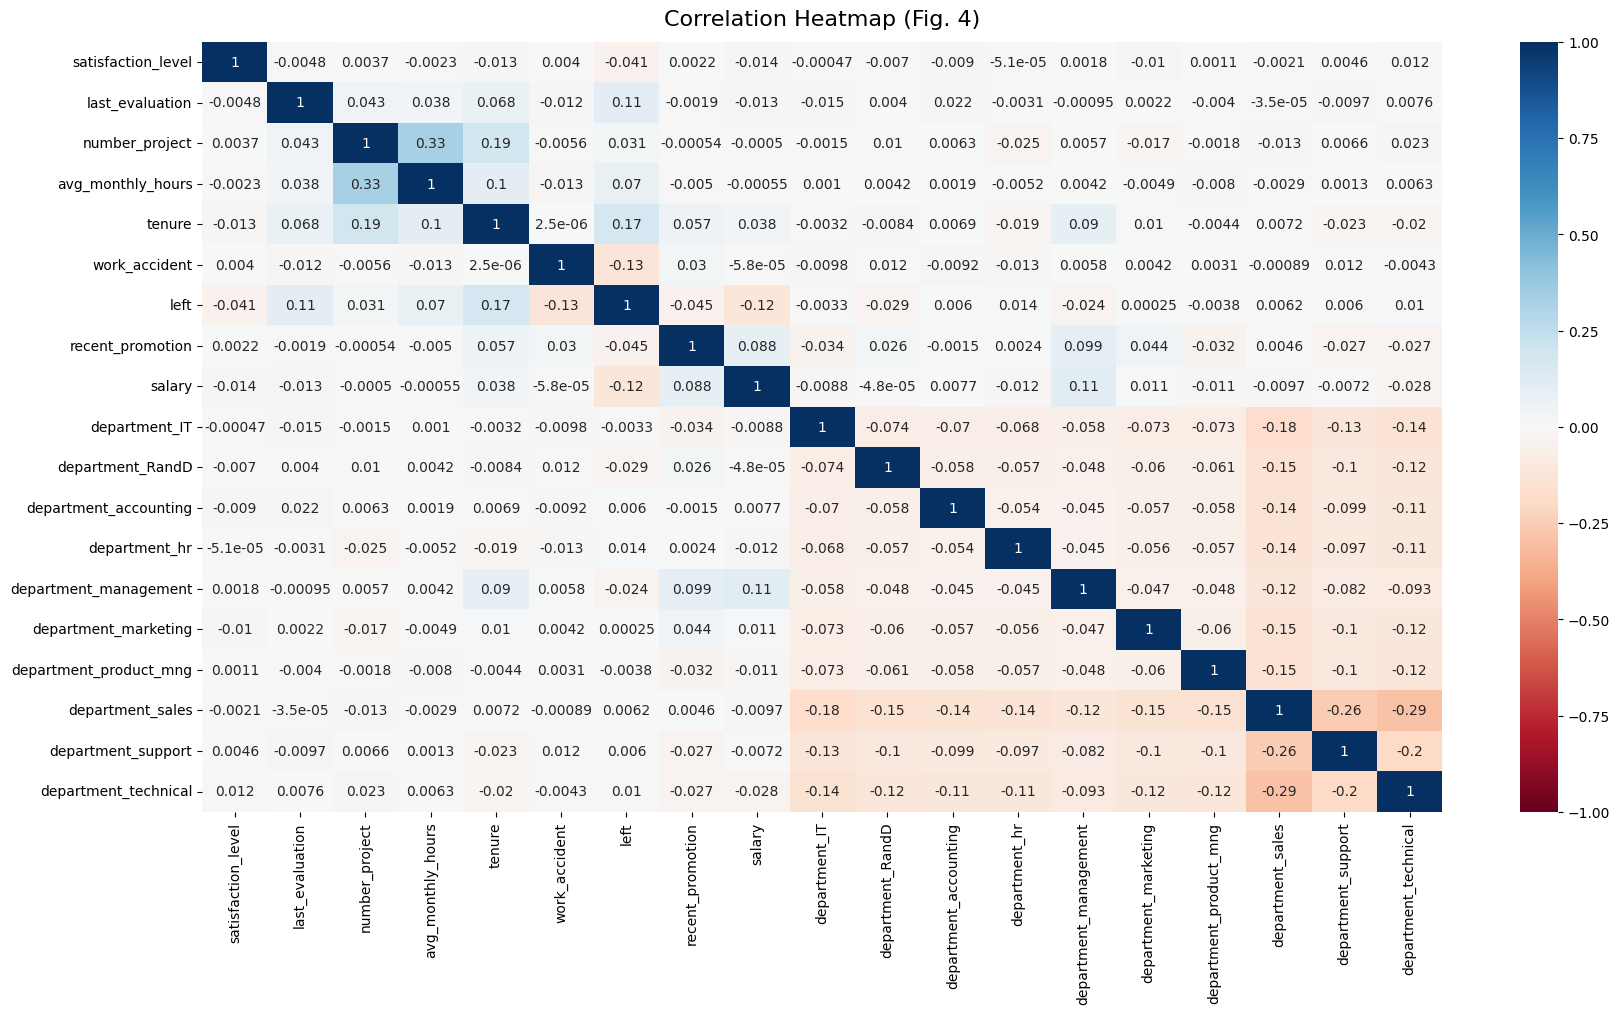

In [182]:
#To See Correlation Between Variables

#Need to encode Salary and Department 
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
df_enc = df1.copy()
df_enc['salary'] = df_enc['salary'].map(salary_codes)
df_enc = pd.get_dummies(df_enc, drop_first=False).astype(int)
df_enc.head(5)

# Correlation Heat Map - Full
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_enc.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu", as_cmap=True))
heatmap.set_title('Correlation Heatmap (Fig. 4)', fontdict={'fontsize':16}, pad=12);

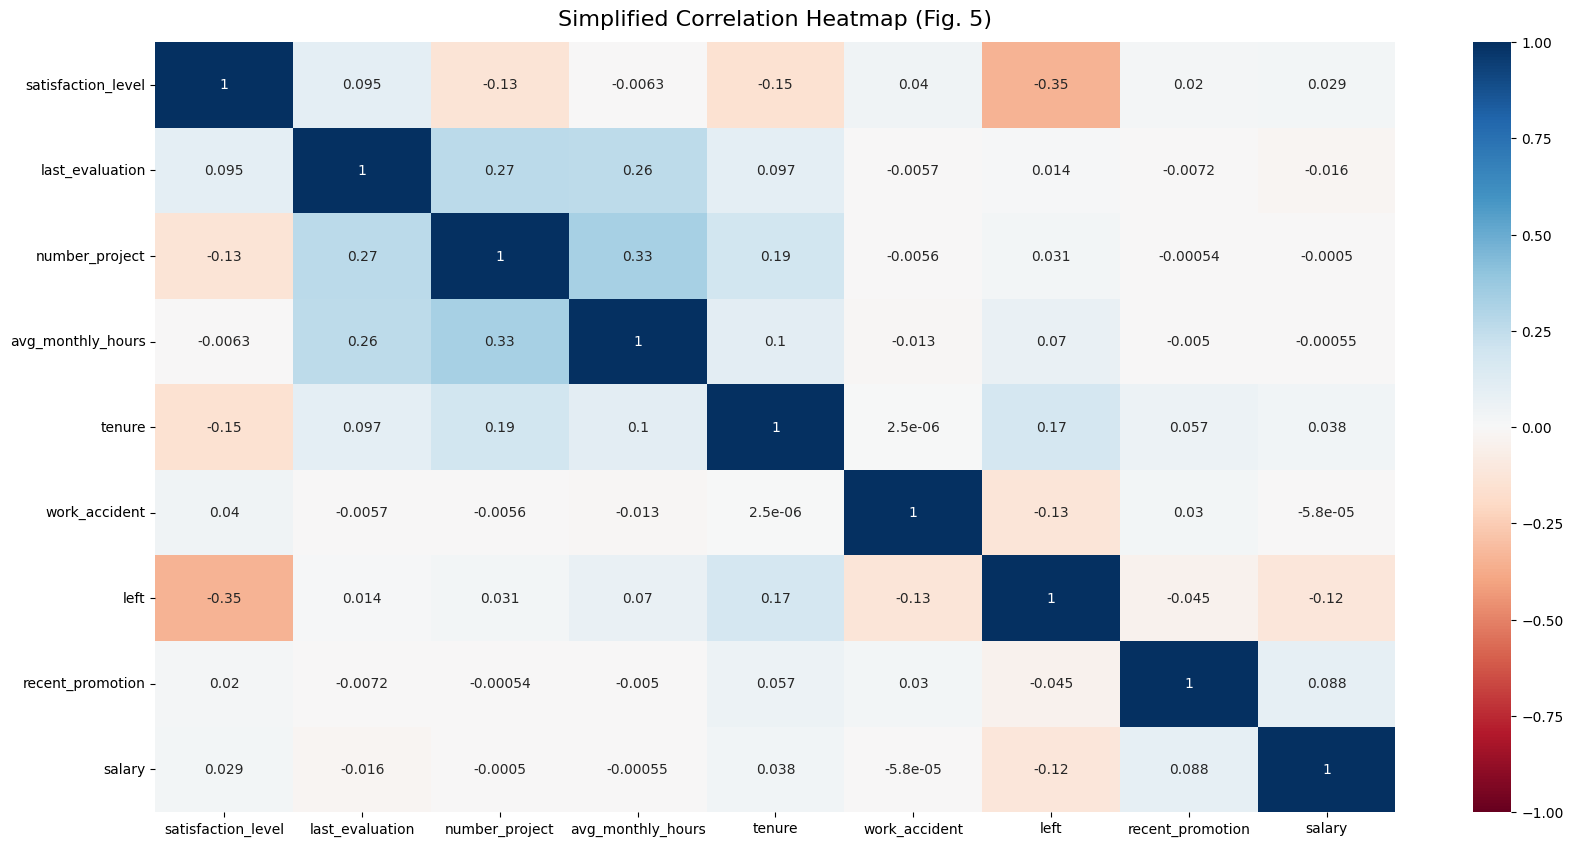

In [183]:
#Simplified Correlation Between Variables

#Need to encode salary and drop department 
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
df_enc2 = df1.copy()
df_enc2['salary'] = df_enc2['salary'].map(salary_codes)
df_enc2 = df_enc2.drop(columns = 'department')

# Simplified Correlation Heat Map
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_enc2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu", as_cmap=True))
heatmap.set_title('Simplified Correlation Heatmap (Fig. 5)', fontdict={'fontsize':16}, pad=12);


### <u>Correlation Heat Map Insights:</u>
- The 'Correlation Heatmap (Fig. 4)' shows the full dimensionality of our dataset once it's fully encoded for model development and correlations between different variables.
    - This heatmap is very hard to read since there are 10 additional encoded department variables.
        - These department variables show very weak correlations with the other variables.
        - The slight negative correlation between 'sales and support departments' and 'sales and technical departments' is a likely example of 'correlation doesn't imply causation,' as there are no clear logical reasons to expect such a relationship.
    - Removing the encoded department variable will help see the correlations more clearly.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
- The Simplified Correlation Heatmap (Fig. 5) shows our correlations much better.
    - Overall, there are no strong correlations between any of the variables.
    - The only moderately correlated variables noticed:
        - <u>Satisfaction Level vs. Left</u> - Moderate negative correlation (-0.35).
            - This makes sense since we expect employees to not leave if their satisfaction levels are high and vice versa.
            - However, this is not as low as expected.
                - We should expect a value closer to (-1.0) as satisfaction level decreases.
        - <u>Average Monthly Hours vs. Number of Projects</u> - Moderate Positive Correlation (0.33)
            - This also makes sense because if an employee has more projects they should generally be working more hours and vice versa.
        - <u>Average Monthly Hours vs. Last Evaluation and Number of Projects vs. Last Evaluation</u> - Weak Positive Correlation (0.26 and 0.27 respectively).
            - This correlation suggests that employees who work longer hours and have more projects get higher evaluation scores.
                - This likely suggests (although weakly) that the corporate environment has a work culture issue where employees are working longer hours and working on more projects.
                    - These types of conditions are prime factors for burnout.
---------------------------------------------------------------------------------------------------------------------------------------------
- Overall, correlation data isn't enough alone to make any significant conclusions about the data as it can only capture linearity of between different variables.
- However, using the correlation data to drive initial EDA focus areas is a sound strategy as it allows us to focus on areas likely to have an impact on our target variable, turnover.
--------------------------------------------------------------------------------------------------------------------------------------------


## <u>Department Data:</u>
- Before focusing on more strongly correlated variables, I wanted to see how department interacts with turnover.

Turnover by Department: 
     department  left  Counts  Percentage
0            IT     0     818   83.811475
1            IT     1     158   16.188525
2         RandD     0     609   87.752161
3         RandD     1      85   12.247839
4    accounting     0     512   82.447665
5    accounting     1     109   17.552335
6            hr     0     488   81.198003
7            hr     1     113   18.801997
8    management     0     384   88.073394
9    management     1      52   11.926606
10    marketing     0     561   83.358098
11    marketing     1     112   16.641902
12  product_mng     0     576   83.965015
13  product_mng     1     110   16.034985
14        sales     0    2689   83.019450
15        sales     1     550   16.980550
16      support     0    1509   82.866557
17      support     1     312   17.133443
18    technical     0    1854   82.620321
19    technical     1     390   17.379679



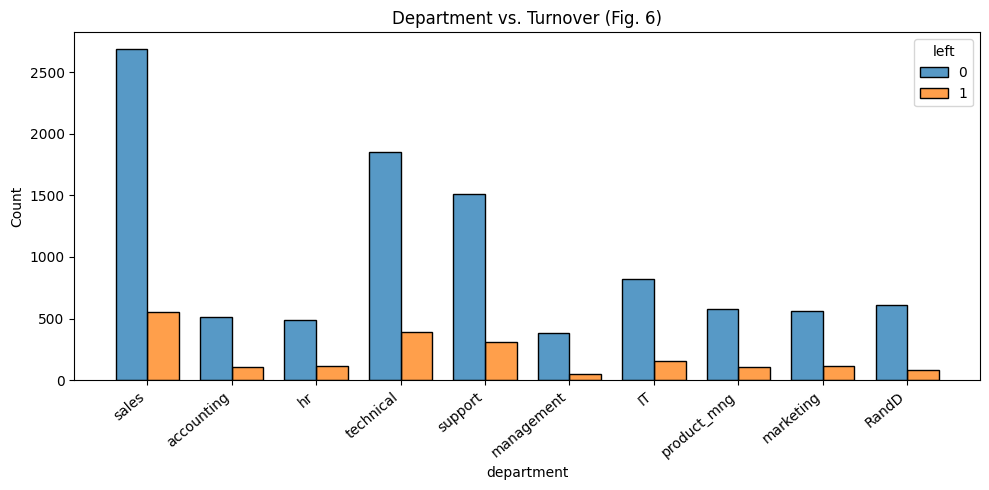

In [184]:
# Department Insights

# Department Aggregated Counts
d_l_counts = df1.groupby('department')['left'].value_counts().rename('Counts')
d_l_normalized = df1.groupby('department')['left'].value_counts(normalize=True).rename('Percentage')*100 
d_l_result = pd.concat([d_l_counts, d_l_normalized], axis=1).reset_index()
print('Turnover by Department: \n', d_l_result, '\n', sep='')

# Turnover by Department Histogram
plt.figure(figsize=(10, 5))
sns.histplot(x='department', hue='left', data=df1, hue_order=[0, 1], discrete=True, multiple='dodge', shrink=.75)
plt.xticks(np.arange(len(df1['department'].unique()))) # Set tick locations for department titles
plt.setp(plt.gca().get_xticklabels(), rotation=40, ha='right') # Rotate x-labels
plt.title('Department vs. Turnover (Fig. 6)')
plt.tight_layout() # Adjust layout to prevent labels from being cut off

## <u>Department Insights</u>:
- The turnover ratio from the 'Turnover by Department' table showed that each department was approximately between 81% (stayed) to 19% (left) and 88% (stayed) to 12% (left).
    - If this was a much larger company with many more employees (100,000+), those ratios may be significant.
        - In our case, however, it's likely statistically insignificant.
    - This suggests that turnover is a company wide issue and not localized to select few departments.
- The Department vs. Turnover Histogram (Fig. 6) supports the previous hypothesis.
    - Certain departments had numerically larger amount of employees turnover, but they also had a proportionally larger group of employees.
- Overall the data suggests that department isn't a strong predictor of turnover and that turnover is a company wide issue.
    - This also supports the observations noticed in the 'Correlation Heat Map Insights:' section from earlier.
----------------------------------------------------------------------------------------------------------------------------------------

## <u>Number of Projects Data:</u>
- One of the stronger correlations that was noticed was between 'Number of Projects' and 'Average Monthly Hours/Last Evaluation'.
- Since "Number of Projects' seems to be a primary influencer, I decided to explore 'Number of Projects' in further detail.

Turnover Count by Project: 
    number_project  left  Counts  Percentage
0                2     1     857   54.171934
1                2     0     725   45.828066
2                3     0    3482   98.920455
3                3     1      38    1.079545
4                4     0    3448   93.568521
5                4     1     237    6.431479
6                5     0    1890   84.639498
7                5     1     343   15.360502
8                6     0     455   55.084746
9                6     1     371   44.915254
10               7     1     145  100.000000

Turnover Count Ranking by Project: 
    left  number_project  Counts  Percentage
0      0               3    3482   34.820000
1      0               4    3448   34.480000
2      0               5    1890   18.900000
3      0               2     725    7.250000
4      0               6     455    4.550000
5      1               2     857   43.043697
6      1               6     371   18.633852
7      1               5     343   

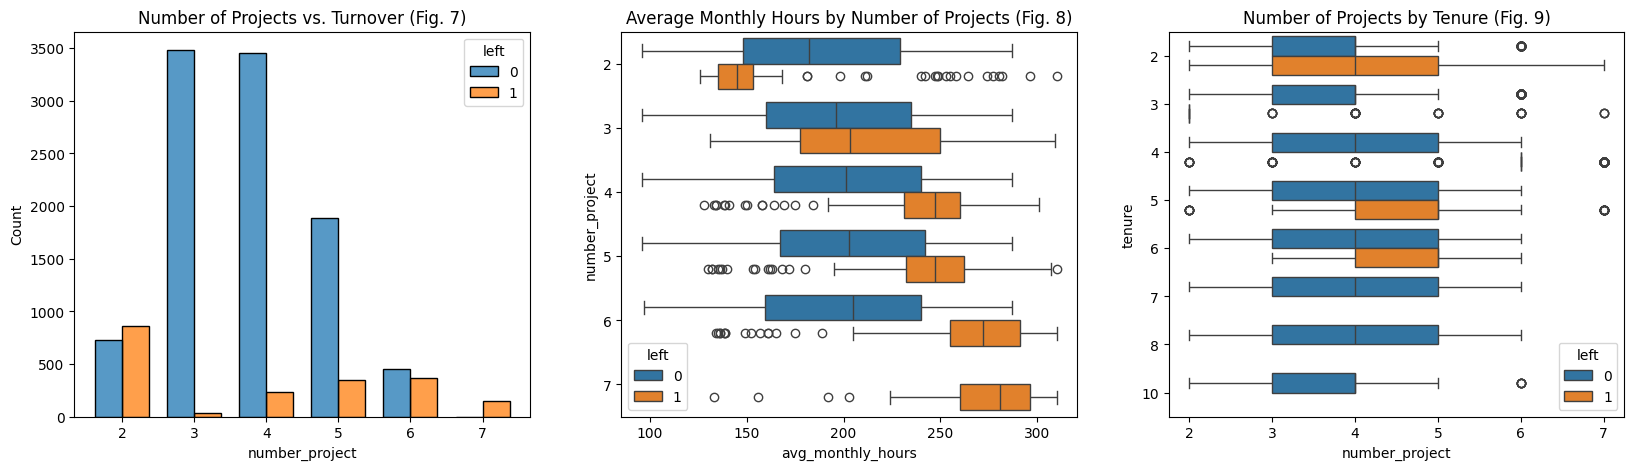

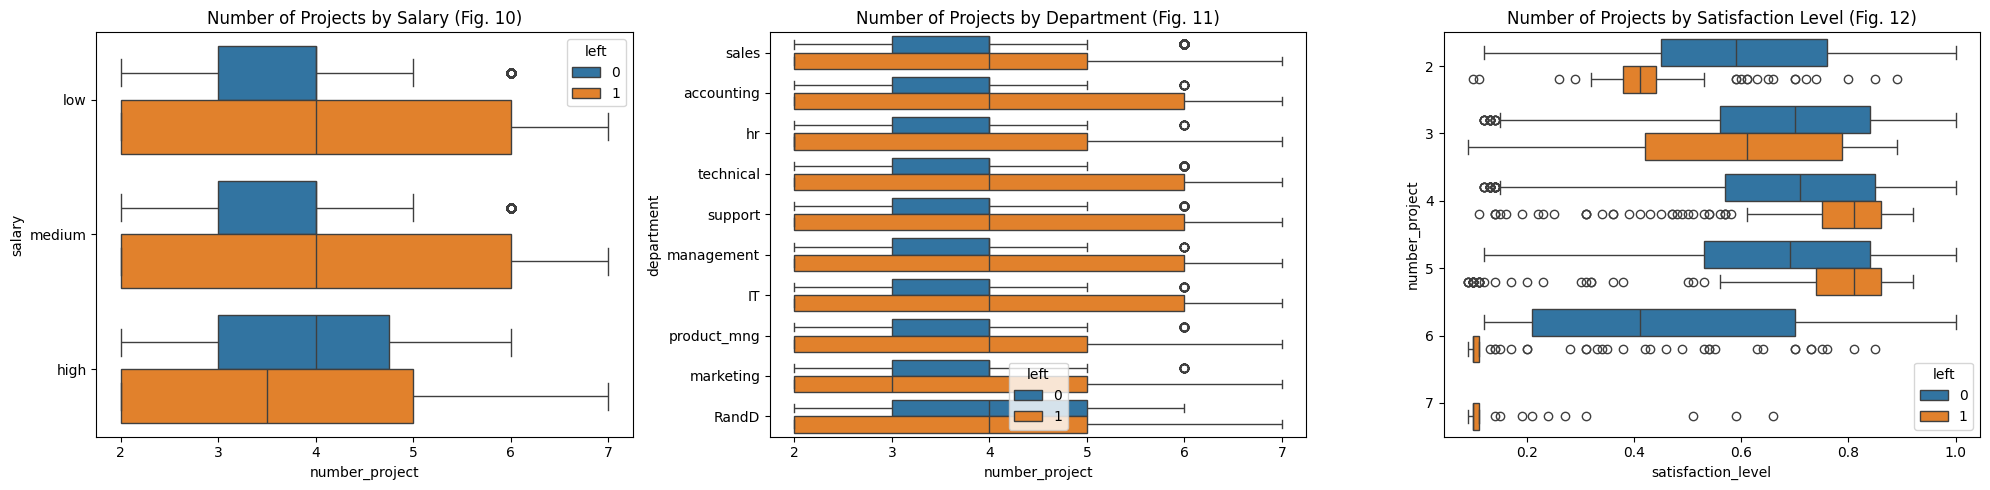

In [185]:
# Number of Projects Insights
np_l_counts = df1.groupby('number_project')['left'].value_counts().rename('Counts')
np_l_normalized = df1.groupby('number_project')['left'].value_counts(normalize=True).rename('Percentage')*100 
np_l_result = pd.concat([np_l_counts, np_l_normalized], axis=1).reset_index()
print('Turnover Count by Project: \n', np_l_result, '\n', sep='')
l_np_counts = df1.groupby('left')['number_project'].value_counts().rename('Counts')
l_np_normalized = df1.groupby('left')['number_project'].value_counts(normalize=True).rename('Percentage')*100 
l_np_result = pd.concat([l_np_counts, l_np_normalized], axis=1).reset_index()
print('Turnover Count Ranking by Project: \n', l_np_result, '\n', sep='') 

# Number of Projects EDA Visuals 1
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(x='number_project', hue='left', hue_order=[0, 1], data=df1, discrete=1, multiple='dodge', shrink=.75, ax=axes[0])
axes[0].set_title('Number of Projects vs. Turnover (Fig. 7)')
sns.boxplot(x = 'avg_monthly_hours', y = 'number_project', hue='left', data=df1, orient="h", ax=axes[1])
axes[1].set_title('Average Monthly Hours by Number of Projects (Fig. 8)')
sns.boxplot(x = 'number_project', y = 'tenure', hue='left', data=df1, orient="h", ax=axes[2])
axes[2].set_title('Number of Projects by Tenure (Fig. 9)')
plt.show()

# Number of Projects EDA Visuals 2 
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(x="satisfaction_level", y = 'number_project', hue = 'left', data=df1, orient = 'h', ax = axes[2])
axes[2].set_title('Number of Projects by Satisfaction Level (Fig. 12)')
sns.boxplot(x="number_project", y = 'salary', hue = 'left', data=df1, ax = axes[0])
axes[0].set_title('Number of Projects by Salary (Fig. 10)')
sns.boxplot(x='number_project', y='department', hue='left', data=df1, orient="h", ax=axes[1])
axes[1].set_title('Number of Projects by Department (Fig. 11)') 
plt.tight_layout()

### <u>Number of Projects Insights:</u>
- Number of Projects was found to have a significant impact on turnover as seen in the 'Turnover Count by Project:' table and 'Number of Projects vs. Turnover (Fig. 7)' histogram.
    - It was found that increasing the number of projects beyond the sweet spot of 3 gradually increases the proportional rate of turnover until we have a 100% turnover at 7 projects.
    - Below 3 projects, in this case the lowest of 2, resulted in the highest individual per project turnover (857 left).
        - It's still less than the combined sum of turnovered employees who worked on more than 3 projects (1,096 left).
        - This is interesting because logical assumptions would assume a linear relationship with turnover vs. more projects.
            -  In other words, more projects = higher work, which would lead to higher turnover; while less projects = less work, which would lead to less employees leaving."

-  As we can see, more is going on here that we can't see yet.
---------------------------------------------------------------------------------------------------------------------------------------------
- When we graph 'Average Monthly Hours by Number of Projects' (Fig. 8) and compare with the previous (Fig. 7) histogram, we find:
    - Most employees who left that had more than 4 projects were working approx. 240 or more average monthly hours.
        - This suggests that these employees are most likely overworked and suffering burnout.
    - Most employees who left that had only 2 projects worked approx. 130-155 average monthly hours.
        - This suggests that these employees are underutilized.
            - This could be because these employees are lacking adequate training/support and, in turn, are likely struggling to handle their current workload.
                - This has an effect where employees will resign due to either frustration or by indirect pressure from management, who may be reducing their hours to encourage them to quit since they aren't meeting their quota.
                    - This is very problematic because when we lose those employees, their workload gets transferred to the remaining employees leading to more burnout and, in turn, turnover.
- Let's see how these insights transfer over to tenure.
---------------------------------------------------------------------------------------------------------------------------------------------
- Number of Projects by Tenure Box Plot (Fig. 9):
    - Most employees who left at 2 years tenure worked between 3 and 5 projects vs. the 3-4 projects for most employees that stayed.
    - Almost all employees who left at 3 years tenure worked only 2 projects vs. the 3-4 projects for most employees that stayed.  
    - Almost all employees who left at 4 years tenure worked 6 projects vs. the 3-5 projects for most employees that stayed.
    - Most employees who left at 5 and 6 years tenure worked 4 - 5 projects vs. most employees that stayed worked 3 - 5 projects.
---------------------------------------------------------------------------------------------------------------------------------------------
- Using our previous insights, we can make two observations:
    1. There likely is a management and training pipeline issue that starts at the 3 year tenure employees and then bleeds into the 4+ year tenure group.
        - It seems likely that our less tenured (3 year) turnovered employees are likely not receiving adequate training and support to handle their project loads in an adequate and efficient manner.
            - As seen in (Fig. 9), almost all of our 3 year tenured employees who left tend to have only two projects vs. the 3-4 projects for employees that stayed in that group.
                - This supports the theory that this group of employees who left are likely under-trained and/or under-supported
                - Many of these employees may also be reducing hours if they already decided to quit or are being prepared by management to be fired.
                    - Additional research about termination practices and exit interview data may be needed to explore this theory further.
        - Regardless, when the 3 year tenured employees leave, the more tenured (4+ years) employees end up receiving a significantly higher workload (4+ projects) as shown in Fig. 9 which causes them to likely burnout and eventually leave.
    2. There's a suggested sweet spot in the number of projects that keep employees retained.
        - From Fig. 9, we can see for across all tenure ranges that 3-4 projects or 3-5 projects is the sweet spot for retaining employees.
        - Using percentage data from our 'Turnover Count by Project:' table, we can see the best ratios for employees that stayed to left were 98.2% to 1.8% for 3 projects and 93.5% to 6.5% for 4 projects.
        - When we look at salary groupings by number of projects in 'Number of Projects by Salary Box Plot' (Fig. 10):
            - Low and Medium Salaried Employees:
                - Most Employees that stayed worked between 3-4 projects.
                - Most Employees that left worked between 2-6 projects.
            - High Salaried Employees:
                - Most Employees that stayed worked approx. between 3-4.75 projects.
                - Most Employees that left worked between 2-6 projects.
        - Number of Projects by department (Fig. 11):
            - Across all departments, most employees that stayed worked between 3-4 projects.
                - The exception to this observation is RandD (Research and Development) with 3-5 projects.
                    - This makes sense since they are more likely to experiment and develop new ideas and products.
            - Across all departments, most employees that left worked between 2-5 or 2-6 projects depending on the specific department. 
        - Overall, 3-4 projects seems to be the ideal number of projects to retain employees.
---------------------------------------------------------------------------------------------------------------------------------------------
- Finally, we'll look at 'Satisfaction Levels by Number of Projects (Fig. 12)' box plot to see if employee satisfaction correlates with 'Number of Projects'.
    - 2 projects: 
        - Most employees who left had a satisfaction level approx. between .41-.43.
    - 3 projects: 
        - Most employees that left had a satisfaction score between .5 and .8.
    - 4 - 5 projects: 
        - Most employees who left had high satisfaction scores ~.75-.85.
            - This is strange because these employees had higher satisfaction levels than those that stayed (approx. between .55 - .84.)
    - 6 - 7 projects:
        - Almost all employees who left had a near zero satisfaction score.
    - These scores are strange for many reasons:
        - The satisfaction level scores for employees who left that worked 2, 3, 6, and 7 projects make sense or are at least explainable.
            - If they're working too few projects (2 in this case), they may be struggling,considering resigning, or being prepared to be offboarded resulting in mediocre to low satisfaction scores.
            - If an employee is working 6 to 7 projects, they likely are overworked and stressed resulting in very low satisfaction scores.
            - The distribution of satisfaction level scores for turnovered employees that worked 3 projects is a bit higher than expected.
                -  The sample size for the left group is very small (38 employees) and is likely skewing the data/visualization.
                -  We'll disregard this group for now.
        - The satisfaction level scores for turnovered employees that worked 4 and 5 projects are abnormally high.
            - If employees were likely to leave, we would expect them to have lower satisfaction level scores at a linearly increasing rate.
            - In our case, the scores were significantly higher on average than employees that stayed.
                - This is suggesting some form of collection bias/manipulation may have occurred.
                - We'll explore this further in the 'Satisfaction Level Insights:' section.
---------------------------------------------------------------------------------------------------------------------------------------------
### <u>Number of Projects Summary:</u>
- After analyzing 'Number of Projects' and comparing it with other variables, a story starts to appear within our data as seen above.  
    - The ideal number of projects to retain employees was found to be 3-4 projects.
    - We have a management/training pipeline issue:
        - Many of our 3 year tenure employees are likely undertrained/undersupported causing them to leave. 
        - Many of our 4+ tenured employees are taking in an increasingly large workload causing burnout and eventual departure from the company.
        - These theories are also supported when we look at our 'Tenure vs. Turnover' (Fig. 3) graph from our Tenure Insights section.
            - If we look at our 2 year tenure employees, we notice that turnover rates are incredibly low suggesting they're receiving adequate training and support.
    - Satisfaction level surveys are likely suffering from some sort of collection bias/manipulation.
        - Satisfaction level scores were unusually high for turnovered employees that worked between 4 and 5 projects.
---------------------------------------------------------------------------------------------------------------------------------------------

## <u>Average Monthly Hours Data:</u>
- Based on prior correlation heatmaps and Fig. 8 in our 'Number of Projects EDA section', 'Average Monthly Hours' likely has some predictive power in turnover.
- Let's explore it further to see what we can find.

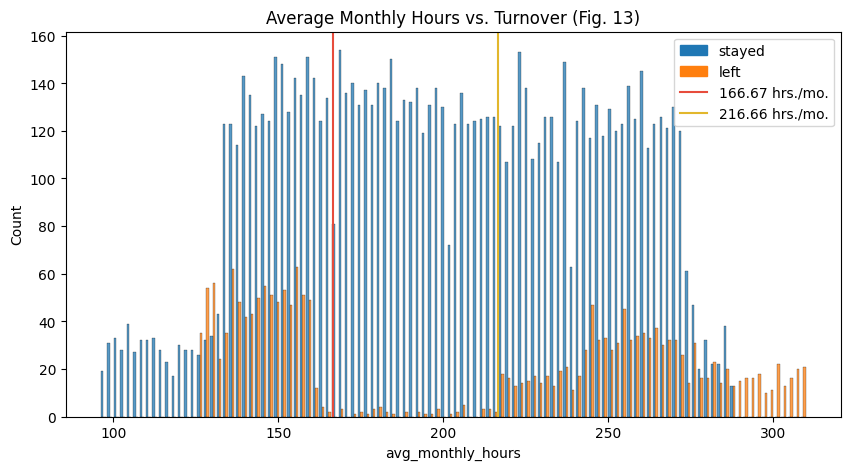

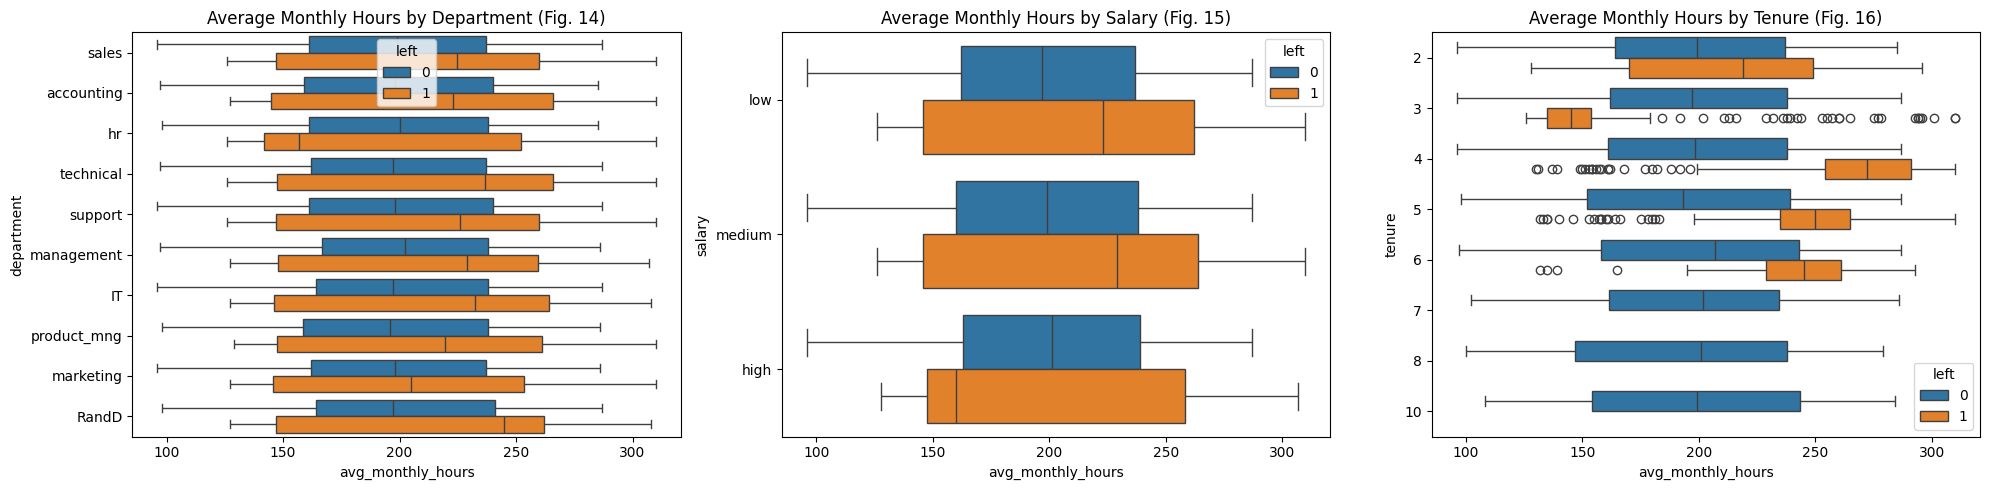

In [186]:
# Average Monthly Hours EDA 1 
plt.figure(figsize=(10, 5))
ax = sns.histplot(x='avg_monthly_hours', hue='left', data=df1, hue_order=[0, 1],
                  bins=round(math.sqrt(len(df1))), multiple='dodge', shrink=.75,
                  legend=False) 
plt.title('Average Monthly Hours vs. Turnover (Fig. 13)')
line_1 = plt.axvline(x=166.67, color="#e74c3c", ls='-', label='166.67 hrs./mo.')
line_2 = plt.axvline(x=216.66, color="#e2b72c", ls='-', label='216.66 hrs./mo.')

# Need to use patches to properly create labels in seaborn with histplot.
import matplotlib.patches as mpatches
palette = sns.color_palette() # Gets the default seaborn colors
stayed_patch = mpatches.Patch(color=palette[0], label='stayed')
left_patch = mpatches.Patch(color=palette[1], label='left')
all_handles = [stayed_patch, left_patch, line_1, line_2]
plt.legend(handles=all_handles)
plt.show()


# Average Monthly Hours EDA 2 
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(x='avg_monthly_hours', y='tenure', hue='left', data=df1, orient="h", ax=axes[2])
axes[2].set_title('Average Monthly Hours by Tenure (Fig. 16)') 
sns.boxplot(x='avg_monthly_hours', y='department', hue='left', data=df1, orient="h", ax=axes[0])
axes[0].set_title('Average Monthly Hours by Department (Fig. 14)')
sns.boxplot(x="avg_monthly_hours", y = 'salary', hue = 'left', data=df1, ax = axes[1])
axes[1].set_title('Average Monthly Hours by Salary (Fig. 15)')
plt.tight_layout()

### <u>Average Monthly Hour Insights:</u>
- When reviewing 'Average Monthly Hours vs. Turnover (Fig. 13)':
    - Turnover is near zero below 125 hours.
    - There's a slight rightward skewed distribution between 125 and 165 of turnover.
        - This supports previous underutilized, undersupported, and undertrained theory.
    - Turnover increases exponentially in ratio to employees that stayed as average monthly hours increases beyond 216.66.
    - Most importantly though, there's a sweet spot between 166.67 and 216.66 (as shown by the red axis lines) where turnover ratio is the lowest in terms of total employees.
        - This fits with most modern research about suggested working hours and limiting employee burnout.
---------------------------------------------------------------------------------------------------------------------------------------------
- The previously mentioned sweet spot is supported further when looking at 'Average Monthly Hours by Department (Fig. 14)' and 'Average Monthly Hours by Salary (Fig. 15)'.
    - In (Fig 14), average monthly hours are similarly distributed across departments for both stayed and turnovered employees.
    - (Fig 15) shows similar distributions across all salary ranges.
        - Both of these observations show that ideal hourly ranges can be implemented across all departments and salary ranges.
---------------------------------------------------------------------------------------------------------------------------------------------
- Looking further into the 'Average Monthly Hours by Tenure Box Plot (Fig. 16)':
    - At 3 year tenure, most turnovered employees approx. worked between 140-155 average monthly hours.
        - This data supports the underutilized theory mentioned in the Number of Projects Insights section.
    - At 4, 5, and 6 year tenure, most employees turnovered at above 260, 235, and 230 average monthly hours, respectively.
        - This supports the theory that our more tenured staff are overworking and suffering the effects of burnout.
    - Most importantly though, most employees that stayed across all tenure levels worked between approx. 150 and 230 average monthly hours.
        - Interestingly enough (Fig. 16) showed a similar distribution for employees who stayed across all project levels where they also worked between approx. 150 and 230 average monthly hours.
            - This suggests that not all projects are the same in scope, depth, and time to complete.
                - This suggests that these employees may be receiving adequate support and/or training to complete their tasks.
                    - We may need to look at these employees more in detail to see what factors allow them to succeed.
---------------------------------------------------------------------------------------------------------------------------------------------
### <u>Average Monthly Hours Summary:</u>
- Overall, hourly data revealed many important insights:
    - The sweet spot to retaining employees seems to be between 167.67 and 216.67 average monthly hours.  (40 hrs./wk. and 52 hrs./wk. respectively)
    - Turnover distributions for average monthly hours were similar across salary ranges and departments.
    - For employees that stayed, average monthly hour distributions were similar across projects suggesting that these employees had adequate training and support to complete their tasks.
- Suggestions moving forward would be to try keeping employees within the hourly sweet spot to prevent burnout and make sure employees are properly utilized.
    - This might mean, as earlier mentioned, making sure less tenured employees are adequately trained and supported and more tenured employees don't have "too high of a workload".
        - The key note here is "too high of a workload" and not "too many projects".
        - This will be discussed in more detail in the Final EDA Insights section.
---------------------------------------------------------------------------------------------------------------------------------------------
<br>

## <u>Satisfaction Level Data</u>:
- Based on previous Number of Projects EDA, something strange seems to be going on with Satisfaction Level scoring.
- It's not very consistent based on logic and suggests some kind of data manipulation or bias is going in the background.

Average and Median Satisfaction Level by Turnover: 
           mean  median
left                   
0     66.736500    69.0
1     44.027122    41.0


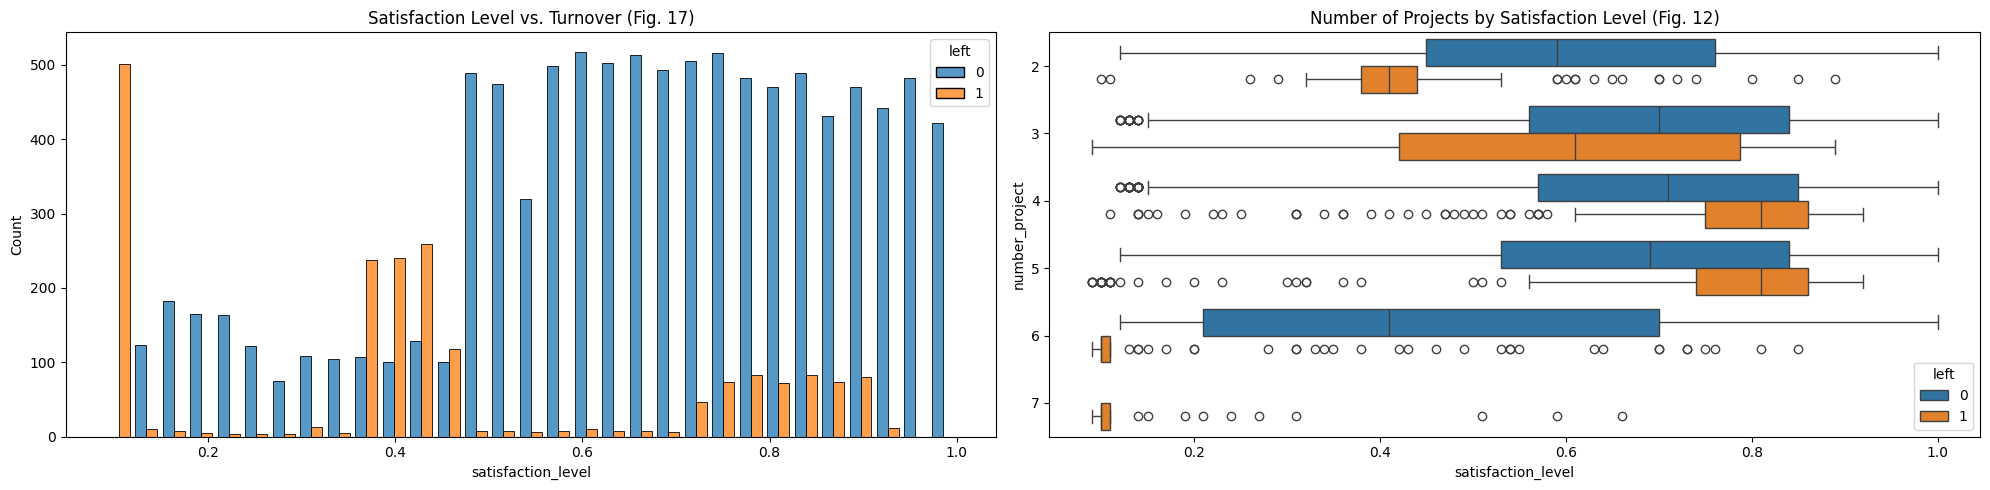

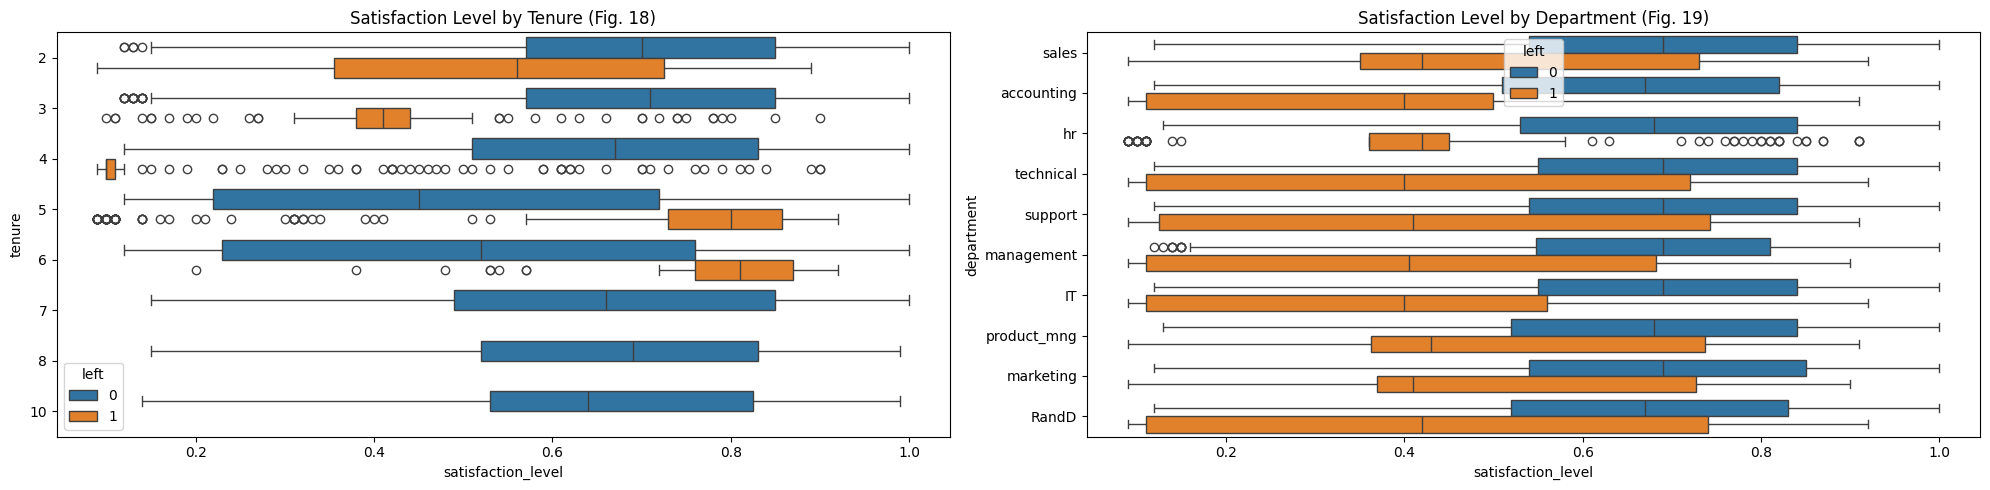

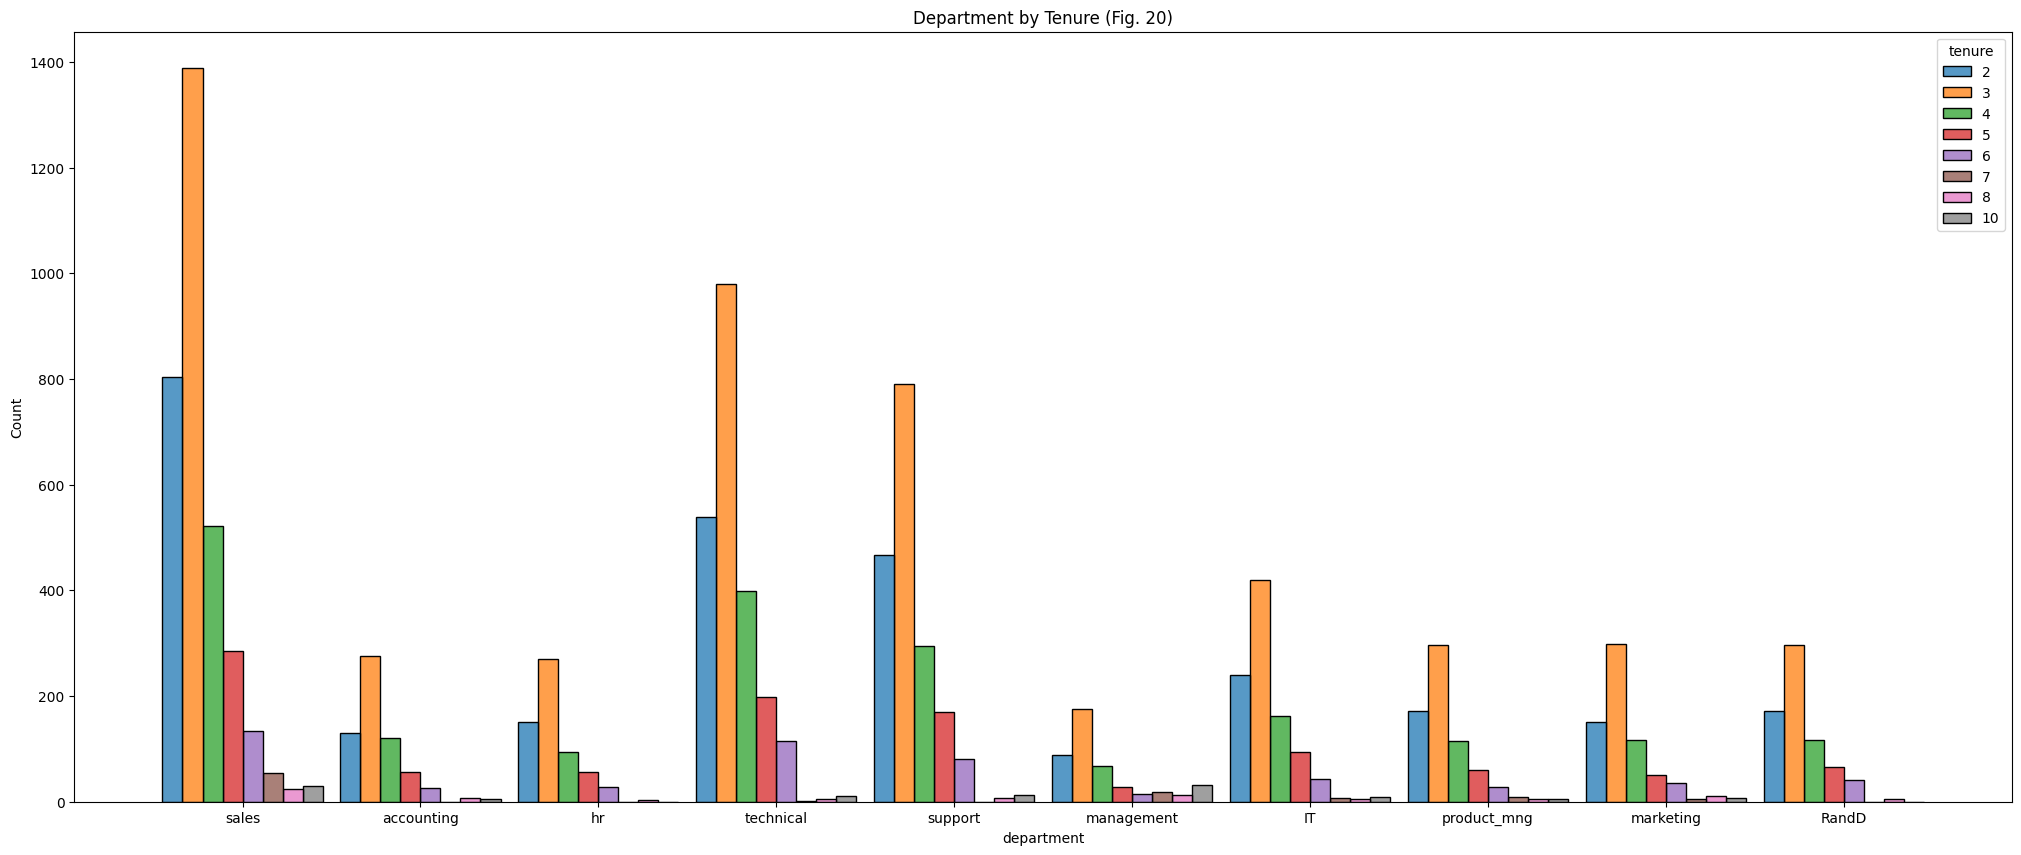

In [187]:
print('Average and Median Satisfaction Level by Turnover: \n', df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])*100, sep='')

# EDA Visualizations 1
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(x='satisfaction_level', hue='left', data=df1, hue_order=[0, 1], multiple='dodge', shrink=.8, ax=axes[0])
axes[0].set_title('Satisfaction Level vs. Turnover (Fig. 17)')
sns.boxplot(x="satisfaction_level", y = 'number_project', hue = 'left', data=df1, orient = 'h', ax = axes[1])
axes[1].set_title('Number of Projects by Satisfaction Level (Fig. 12)')
plt.tight_layout()

# EDA Visualization 2
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x='satisfaction_level', y='department', hue='left', data=df1, orient="h", ax=axes[1])
axes[1].set_title('Satisfaction Level by Department (Fig. 19)') 
sns.boxplot(x='satisfaction_level', y='tenure', hue='left', data=df1, orient="h", ax = axes[0])
axes[0].set_title('Satisfaction Level by Tenure (Fig. 18)') 
plt.tight_layout()


# Department by Tenure
plt.figure(figsize=(25, 10))
sns.histplot(x='department', hue='tenure', data=df1, multiple='dodge', shrink=.9, palette='tab10')
plt.title('Department by Tenure (Fig. 20)')
plt.show()

### <u>Satisfaction Level Insights:</u>
- Per 'Satisfaction Level vs. Turnover (Fig. 17)', there are a lot of unique observations:
    - In general, employees who had higher satisfaction scores were less likely to leave and vice versa with almost a 100% turnover at a score of .1.
    - However, employees who had lower-mediocre scores (approx. .35-.475) had very high turnover rates compared to employees with higher and lower satisfaction scores.
    - There was an interesting trend where employees between the .7 and .9 range had a compressed normal distribution in turnover.
- The last two insights don't make sense:
    - If satisfaction level is supposed to represent the likelihood of an employee staying as the score increases, why is turnover elevated in these groups. 
    - As mentioned earlier, this suggests that employees may not be giving accurate feedback due to fear of retribution, lack of interest, or other external factors.
- Let's see if we can identify groups that may be skewing the data:
-------------------------------------------------------------------------------------------------------------------------------------------
- When we compare the previously made 'Number of Projects by Satisfaction Level (Fig. 12)' and 'Satisfaction Level vs. Turnover (Fig. 17)', the pattern becomes clearer.
    - We know most of the unusually high scores come from employees who work 5-6 projects, and they represent the majority group of employees who left but had high satisfaction level scores.
        - Let's dig deeper.
-------------------------------------------------------------------------------------------------------------------------------------------
- When comparing the previous graphs with 'Satisfaction Level by Department (Fig. 19)':
    - Most of the turnovered employees in the 4 year group had very low satisfaction levels ~0.1.
        - When we look at (Fig. 12), we can see that most of these employees worked 6-7 projects.
    - Most of the turnovered employees in the 5 to 6 year group had higher satisfaction levels (approx .75-.85).
        - When we look at (Fig. 12), we can see that most of these employees worked 4-5 projects.
    - Most of the 3 year turnovered employees had low-mediocre scores of ~.4-.45.
        - When we look at (Fig. 12), we can see that many of these employees worked 2 projects.
- As we can see, homogeneous groups are starting to form.
-------------------------------------------------------------------------------------------------------------------------------------------
- When we look at 'Satisfaction Level by Department (Fig. 19)', we see an even more clear picture:
    - Most of the very low satisfaction levels ~.1 seem to come from accounting, technical, support, management, IT, and RandD.
        - This isn't necessarily a bad thing as this means we're getting relatively accurate information from these departments.
    - Most of the mediocre satisfaction levels (approx. .35-.475) seem to come from sales, product_mng, marketing, and to the highest degree: HR.
        - Even though the overall data in (Fig. 19) suggest some form of collection manipulation from all departments, the previously mentioned departments are the biggest offenders.
    - There weren't any noticeable drivers for employees who left by department for satisfaction levels in the .7-.9 range.
        - This is explained by (Fig. 18), where most of those scores were for 5-6 year tenured employees.
            - As seen in 'Department by Tenure (Fig. 20)', they are smaller in terms of total number of employees and in proportion to other groups but are still large enough to skew data for the overall satisfaction level scoring.
-------------------------------------------------------------------------------------------------------------------------------------------
### <u>Satisfaction Level Summary:</u>
- To preface, data collection is hard.
    - I've personally done research projects before where I collected data for personal usage and for companies to analyze and derive insights.
    - Even as I make every possible precaution to make sure the data is fair, unbiased, and accurate, different (often uncontrollable) forms of bias and manipulation will emerge.
    - The satisfaction level surveys are a prime example of why it needs to be done carefully.
- Overall though, the satisfaction level insights as a whole suggest that it may not be reliable as a metric.
    - Although it had the highest moderate negative correlation, it has many signs that the data was manipulated and/or biased in some way either by the survey respondent, survey collector, and/or management.
    - Considerations need to be made whether to include it as a feature during model development.
    - Furthermore, I would suggest HR refer to the data team to review data collection best practices and procedures to reduce the chances of data bias and manipulation from occurring.  

## <u>Last Evaluation Data:</u>
- Last Evaluation scores had a weak positive correlation with 'Average Monthly Hours' and 'Number of Projects'.
- It likely had an effect on turnover rates based on the observations of average monthly hours and number of projects on turnover.

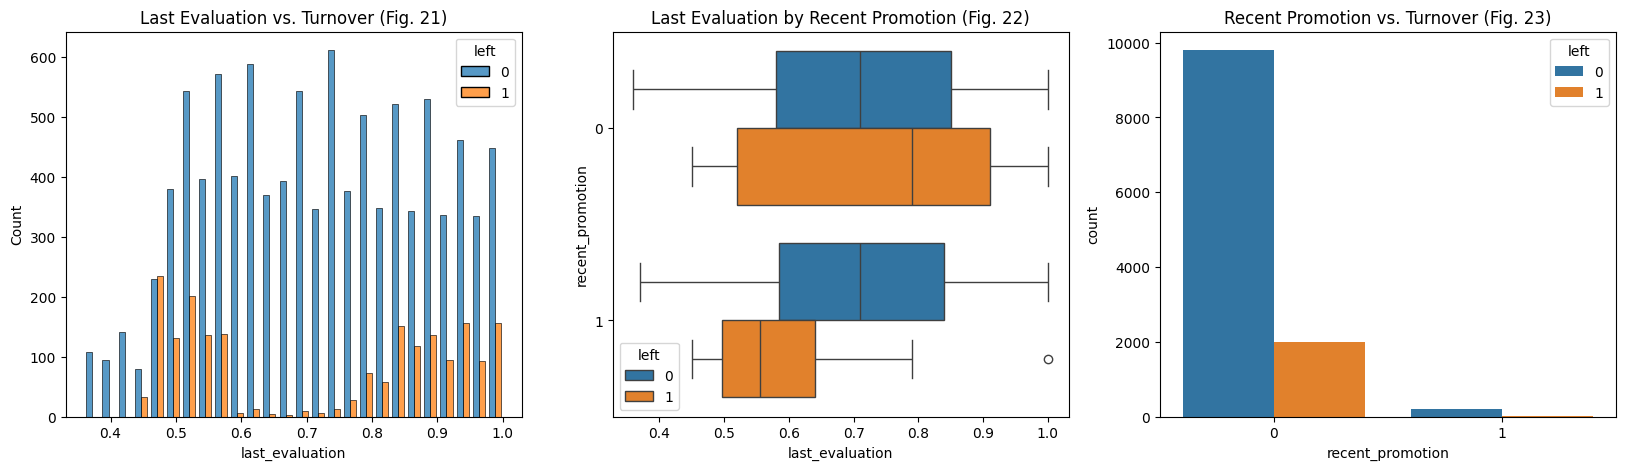

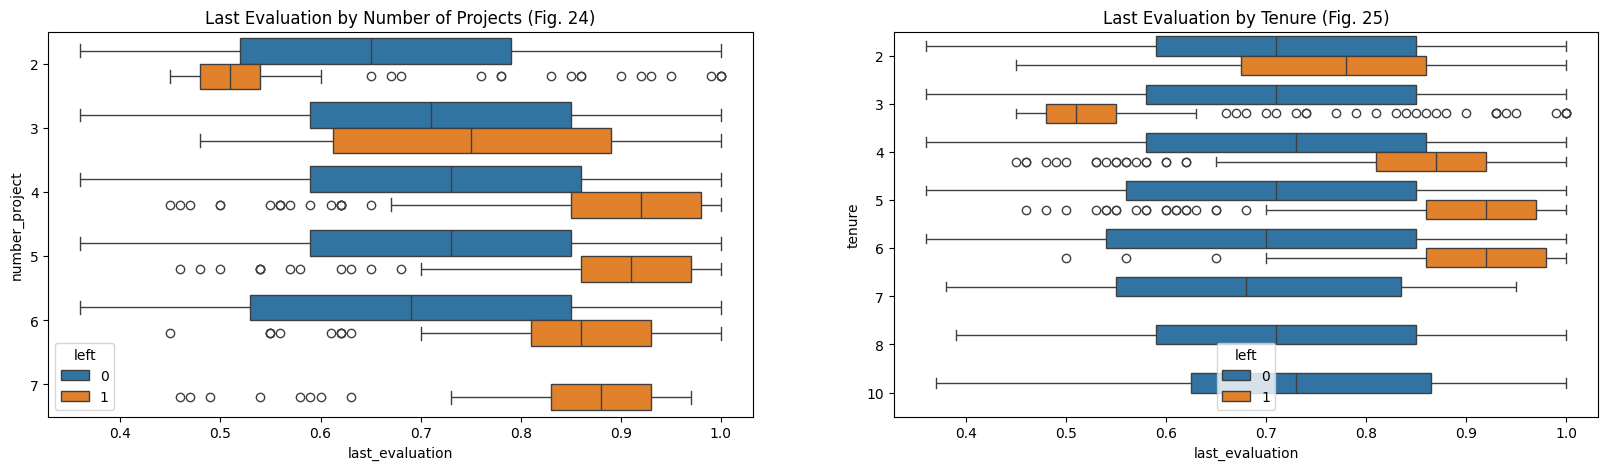

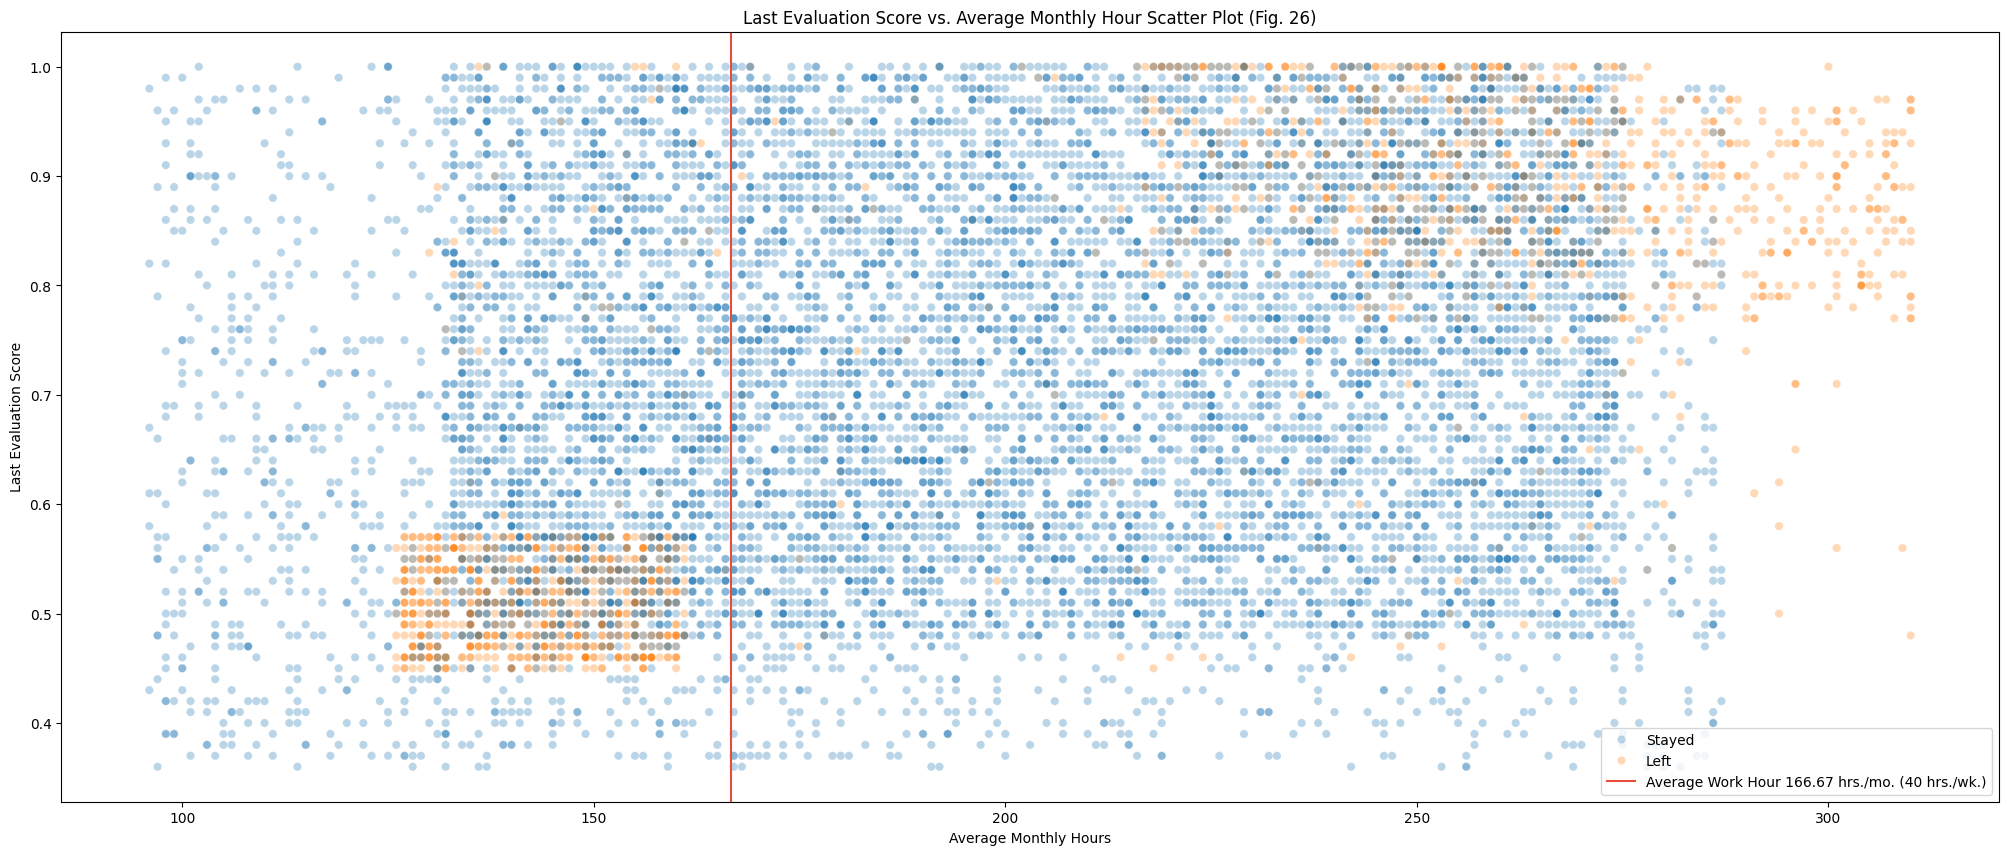

In [188]:
# Last Evaluation EDA Visualizations 1
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(x='last_evaluation', hue='left', hue_order=[0, 1], data=df1, multiple='dodge', shrink=.75, ax=axes[0])
axes[0].set_title('Last Evaluation vs. Turnover (Fig. 21)')  
sns.boxplot(x='last_evaluation', y='recent_promotion', hue='left', orient = 'h', data=df1, ax=axes[1])
axes[1].set_title('Last Evaluation by Recent Promotion (Fig. 22)') 
sns.countplot(x='recent_promotion', hue='left', data=df1, ax=axes[2])
axes[2].set_title('Recent Promotion vs. Turnover (Fig. 23)')  
plt.show()

# Last Evaluation EDA Visualizations 2
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x='last_evaluation', y='tenure', hue='left', orient = 'h', data=df1, ax=axes[1])
axes[1].set_title('Last Evaluation by Tenure (Fig. 25)') 
sns.boxplot(x='last_evaluation', y='number_project', hue='left', orient = 'h', data=df1, ax=axes[0])
axes[0].set_title('Last Evaluation by Number of Projects (Fig. 24)') 
plt.show()

# Last Evaluation EDA Visualizations 3
plt.figure(figsize=(25, 10))
sns.scatterplot(x='avg_monthly_hours', y='last_evaluation', hue='left', alpha=.3, data=df1)
plt.axvline(x=166.67, color='#e74c3c', label='166.67 hrs./mo.', ls='-')
plt.title("Last Evaluation Score vs. Average Monthly Hour Scatter Plot (Fig. 26)")
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='#e74c3c', linestyle='-'))
labels.append('166.67 hrs./mo.')
plt.legend(handles, ['Stayed', 'Left', 'Average Work Hour 166.67 hrs./mo. (40 hrs./wk.)'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation Score')
plt.show()

## <u>Last Evaluation Insights:</u>
- Last Evaluation vs. Turnover (Fig. 21) shows that last evaluation scores had an interesting effect on turnover:
    - Scores between approx. (.45-.6) and approx. (.75-1) had the highest rates of turnover.
    - Scores between approx. (.6-.75) and lower than .45 had the lowest rates of turnover.
    - Under optimal circumstances, we should expect a right skewed distribution of turnover where most of the turnovered employees should have lower evaluation scores.
        - This would mean that well performing employees should be getting incentives to stay, while employees with lower scores should be either uptrained, get additional support, or offboarded.
    - Let's see how promotions correlate with last evaluation scores.
----------------------------------------------------------------------------------------------------------------------------------------
- Last Evaluation by Recent Promotion Box Plot (Fig. 22) Observations:
    - Scores between employees that stayed were virtually the same between promoted and not promoted employees.
        - Evaluation scores shouldn't be the only requirement in promoting employees.
            - They are often subjective and may not be an accurate reflection of an employee's performance.
        -  Evaluation scores should be higher for those who were recently promoted since the scores should reflect the best candidate for that role.
    - For those who left, scores were more distinct.
        - Most of the turnovered employees who were promoted had much lower evaluation scores than those that stayed.
        - Those who weren't promoted had a much wider distribution.
            - It's important to note that their median and third quartile scores were higher than those that stayed.
                - This may suggest that some managers are inflating evaluation assessment scores for employees that are likely to leave to try to retain them.
- Internal promotions should come from the best employees and those employees should have on average better evaluation scores.
    - As seen in 'Recent Promotions vs. Turnover (Fig. 23)', promotion opportunities are limited and should only be reserved for the best employees.
----------------------------------------------------------------------------------------------------------------------------------------
- When we investigate further in 'Last Evaluation by Number of Projects (Fig. 24)':
    - We notice that many of the turnovered employees who had greater than 3 projects had significantly higher evaluation scores than those that stayed.
        - This suggests for that grouping of employees that managers are inflating scores for employees who are likely to leave in order to retain them.
            - This creates an environment that's prime for burnout.
            - The 'Last Evaluation by Tenure (Fig. 25)' box plot supports this idea further as many of the more tenured employees who left had much higher evaluation scores than those who stayed.
    - We also notice that turnovered employees with only 2 projects had the lowest distinct grouping of evaluation scores (.475-.53).
        - This correlates well with the 3 year tenure group in (Fig. 25) who are underutilized.
            - This suggests these employees are getting lower scores for not completing as many projects.
    - Scoring is mostly uniform across project levels for employees that stayed in (Fig. 24) and (Fig. 25).
        - This suggests that the scoring among these groupings is being driven by other factors than the number of projects.
----------------------------------------------------------------------------------------------------------------------------------------
- Finally, for our last observation in this group, we'll look at a scatterplot of 'Average Monthly Hours by Last Evaluation Scores (Fig. 26)':
    - We can see a large cluster of turnovered employees who worked ~130-170 hours and had an evaluation score between .45 and .55.
        - From previous observations, this correlates with the 3 year tenure group, who are likely undertrained, undersupported, and underutilized.
    - There was also a very dispersed cluster of employees who left who worked approximately 225+ average monthly hours with evaluation scores of approximately .75+.
        - This correlates with the 4-6 year tenure turnovered employees, who are likely overworked and suffering from burnout.
----------------------------------------------------------------------------------------------------------------------------------------
### <u>Last Evaluation Summary:</u>
- The major takeaway from this data is that the turnovered employees were primarily found in two groups:
    - The underutilized group which had low scores, few projects, and worked fewer average monthly hours than employees that stayed.
    - The over-worked group which had high scores, too many projects, and worked more average monthly hours than the employees that stayed.
- It also shows that there's an issue with the training pipeline from 3 year tenure and beyond, where that group of employees suffer from lack of training and support.
    - We want these employees to succeed.
    - To get them to succeed we need to make sure they can handle the increased workload and responsibilities that are expected when reaching tenure.
    - We should look at our training best practices with our 2 year tenured employees and see where we can apply them at our 3 year tenured level.
- Beyond these suggestions, we may need to reassess at how we do evaluation scoring moving forward.
    - They often can be incredibly subjective, and scores may fluctuate between similarly qualified employees.
    - A uniform and metrics driven scoring system for each department based on the company's goals and values may help reduce fluctuations in scoring.
    - I'd like to reiterate that evaluation scores shouldn't be the only metric when looking at internal employee promotions, but they should have a role nonetheless **<u>if they can assess performance properly</u>**.
----------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------

## Salary Data:
- Salary was already graphed with other variables to show concurrent effects on variables.
- Logically speaking, salary should be a primary influencer as that is the prime reason anyone in society works.
    - It was shown to have a very weak negative correlation with turnovered employees as seen earlier in (Fig. 5).
        - Meaning employees had a slightly lower chance of leaving if their salary was higher.
- As shown many times correlation doesn't necessarily imply causation, but limited to no correlation doesn't mean that a variable didn't have an effect on turnover.

Turnover by Salary: 
   salary  left  Counts  Percentage
0    high     0     942   95.151515
1    high     1      48    4.848485
2     low     0    4566   79.547038
3     low     1    1174   20.452962
4  medium     0    4492   85.383007
5  medium     1     769   14.616993

Turnover Count Ranking by Salary: 
   left  salary  Counts  Percentage
0     0     low    4566   45.660000
1     0  medium    4492   44.920000
2     0    high     942    9.420000
3     1     low    1174   58.965344
4     1  medium     769   38.623807
5     1    high      48    2.410849



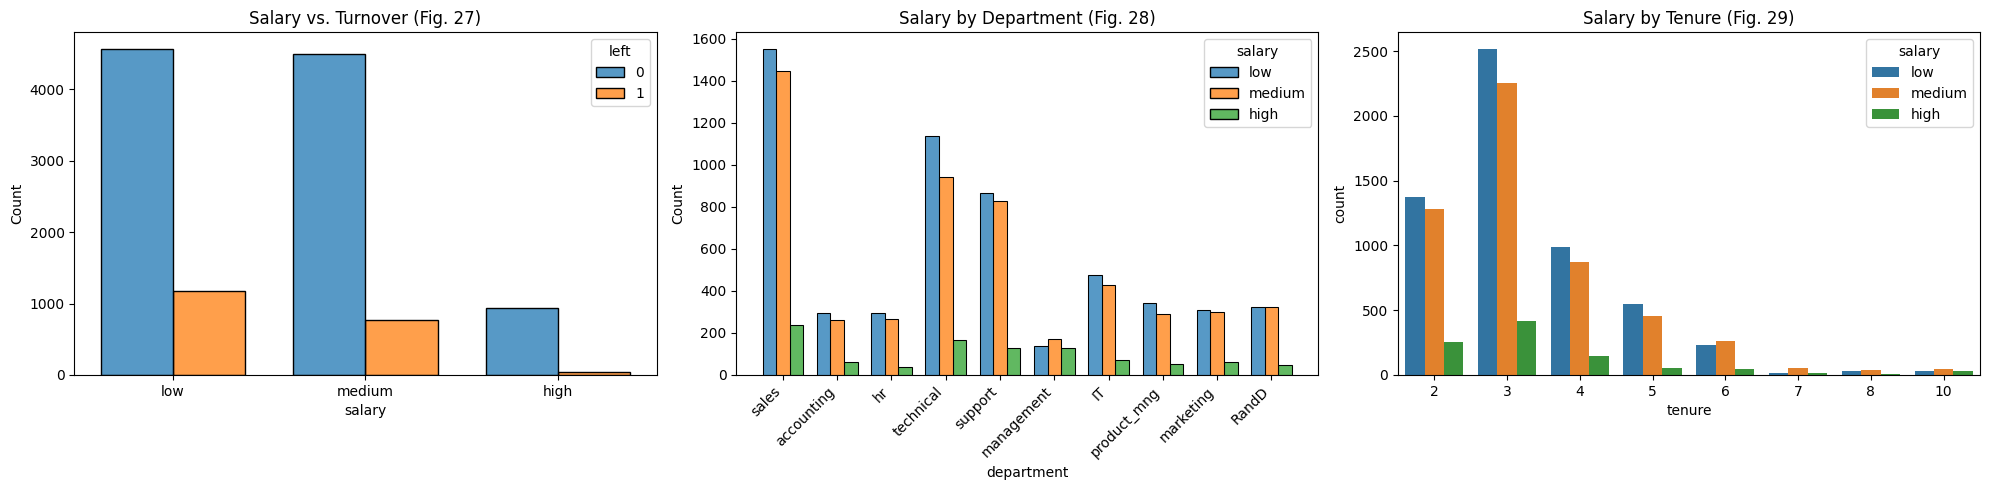

In [189]:
# Salary Counts
s_l_counts = df1.groupby('salary')['left'].value_counts().rename('Counts')
s_l_normalized = df1.groupby('salary')['left'].value_counts(normalize=True).rename('Percentage')*100 
s_l_result = pd.concat([s_l_counts, s_l_normalized], axis=1).reset_index()
print('Turnover by Salary: \n', s_l_result, '\n', sep='')

l_s_counts = df1.groupby('left')['salary'].value_counts().rename('Counts')
l_s_normalized = df1.groupby('left')['salary'].value_counts(normalize=True).rename('Percentage')*100 
l_s_result = pd.concat([l_s_counts, l_s_normalized], axis=1).reset_index()
print('Turnover Count Ranking by Salary: \n', l_s_result, '\n', sep='')


# Salary EDA Visualizations 1
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(x='salary', hue='left', hue_order=[0, 1], data=df1, discrete=1, multiple='dodge', shrink=.75, ax = axes[0])
axes[0].set_title('Salary vs. Turnover (Fig. 27)')

# May leave out: think about it on the weekend.
sns.histplot(x="department", hue = 'salary', data=df1, multiple='dodge', shrink=.75, ax = axes[1])
axes[1].set_xticks(np.arange(len(df1['department'].unique()))) # Set tick locations to prevent warning message
axes[1].set_xticklabels(df1['department'].unique(), rotation=45, ha='right') # Rotate x-labels
axes[1].set_title('Salary by Department (Fig. 28)')

sns.countplot(x="tenure", hue = 'salary', data=df1, ax = axes[2])
axes[2].set_title('Salary by Tenure (Fig. 29)')

plt.tight_layout()

### <u>Salary Insights:</u>
- Salary had a noticeably proportional impact on Turnover.
    - As shown by 'Turnover by Salary:' percentage ratio table and 'Salary vs. Turnover (Fig. 27)', as salaries increased, turnover decreased exponentially relative to the size of the salary group.
        - In other words, there was a relative decrease in turnover ratios between low salary (79.55% to 20.45% stayed to left) and medium salary (85.4% to 14.6% stayed to left).  However, there was a sharp decrease in turnover ratios when moving from medium to the high salaries (95.15 to 4.85 stayed to left).
        - This data does suggest that increasing employees from low to medium salary likely wouldn't result in a massive reduction in turnover.
        - However, increasing an employee's salary from a medium to high would likely result in reduced turnover.
            - Regardless, salary increases for employees would likely be incredibly costly for the company and result in little gain.
---------------------------------------------------------------------------------------------------------------------------------------------
- Beyond the salary's effect on turnover, there wasn't any other notable mentions when it comes to salary that hasn't already been observed.
    - As seen in 'Salary by Department (Fig. 28)', distributions of salary are similar across most departments with the exception of management.
        - This makes sense as managerial roles pay more and generally have more responsibilities.
    - 'Salary by Tenure (Fig. 29)' shows employees have similar salary distributions across all tenure levels up until they reach 6 year tenure.
        - At 6 years and beyond tenure, salary ratios between employees start to equalize.
---------------------------------------------------------------------------------------------------------------------------------------------
### <u>Salary Summary:</u>
- Overall, the data doesn't really provide any useful insights besides showing that salary is a limited predictor of turnover.
- However, including salary in our upcoming models would add a useful dimension to the data and could improve the predictive power of our models, especially when our stronger predictors are less decisive.

## <u>Work Accident Data:</u>
- Finally, we will look at work accident data.
- We already looked at the other variables to varying degrees, but this variable was left out in most analyses due to lack of correlative power as shown in our correlation graphs and lack of logical/linkable insights in our previous sections.
- However, when it comes to data analysis, it's best to leave no stone unturned.

Work Accident Count: 
               Counts  Percentage
work_accident                    
0               10141   84.571762
1                1850   15.428238

Turnover by Work Accident: 
   work_accident  left  Counts  Percentage
0              0     0    8255   81.402229
1              0     1    1886   18.597771
2              1     0    1745   94.324324
3              1     1     105    5.675676

Work Accidents by Department: 
     department  work_accident  Counts  Percentage
0            IT              0     837   85.758197
1            IT              1     139   14.241803
2         RandD              0     575   82.853026
3         RandD              1     119   17.146974
4    accounting              0     534   85.990338
5    accounting              1      87   14.009662
6            hr              0     521   86.688852
7            hr              1      80   13.311148
8    management              0     364   83.486239
9    management              1      72   16.513761
10   

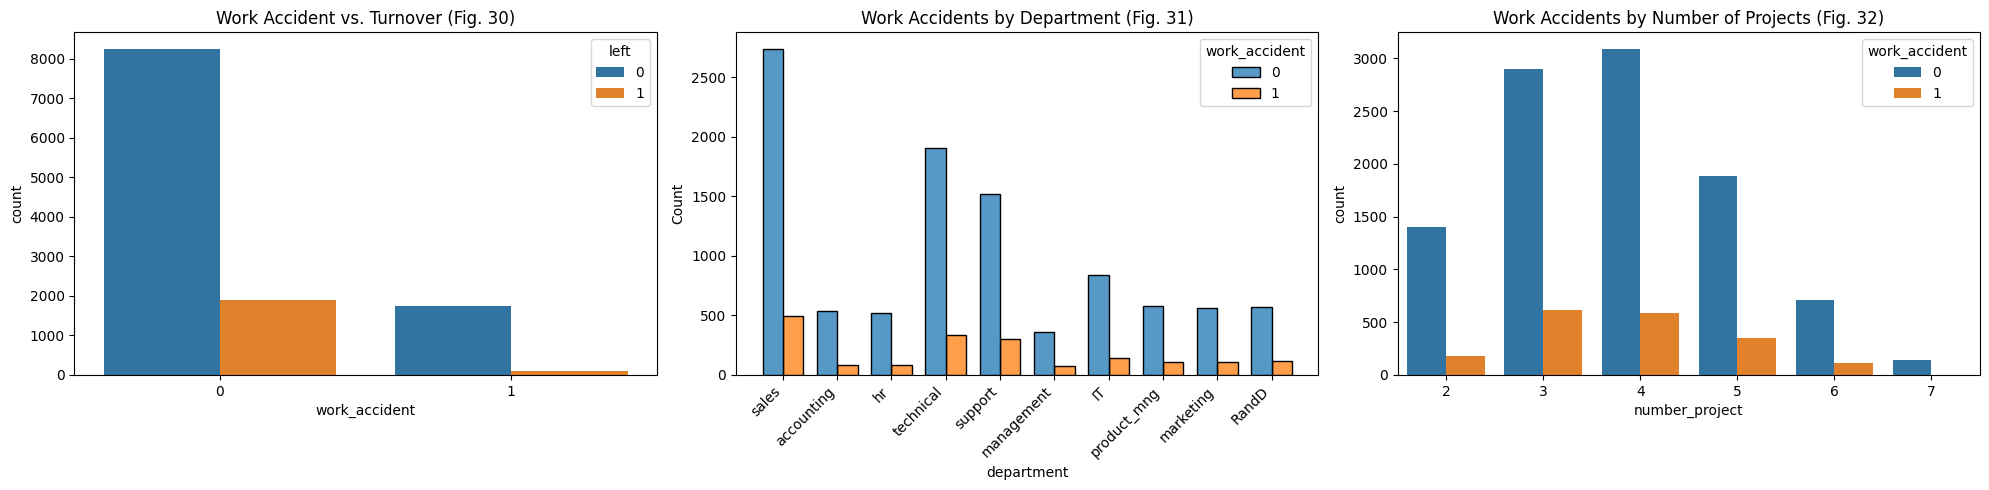

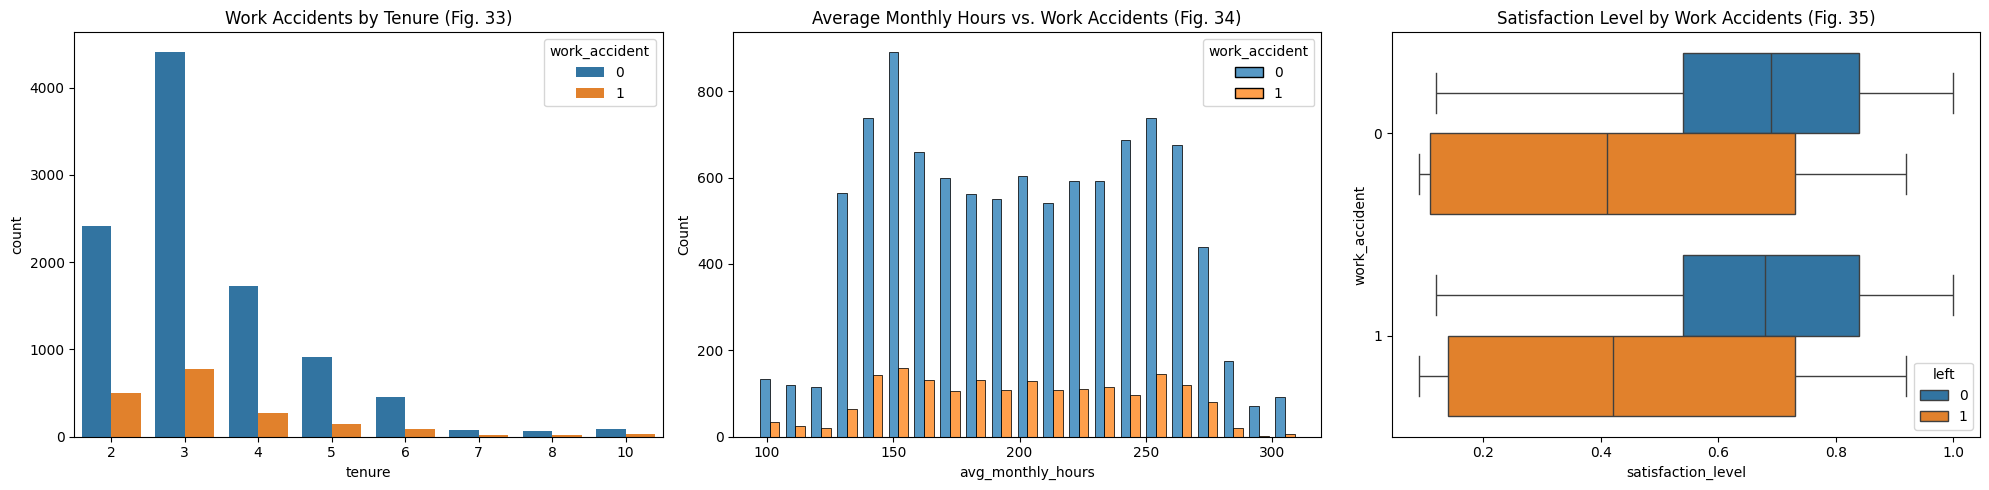

In [190]:
# Work Accident Counts Data
accident_counts = df1['work_accident'].value_counts().rename('Counts')
accident_normalized = df1['work_accident'].value_counts(normalize=True).rename('Percentage')*100 
accident_result = pd.concat([accident_counts, accident_normalized], axis=1)
print('Work Accident Count: \n', accident_result, '\n', sep='')

w_l_counts = df1.groupby('work_accident')['left'].value_counts().rename('Counts')
w_l_normalized = df1.groupby('work_accident')['left'].value_counts(normalize=True).rename('Percentage')*100 
w_l_result = pd.concat([w_l_counts, w_l_normalized], axis=1).reset_index()
print('Turnover by Work Accident: \n', w_l_result, '\n', sep='')

w_d_counts = df1.groupby('department')['work_accident'].value_counts().rename('Counts')
w_d_normalized = df1.groupby('department')['work_accident'].value_counts(normalize=True).rename('Percentage')*100 
w_d_result = pd.concat([w_d_counts, w_d_normalized], axis=1).reset_index()
print('Work Accidents by Department: \n', w_d_result, '\n', sep='')

w_t_counts = df1.groupby('tenure')['work_accident'].value_counts().rename('Counts')
w_t_normalized = df1.groupby('tenure')['work_accident'].value_counts(normalize=True).rename('Percentage')*100 
w_t_result = pd.concat([w_t_counts, w_t_normalized], axis=1).reset_index()
print('Work Accidents by Tenure: \n', w_t_result, '\n', sep='')

w_n_counts = df1.groupby('number_project')['work_accident'].value_counts().rename('Counts')
w_n_normalized = df1.groupby('number_project')['work_accident'].value_counts(normalize=True).rename('Percentage')*100 
w_n_result = pd.concat([w_n_counts, w_n_normalized], axis=1).reset_index()
print('Work Accidents by Number of Projects: \n', w_n_result, '\n', sep='')

# Work Accidents EDA Visualization 1
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.countplot(x='work_accident', hue='left', data=df1, ax=axes[0])
axes[0].set_title('Work Accident vs. Turnover (Fig. 30)')

sns.histplot(x='department', hue ='work_accident', data=df1, multiple='dodge', shrink=.75, ax = axes[1])
axes[1].set_xticks(np.arange(len(df1['department'].unique()))) # Set tick locations to prevent warning message
axes[1].set_xticklabels(df1['department'].unique(), rotation=45, ha='right')
axes[1].set_title('Work Accidents by Department (Fig. 31)')

sns.countplot(x='number_project', hue ='work_accident', data=df1, ax=axes[2])
axes[2].set_title('Work Accidents by Number of Projects (Fig. 32)')

plt.tight_layout()

# Work Accidents EDA Visualization 2
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sns.countplot(x='tenure', hue ='work_accident', data=df1, ax=axes[0])
axes[0].set_title('Work Accidents by Tenure (Fig. 33)')

sns.histplot(x='avg_monthly_hours', hue='work_accident', data=df1, bins= round(((max(df1['avg_monthly_hours'])-min(df1['avg_monthly_hours']))/10)), hue_order=[0, 1], multiple='dodge', shrink = .75, ax=axes[1])
axes[1].set_title('Average Monthly Hours vs. Work Accidents (Fig. 34)')

sns.boxplot(x='satisfaction_level', y='work_accident', hue ='left', data=df1, orient = 'h', ax=axes[2])
axes[2].set_title('Satisfaction Level by Work Accidents (Fig. 35)')

plt.tight_layout()

### Work Accident Insights:
- From the 'Work Accident Counts:' table, about 1850 (15.4%) employees experienced an accident.
    - This is a significant amount of employees experiencing an accident.
        - In other words, almost 1 out of 6 employees experience an accident at the workplace.
-  Interestingly enough, as seen in the percentage ratios in the 'Turnover by Work Accident:' table and 'Work Accident vs. Turnover (Fig 30)', turnover actually decreases proportionally when accidents occur.
    - This could mean that employees are receiving worker's compensation and don't want to leave the company in order to receive benefits.
----------------------------------------------------------------------------------------------------------------------------------------------
- As seen by the percentage ratios in the 'Work Accidents by Department:' table and 'Work Accidents by Department (Fig. 31)', accident rates across departments were generally proportional to the size of the department.
- The percentage ratios in 'Work Accidents by Number of Projects:' and 'Work Accidents by Number of Projects (Fig. 32)' show a similar trend in terms of accident rates.
- The percentage ratios in 'Work Accidents by Tenure:' and 'Work Accidents by Tenure (Fig. 33)' also show similar accident rates with one exception.
    - Employees above 7 years tenure seem to have higher accident rates.
        - The amount of employees in this group is very small and may not be statistically significant.    
---------------------------------------------------------------------------------------------------------------------------------------------
- Finally, 'Average Monthly Hours vs. Work accidents (Fig. 34)' was checked to see if hours worked had a correlation with accidents.
    - When graphed, it was found that accident rates were relatively proportional among groups.
        - In other words, average monthly hours didn't seem to have a major effect on accident rates.
---------------------------------------------------------------------------------------------------------------------------------------------
- Even though work accidents didn't have a significant impact on turnover, it revealed internal issues that may be useful to Salifort Motors to address such as:
    - Accident rates are high among all employees.
        - 15.4% of the workforce experienced an accident.
    - These accidents depending on severity could result in significant financial cost, especially if worker's compensation is being paid and/or resulting legal consequences.
    - They may also be decreasing company wide morale which could be indirectly leading to turnover.
        - Even though there was no significant difference in turnover rates between employees who experienced an accident vs. employees who did not as seen in 'Satisfaction Level by Work Accidents (Fig. 35)', employees will still communicate with each other and hear about accidents that happen to other employees.
            - This may produce a chilling effect and bring down employee morale down as a whole, indirectly leading to turnover.
- All in all, we want to make sure our employees feel and are safe coming into work.
    - We should look at measures to increase workplace safety and reduce accident rates.
---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------


## <u>Final EDA Insights Summary:</u>
- After performing a thorough EDA, we understand our data and have derived a lot of insights that will not only help with model development, but also provide useful insights for HR to act upon.
- Main Insights:
    - About 16.6% (1991) employees have left the company, while 83.4 % (11991) employees stayed.
    - Turnover ratios were relatively proportional across departments.
        - This suggests it's a companywide issue and not limited to a few departments.
    - Most of these employees that left were between 3-6 year tenure.
        - For employees that left:
            - The 3 year tenure employees generally worked less hours and less projects.
                - This suggests that they're undertrained and undersupported.
            - The 4-6 year tenure group generally worked longer hours and had more projects.
                - This suggests that they're being overworked and suffering burnout.
    - Most of the employees that stayed worked between 167.67 and 216.67 average monthly hours.
        - This was found to be true across all departments, salary ranges, tenures, and interestingly, number of projects.
            - This suggests that the arbitrary amount of projects wasn't necessarily an issue for the people that stayed.
                - These employees likely had proper training, support, resources, and most importantly: a manageable workload that came with those projects.
                - In other words, each project has is different in scope and intensity.
            - 3-4 projects was found to be the ideal number to retain the most amount of employees however.
    - Satisfaction level scores are questionable in reliability and accuracy and are likely suffering from some form of data manipulation/bias.
        - Although the scores are correlating with turnover and could, in theory, make predictions with this dataset, the data itself from these satisfaction level surveys may be unreliable.
    - To a lesser degree, last evaluation scores may be suffering from similar issues.
        - It was found that more tenured employees who left had much higher evaluation scores than those that stayed.
            - Managers could be inflating scores of those likely to leave to try to retain them.
            - Managers may be rewarding employees based on number of projects completed and hours worked rather than other qualities.
                - This may be encouraging employees to work longer until they burn out.
                    - They then leave when they realize that they're completing extra work for no gain.
    - Salary was moderately predictive in turnover as expected.
        - As salary increased, turnover decreased exponentially.
            - This exponential drop wasn't as extreme until employees went from the medium to the high salary group.
    - Work Accidents doesn't directly contribute to employee turnover.
        - It actually reduces turnover since employees are likely staying to collect workers compensation.
        - Work accident rates are quite high though: 15.4% of employees experience an accident.
            - This may be causing overall employee satisfaction to drop and contributing to turnover in a way that can't be measured without comparing additional data from external sources (Example: Other similar companies).
- At this point, we have exhausted our options with what we can do with basic EDA.
- It's time to construct our models and see what insights we can draw from them.
--------------------------------------------------------------------------------------------------------------------------------------------

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well the model fits the data

## Step 3. Model Building + Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model
- Identify the type of prediction task.

## Types of Models Most Appropriate for This Task
- Multiple Logistic Regression Model (MLRM)
- Naive Bayes (Gaussian)
- Decision Tree
- Tuned Decision Tree
- Random Forest
- XGB Boost

<u>**Important Notes</u>:**  Multiple models were chosen to evaluate the data. Even though certain model types like Random Forest and XGB are generally more accurate and predictive than MLRM or Naive Bayes, seeing what features and evaluation metrics form for each individual model allows us to gather more insights about our data, engineer new features, and make more predictive and useful models.

## Model Evaluation Metrics
- To choose a model, we'll need to evaluate its performance.
- The best evaluation metrics for turnover prediction:
    1. **Accuracy** measures the proportion of data points that are correctly classified.
    2. **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
    3. **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
    4. **F1-score** is an aggregation of precision and recall.
    5. **AUC** (Champion Model only) evaluates a model's ability to distinguish between classes by measuring the area under the ROC (Receiver Operating Characteristic) curve.
--------------------------------------------------------------------------------------------------------------------------------------------

- In our case, **F1-score** will be used as the primary metric for model success.
    - As seen in the description, **F1-score** is an aggregation of precision and recall.
    - **Recall** is very important, as we don't want to falsely classify employees who are likely to leave as staying.
        - We don't want to miss employees who are likely to leave the company as turnover incurs exorbitant costs.
    - **Precision** is also important, as we don't want to falsely classify employees who are likely to stay as leaving.
        - In other words, we don't want to provide incentives to employees who are likely to stay as this costs resources that could be diverted elsewhere, especially to employees that are likely to leave.
    - **F1-score** would be a good way to balance the two previous metrics.
--------------------------------------------------------------------------------------------------------------------------------------------
**Important Note:** Accuracy, although important, isn't necessarily a good primary evaluation metric, as models could be highly accurate but have very poor recall, precision scores, and, in turn, F1-scores.



## <u>Important Model Assumptions:</u>
### Multiple Logistic Regression Model assumptions:
- Outcome variable is categorical.
- Observations are independent of each other.
- No severe multicollinearity among X variables.
- No extreme outliers.
- Linear relationship between each X variable and the logit of the outcome variable.
- Sufficiently large sample size.

### Gaussian Naive Bayes Model Assumptions:
- Independence of Features (Naive Assumption).
- Gaussian Distribution of Continuous Features.

### <u>Important Note:</u>
- The Decision Tree, Random Forest, and XGB Models don't have 'hard' assumptions like the MLRM model or Naive Bayes above as they are more flexible and handle noise better.
- However, they do have some important considerations in order to model effectively.

### Decision Tree Learning Assumptions:
- The underlying relationships in the data can be learned through axis-parallel splits.
- Informative features exist.
- Sufficient data to learn the splits.
- The target variable has some dependency on the feature variables.

### Random Forest Learning Assumptions:
- The individual decision trees within should have some predictive power but be diverse.
- Informative features exist.
- Sufficient data to train multiple reasonably complex trees.
- The target variable has some dependency on the features.

### XGB Assumptions:
- Learnable Relationships through Tree-Based Models.
- Gradient Boostable Loss Function: XGBoost optimizes a loss function using gradient boosting. This implies that the chosen loss function should be differentiable so that gradients can be calculated.
- Feature Importance and Relevance.
- Sufficient Data for Iterative Tree Building.
- Ordinal Relationship in Encoded Categorical Features: XGBoost inherently works with numerical data. When categorical features are encoded (e.g., using label encoding), XGBoost might implicitly assume an ordinal relationship between the encoded values, which might not always be true. One-hot encoding can mitigate this, but it can also lead to increased dimensionality and sparsity.

### Reflection Questions During Construct Stage:

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Reflection Results (Post Construct Phase):

1. Nothing was particularly 'odd' when developing different models over multiple rounds.
2. See each round's insights for details.
3. Assumptions for each model have been met or at least presumed after careful consideration.  The Multiple Logistic Regression Model would be a good example of making presumptions for the sake of brevity.
4. Some of the models fit very well for the data, mainly the Random Forest Model, Tuned Decision Tree, and XGB Model.
5. There isn't anything particularly obvious that would improve our models.  The only thing that likely needs a review based on our prior EDA is the satisfaction level variable.  There are questions about its usability in terms of actionable insights and data integrity in the collection methodology.  More specifically,employees might be responding positively if they fear retaliation and/or may not be providing thoughtful responses.  In terms of actionable insights, it also lacks explanatory power: if employees are satisfied, why are they satisfied and if they're not satisfied, why are they not satisfied?  All in all, if we could get additional data on an employee's reasoning into providing their satisfaction level, it may be a more usable metric.
6. Resources at this stage are still Python w/Jupyter Notebooks along with AI integration for code debugging.
7. Based on our previous EDA regarding satisfaction level data, it has shown noticeable signs of data bias/manipulation.  Choices on whether to include it in the final models and results need to be considered.

## **Pre-Model Setup:**

- Before modeling, it's important to check model assumptions (especially for Multiple Logistic Regression Models) and to create special functions to automatically produce tables, graphs, and other data to make comparison easier.
- Most assumptions have been met already for MRLM: outcome variable is categorical, observations are independent of each other, there are no extreme outliers, and there is a large sample size.
    - However, we should verify that there are:
        - No severe multicollinearity among X variables.
        - Linear relationship between each X variable and the logit of the outcome variable.

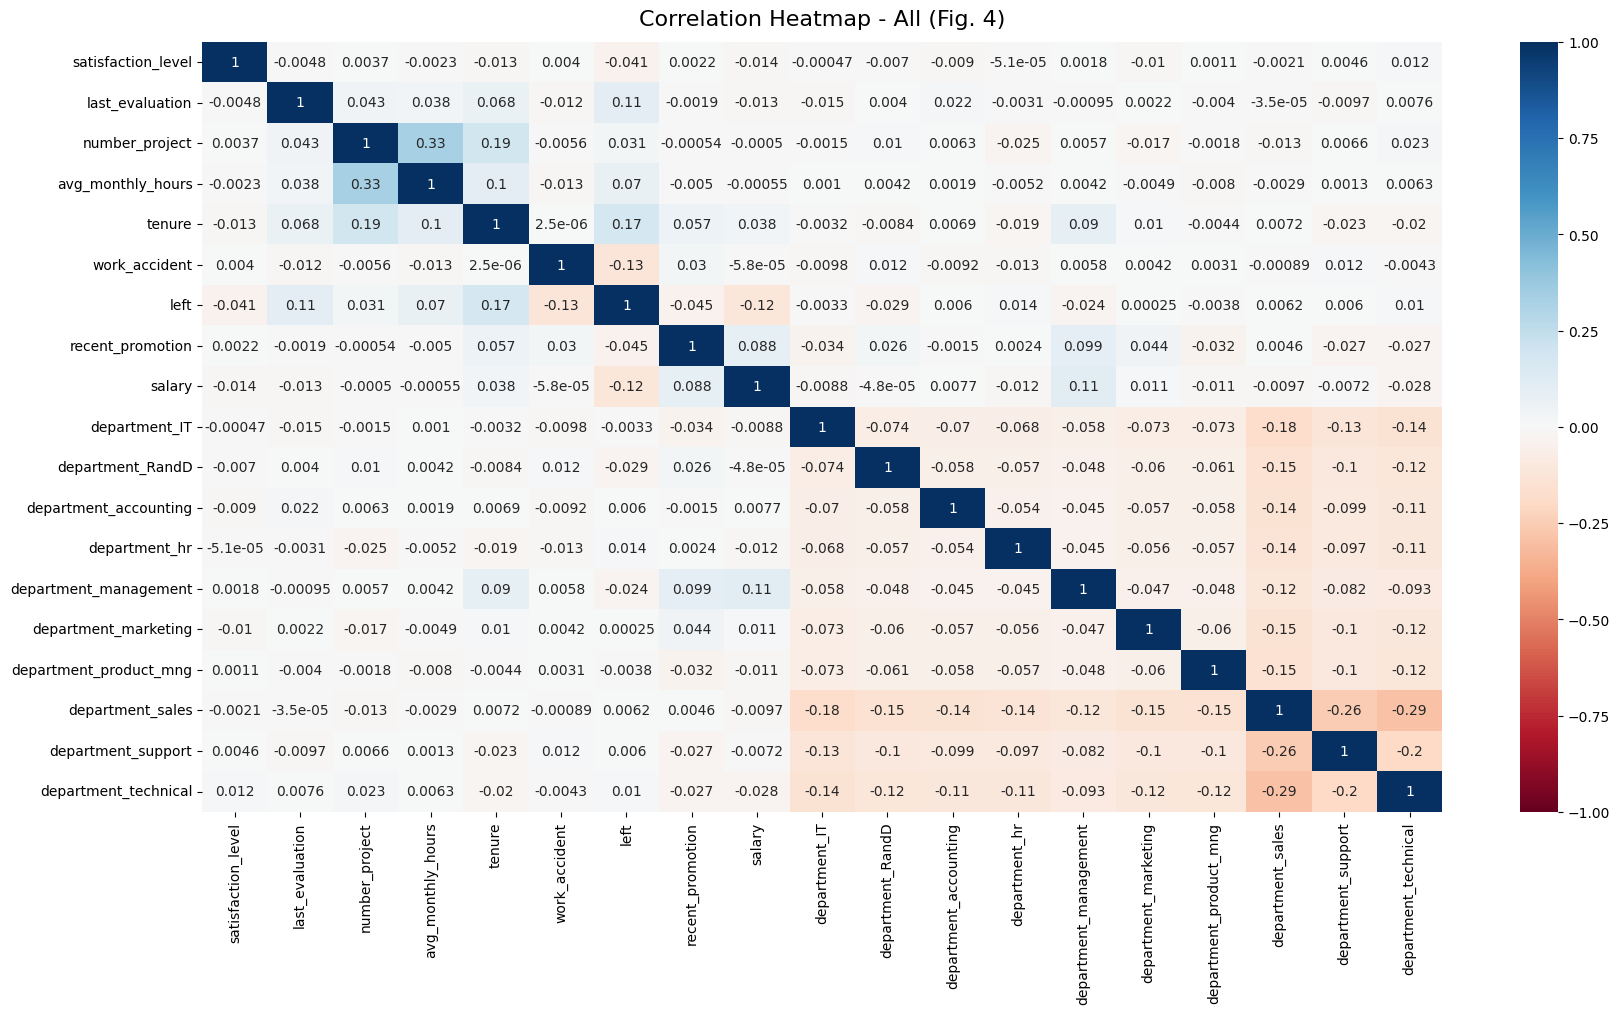

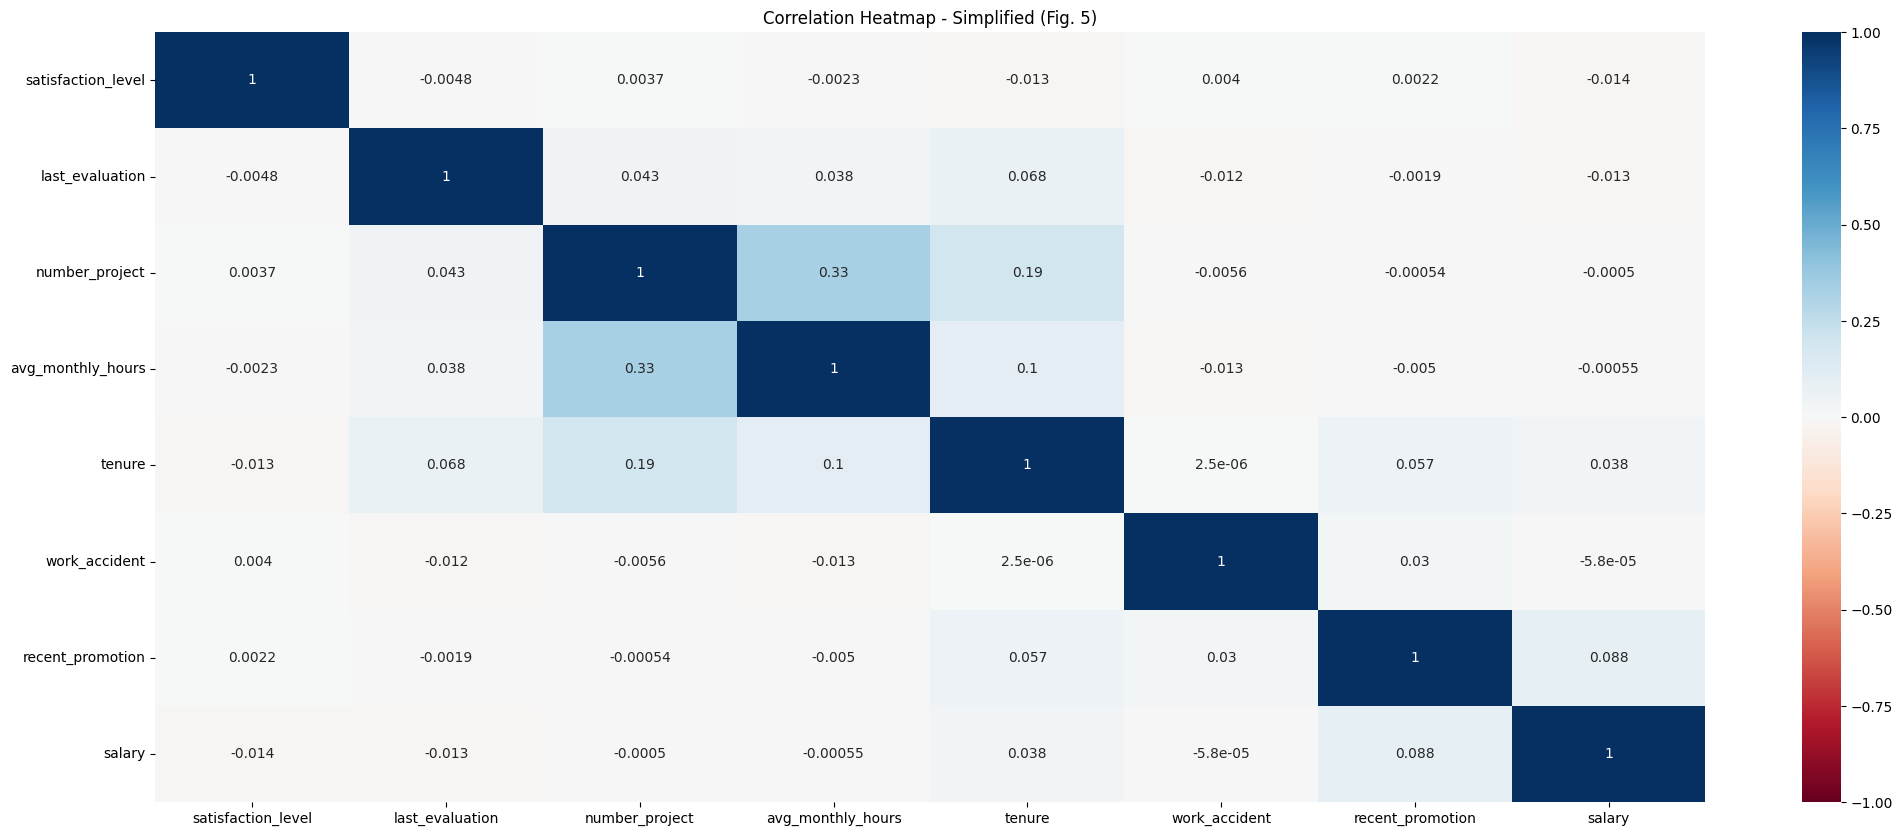

In [191]:
# This is to check multicollinearity of among X variables for Multiple Logistic Regression Model

# Correlation Heat Map - Full
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_enc.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("RdBu", as_cmap=True))
heatmap.set_title('Correlation Heatmap - All (Fig. 4)', fontdict={'fontsize':16}, pad=12);
plt.show()

# Correlation Heat Map - No Deparmtent or Left Variable
plt.figure(figsize=(25, 10))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'avg_monthly_hours', 'tenure', 'work_accident', 'recent_promotion', 'salary']].corr(), vmin=-1, vmax=1, annot = True, cmap=sns.color_palette("RdBu", as_cmap=True))
plt.title('Correlation Heatmap - Simplified (Fig. 5)')
plt.show()


## <u>**Checking Multiple Linear Regression Model Assumptions:**</u>
- Referencing 'Correlation Heatmap - All (Fig. 4)', there is a moderate positive correlation as seen earlier between 'number_project' and 'avg_monthly_hours'.
- Elsewhere, there's either no correlation or only weak correlations between independent variables.
    - Regardless, all correlations are low enough where we can assume there's no severe multicollinearity among variables.
--------------------------------------------------------------------------------------------------------------------------------------------
- Checking the 'linear relationship between each X variable and the logit of the outcome variable' is a bit harder and more time consuming.
    - There are multiple ways to check it.
    - If this was our only model, I would create Component Plus Residual (CPR) Plots for each of our predictor variables.
        - However, we have over 10 variables and this would eat up a lot of time and resources to create 10 different plots.
    - Regardless, our data is highly likely to break that assumption.
        - We can infer this as we noticed many non-linear relationships in the scatter plots created in the prior EDA section.
    - Since the multiple logistic regression model is only being used to compare the efficacy of other models and derive insights from the predictors, we will assume the linear relationship between each X variable and the logit of the outcome variable is met for now.
--------------------------------------------------------------------------------------------------------------------------------------------
## <u>**Model Evaluation Function:**</u>
- To make results easier to display, I made a 'Model Evaluation Function' to extract the accuracy, precision, recall, and f1-score from a model run.

In [192]:
#Model Evaluation Function - Displays model score based on latest run.
def evaluate_model(model_name, model, X_val_data, y_val_data):
    """
    Evaluates a trained classification model and returns a dictionary
    containing the model name, F1 score, recall, precision, and accuracy.
    """
    y_pred = model.predict(X_val_data)
    accuracy = accuracy_score(y_val_data, y_pred)
    precision = precision_score(y_val_data, y_pred, zero_division=0)
    recall = recall_score(y_val_data, y_pred, zero_division=0)    
    f1 = f1_score(y_val_data, y_pred, zero_division=0)
    results = {
        'Model': [model_name],  # Wrap in a list to create a column with one value
        'F1 Score': [f1],
        'Recall': [recall],
        'Precision': [precision],    
        'Accuracy': [accuracy]                
    }
    return results

## **Round 1:**
- Each Round (#) will have a base data set.
- This is a transformed and feature engineered dataset (based on what we're adjusting/testing).
- Each part of this data is Separated into Champion, Validation, and Training sets.
    - The training set is the data we're training our models on.
    - The validation set is a subset of data we test the trained models on.
        - This produces scores for us to compare with other models.
    - The Champion set is data that is extracted and saved for the final test.
        - This data is important because it's considered unseen and allows us to simulate how the model would work in a real world setting.
- Separating data in this manner helps to prevent data leakage and allows us to create more robust and accurate models.

In [193]:
#Round 1
#Base Data (All-Separated)
df1_all = df1.copy()
X = df1_all.drop(columns=['left'], axis=1)
y = df1_all['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state=42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Dummy Encoding Department on Train Set
X_train = pd.get_dummies(X_train, drop_first=False).astype(int)
department_names_train = X_train.columns.difference(X_dev.columns.drop('department'))

#Removing Outliers for Train Set
percent_train_75 = X_train['tenure'].quantile(0.75)
percent_train_25 = X_train['tenure'].quantile(0.25)
innerquartile_range_train = percent_train_75 - percent_train_25
lowlimit = percent_train_25 - innerquartile_range_train * 1.5
uplimit = percent_train_75 + innerquartile_range_train * 1.5
outlier_index_train = X_train[(X_train['tenure'] <= lowlimit) | (X_train['tenure'] >= uplimit)].index
X_train = X_train.drop(outlier_index_train)
y_train = y_train.drop(outlier_index_train)

#Transforming Test and Champion Test
#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Dummy Encoding Department for Test and Champion Test
X_test = pd.get_dummies(X_test, drop_first=False).reindex(columns=X_train.columns, fill_value=0)
X_champ_test = pd.get_dummies(X_champ_test, drop_first=False).reindex(columns=X_train.columns, fill_value=0)

#Removing Outliers for Test Set
outlier_index_test = X_test[(X_test['tenure'] <= lowlimit) | (X_test['tenure'] >= uplimit)].index
X_test = X_test.drop(outlier_index_test)
y_test = y_test.drop(outlier_index_test)

#Removing Outliers for Champion Set
outlier_index_champ = X_champ_test[(X_champ_test['tenure'] <= lowlimit) | (X_champ_test['tenure'] >= uplimit)].index
X_champ_test = X_champ_test.drop(outlier_index_champ)
y_champ_test = y_champ_test.drop(outlier_index_champ)

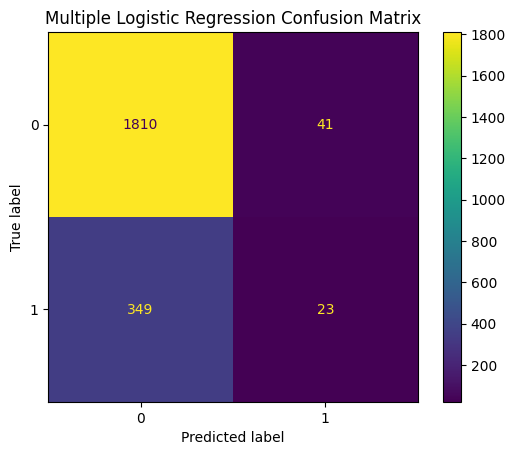

              precision    recall  f1-score   support

      Stayed       0.84      0.98      0.90      1851
        Left       0.36      0.06      0.11       372

    accuracy                           0.82      2223
   macro avg       0.60      0.52      0.50      2223
weighted avg       0.76      0.82      0.77      2223



Model  F1 Score    Recall  Precision  Accuracy
0  Multiple Logistic Regression Model  0.105505  0.061828   0.359375  0.824561

In [194]:
#Logistics Regression Model
lrm_clf = LogisticRegression(random_state=42, max_iter=10000).fit(X_train,y_train)
y_pred = lrm_clf.predict(X_test)

#Confusion Matrix
lrm_cm = confusion_matrix(y_test, y_pred, labels=lrm_clf.classes_)
lrm_disp = ConfusionMatrixDisplay(confusion_matrix=lrm_cm, display_labels=lrm_clf.classes_)
lrm_disp.plot(values_format='')
plt.title('Multiple Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

# Summarized Results
lrm_clf_results = evaluate_model("Multiple Logistic Regression Model", lrm_clf, X_test, y_test)
lrm_clf_table = pd.DataFrame(lrm_clf_results)
lrm_clf_table

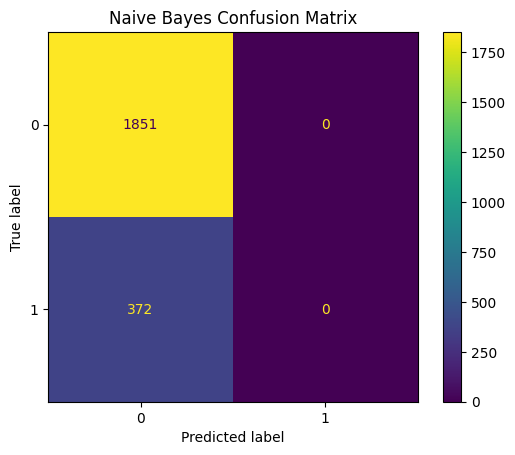

              precision    recall  f1-score   support

      Stayed       0.83      1.00      0.91      1851
        Left       0.00      0.00      0.00       372

    accuracy                           0.83      2223
   macro avg       0.42      0.50      0.45      2223
weighted avg       0.69      0.83      0.76      2223



c:\Users\markw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\markw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\markw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model  F1 Score  Recall  Precision  Accuracy
0  Naive Bayes Model       0.0     0.0        0.0  0.832659

In [195]:
#Gaussian Naive Bayes
nbm = naive_bayes.GaussianNB()
nbm.fit(X_train, y_train)
y_pred = nbm.predict(X_test)

#Confusion Matrix
nbm_cm = confusion_matrix(y_test, y_pred, labels=nbm.classes_)
nbm_disp = ConfusionMatrixDisplay(confusion_matrix=nbm_cm, display_labels=nbm.classes_)
nbm_disp.plot(values_format='')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

#Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

# Summarized Results
nbm_results = evaluate_model("Naive Bayes Model", nbm, X_test, y_test)
nbm_table = pd.DataFrame(nbm_results)
nbm_table

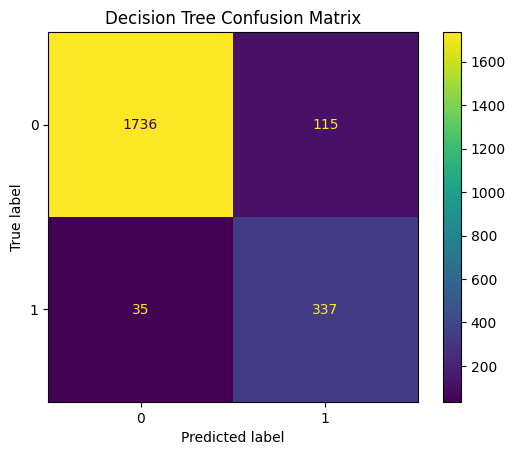

              precision    recall  f1-score   support

      Stayed       0.98      0.94      0.96      1851
        Left       0.75      0.91      0.82       372

    accuracy                           0.93      2223
   macro avg       0.86      0.92      0.89      2223
weighted avg       0.94      0.93      0.94      2223



Model  F1 Score    Recall  Precision  Accuracy
0  Decision Tree  0.817961  0.905914   0.745575  0.932524

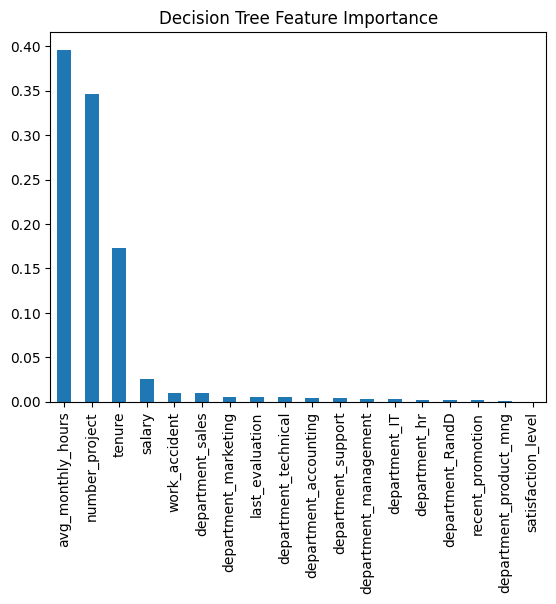

In [196]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)   

dt_cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt.classes_)
dt_disp.plot(values_format='')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

#Decision Tree Feature Importance
decision_importances = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Decision Tree Feature Importance")
decision_importances.plot.bar(ax=ax);

#Summarized Results
dt_results = evaluate_model("Decision Tree", dt, X_test, y_test)
dt_table = pd.DataFrame(dt_results)
dt_table

In [197]:
#Tuned Decision Tree
tree_para = {'max_depth':[2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [2,3,4,5,6,7,8]}
scoring = ['accuracy', 'precision', 'recall', 'f1']

tdt = DecisionTreeClassifier(random_state=42)

tdt_clf = GridSearchCV(tdt, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

tdt_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

## **<u>Important Note:</u>**
- Below is a custom created 'make_results()' function.
- This function allows me to create a table of the scores from the most recent model run that use gridsearch.
- This allows me to quickly see how the model is performing with the current hyperparameters and make adjustments as needed to improve model performance.


In [198]:
#This allows us to see how well the model did based on latest hyperparameters from GridSearchCV.
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

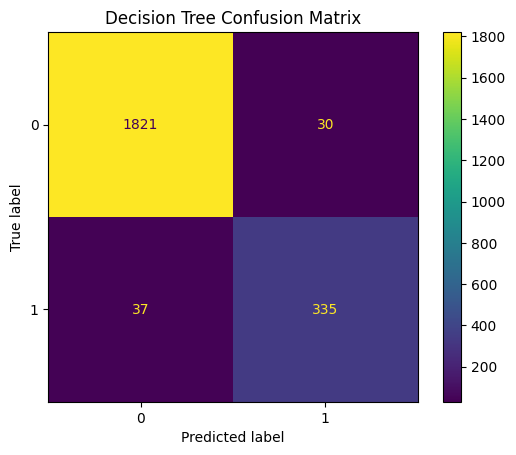

Model        F1    Recall  Precision  Accuracy
0  Tuned Decision Tree  0.880167  0.882667   0.877978  0.959605

In [199]:
#Tuned Decision Tree Prediction
y_pred = tdt_clf.predict(X_test)

#Tuned Decision Tree Confusion Matrix
tdt_clf._cm = confusion_matrix(y_test, y_pred, labels=tdt_clf.classes_)
tdt_clf._disp = ConfusionMatrixDisplay(confusion_matrix=tdt_clf._cm, display_labels=tdt_clf.classes_)
tdt_clf._disp.plot(values_format='')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#Tuned Decision Tree Result Table
tdt_round_table = make_results("Tuned Decision Tree", tdt_clf)
tdt_round_table

In [200]:
#To Find the Best Fit
print(tdt_clf.best_params_)
tdt_clf.best_estimator_

{'max_depth': 7, 'min_samples_leaf': 6}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=42)

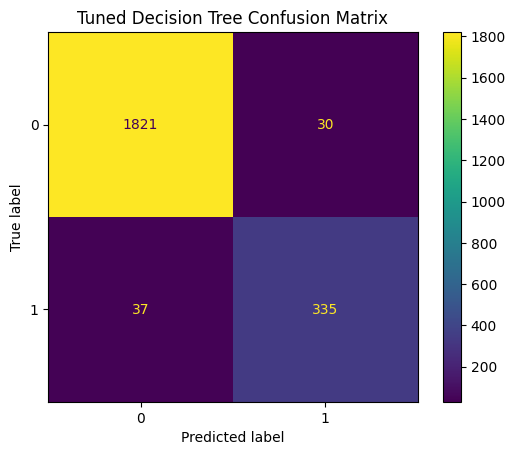

Model  F1 Score    Recall  Precision  Accuracy
0  Tuned Decision Tree  0.909091  0.900538   0.917808  0.969861

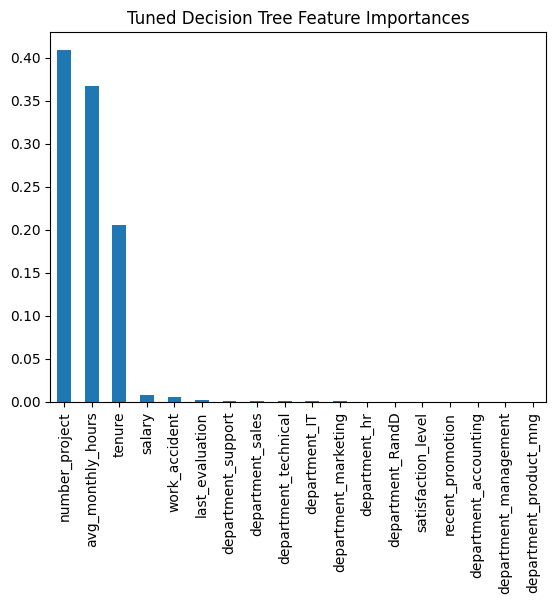

In [201]:
#Optimized Tuned Decision Tree
tdt_opt = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 6, random_state=42)
tdt_opt.fit(X_train, y_train)

#Tuned Decision Tree Prediction
y_pred = tdt_opt.predict(X_test)

#Optimized Tuned Decision Tree Confusion Matrix
tdt_opt._cm = confusion_matrix(y_test, y_pred, labels=tdt_opt.classes_)
tdt_opt._disp = ConfusionMatrixDisplay(confusion_matrix=tdt_opt._cm, display_labels=tdt_opt.classes_)
tdt_opt._disp.plot(values_format='')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.show()

#Tuned Decision Tree Feature Importance
tuned_decision_importances = pd.Series(tdt_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Tuned Decision Tree Feature Importances")
tuned_decision_importances.plot.bar(ax=ax);

#Tuned Decision Tree Result Table
tdt_results = evaluate_model("Tuned Decision Tree", tdt_opt, X_test, y_test)
tdt_table = pd.DataFrame(tdt_results)
tdt_table

In [202]:
#Instantiating Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [ 9, 13, 14, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [3, 4, 5, 6],
              'n_estimators': [50, 100, 150]
            }  


scoring = ['accuracy', 'precision', 'recall', 'f1']

#Run Only if Restarting Model.  Will Reset Pickled Values
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [203]:
%%time
#RUN ONLY IF YOU NEED TO
# Filter the UndefinedMetricWarning to display only once
warnings.filterwarnings("once", category=UserWarning, module="sklearn.metrics._classification")

rf_cv.fit(X_train, y_train)

CPU times: total: 9min 35s
Wall time: 9min 41s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [9, 13, 14, None],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [204]:
#Review Results of Random Forest Model
rf_cv_round_table = make_results("Random Forest Model", rf_cv)
rf_cv_round_table

Model        F1    Recall  Precision  Accuracy
0  Random Forest Model  0.889595  0.881778   0.898069  0.963195

In [205]:
#To get the best parameters from the Previous Random Forest
rf_cv.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

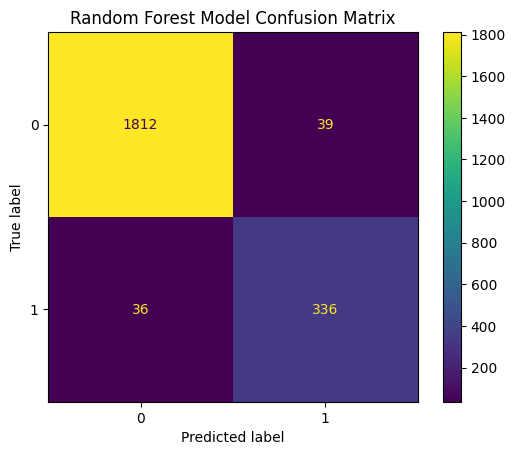

Model  F1 Score    Recall  Precision  Accuracy
0  Random Forest Model  0.899598  0.903226      0.896  0.966262

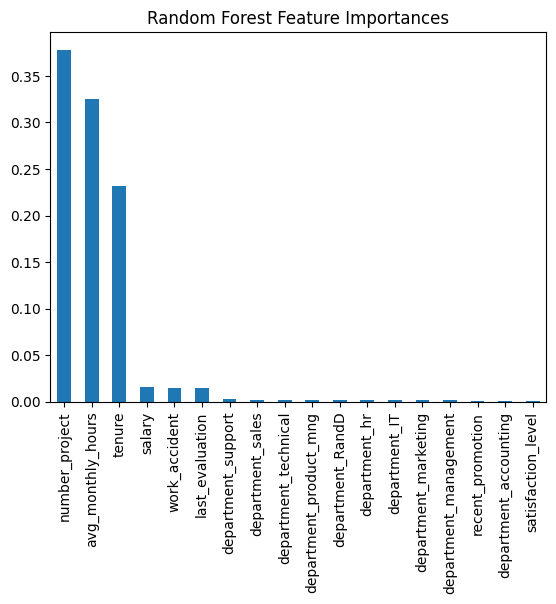

In [206]:
#Random Forest Optimal Model
rf_cv_opt = RandomForestClassifier(n_estimators = 150, max_depth = 9, 
                                min_samples_leaf = 1, min_samples_split = 4,
                                max_features=5, random_state = 42)
rf_cv_opt.fit(X_train, y_train)
y_pred = rf_cv_opt.predict(X_test)

#Random Forest Optimal Confusion Matrix
rf_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=rf_cv_opt.classes_)
rf_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cv_opt_cm, display_labels=rf_cv_opt.classes_)
rf_cv_opt_disp.plot(values_format='')
plt.title('Random Forest Model Confusion Matrix')
plt.show()

#Random Forest Model Feature Importance
random_forest_importances = pd.Series(rf_cv_opt.feature_importances_, index=X_test.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Random Forest Feature Importances")
random_forest_importances.plot.bar(ax=ax);

#Random Forest Results
rf_cv_results = evaluate_model("Random Forest Model", rf_cv_opt, X_test, y_test)
rf_cv_table = pd.DataFrame(rf_cv_results)
rf_cv_table

In [207]:
#Instantiating XGB Model 
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 
 
cv_params = {
                'max_depth': [5],  
                'min_child_weight': [1], 
                'learning_rate': [0.1],      
                'n_estimators': [100],       
                'subsample': [0.8],          
                'colsample_bytree': [0.8],   
                'gamma': [0.2],
                'reg_alpha': [1],     
                'reg_lambda': [1] 
            }

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=3, refit='f1')

In [208]:
%%time
#Run Only if Necessary
xgb_cv.fit(X_train, y_train, verbose=True)

CPU times: total: 4.16 s
Wall time: 341 ms


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.2],
                         'learning_rate': [0.1], 'max_depth': [5],
                         'min_child_weight': [1], 'n_estimators': [100],
                         'reg_alpha': [1], 'reg_lambda': [1],
                         'subsample': [0.8]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

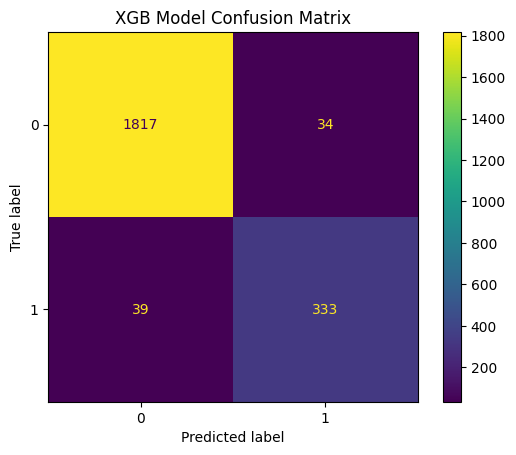

Model        F1    Recall  Precision  Accuracy
0  XGB Model  0.890366  0.890667   0.890354  0.963046

In [209]:
#XGB Round Results 
y_pred = xgb_cv.predict(X_test)

#XGB Model Confusion Matrix
xgb_cv_cm = confusion_matrix(y_test, y_pred, labels=xgb_cv.classes_)
xgb_cv_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cv_cm, display_labels=xgb_cv.classes_)
xgb_cv_disp.plot(values_format='')
plt.title('XGB Model Confusion Matrix')
plt.show()

#XGB Model Results
xgb_cv_result_table = make_results("XGB Model", xgb_cv)
xgb_cv_result_table

In [210]:
xgb_cv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.8}

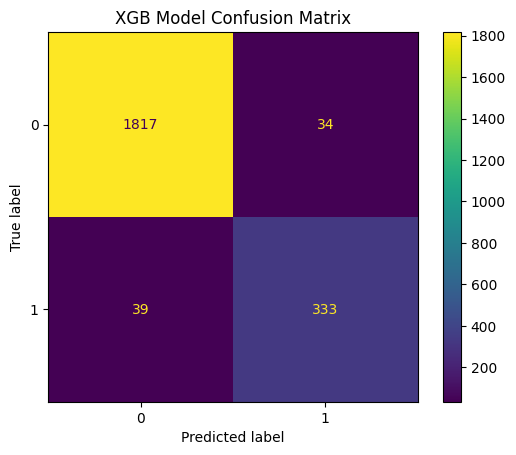

Model  F1 Score    Recall  Precision  Accuracy
0  XGB Model  0.901218  0.895161   0.907357  0.967161

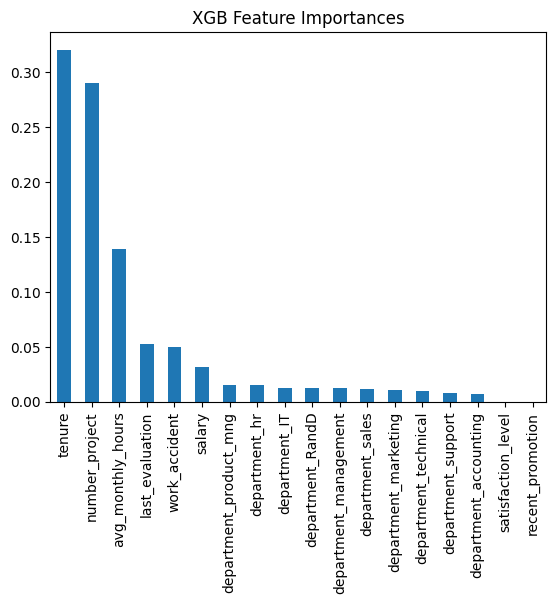

In [211]:
#XGB Optimal Classifier
xgb_cv_opt = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, reg_alpha = 1,\
                           max_depth = 5, min_child_weight = 1, n_estimators = 100, subsample = 0.8, gamma = 0.2,\
                           reg_lambda = 1, random_state=42)
xgb_cv_opt.fit(X_train, y_train)
y_pred = xgb_cv_opt.predict(X_test)

#Optimized XGB Model Confusion Matrix
#(This model was the best result that could be derived after multiple attempts.)
xgb_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=xgb_cv_opt.classes_)
xgb_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cv_opt_cm, display_labels=xgb_cv_opt.classes_)
xgb_cv_opt_disp.plot(values_format='')
plt.title('XGB Model Confusion Matrix')
plt.show()

#XGB Feature Importance
xgb_importances = pd.Series(xgb_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("XGB Feature Importances")
xgb_importances.plot.bar(ax=ax);

#XGB Model Results
xgb_cv_results = evaluate_model("XGB Model", xgb_cv_opt, X_test, y_test)
xgb_cv_table = pd.DataFrame(xgb_cv_results)
xgb_cv_table

In [212]:
#Model Round 1 Results Table (Sorted by F1 Score

Round_1_Table = pd.concat([lrm_clf_table, nbm_table, dt_table, rf_cv_table, tdt_table, xgb_cv_table])
Round_1_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  Precision  Accuracy
0                 Tuned Decision Tree  0.909091  0.900538   0.917808  0.969861
1                           XGB Model  0.901218  0.895161   0.907357  0.967161
2                 Random Forest Model  0.899598  0.903226   0.896000  0.966262
3                       Decision Tree  0.817961  0.905914   0.745575  0.932524
4  Multiple Logistic Regression Model  0.105505  0.061828   0.359375  0.824561
5                   Naive Bayes Model  0.000000  0.000000   0.000000  0.832659

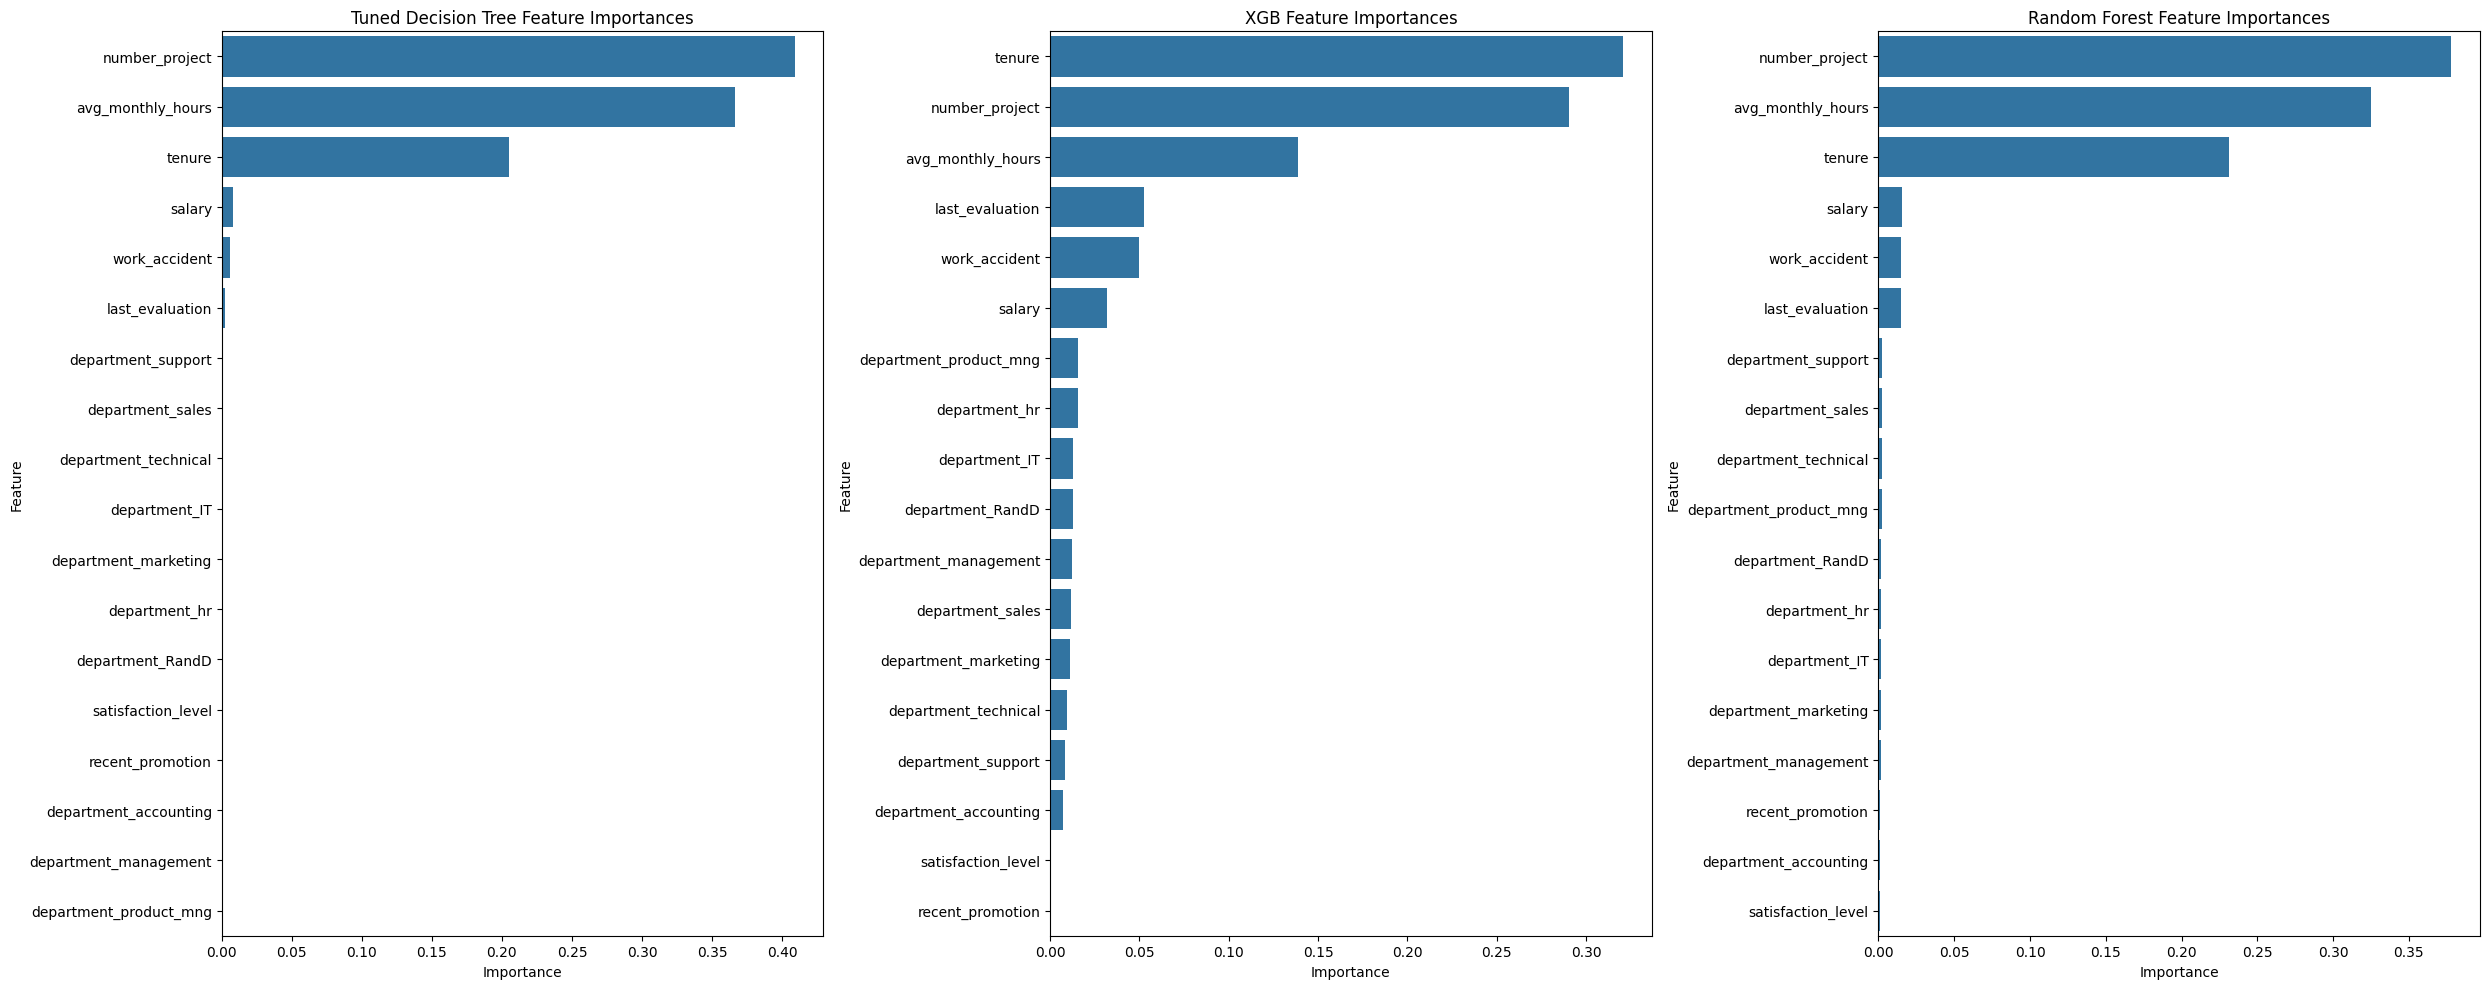

In [213]:
#Feature Importance Charts for Top 3 Models
fig, axes = plt.subplots(1, 3, figsize=(25,10))

sns.barplot(x=xgb_importances.values, y = xgb_importances.index, ax=axes[1])
axes[1].set_title("XGB Feature Importances")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Feature")

sns.barplot(x = random_forest_importances.values, y = random_forest_importances.index, ax=axes[2])
axes[2].set_title("Random Forest Feature Importances")
axes[2].set_xlabel("Importance")
axes[2].set_ylabel("Feature")

sns.barplot(x = tuned_decision_importances.values, y = tuned_decision_importances.index, ax=axes[0])
axes[0].set_title("Tuned Decision Tree Feature Importances")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

plt.tight_layout()

# Round 1 Insights:
- The top 3 models (Tuned Decision Tree, XGB, Random Forest) performed very well at predicting turnover.
    - If I was limited on time and only needed to predict turnover based on incoming data, either of the top 3 models would likely be satisfactory.
- The Multiple Logistic Regression and Naive Bayes Model performed very poorly (the latter of which couldn't make any predictions of turnover.)
    - There are likely too many dimensions caused by the different department variables.
        - Along with that, the sample training size is likely not large enough to adequately model with those methods.
- During prior EDA, it was found that turnover was proportional among departments with minute differences between them.
    - This seems representative across the feature importances of the top 3 models.
        - Department type is not in either of the top 5 most important features.
        - In most of our models, it had little to no feature importance.
    - This is likely causing noise in all the models due to lack of turnover predictability.

## **Round 2:**
- Using observations from prior EDA and the feature importance of the top 3 models, I will remove 'Department' from the next round to see if performance improves across models.
- The subsequent Base Data for Round 2 will be adjusted for this run and stored as a different variable to differentiate between rounds.

In [214]:
#Round 2
#Base Data (All-Separated + No Department)
df1_no_department = df1.copy()
X = df1_no_department.drop(columns=['left'], axis=1)
y = df1_no_department['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state = 42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Removing Outliers+Department for Train Set
percent_train_75 = X_train['tenure'].quantile(0.75)
percent_train_25 = X_train['tenure'].quantile(0.25)
innerquartile_range_train = percent_train_75 - percent_train_25
lowlimit = percent_train_25 - innerquartile_range_train * 1.5
uplimit = percent_train_75 + innerquartile_range_train * 1.5
outlier_index_train = X_train[(X_train['tenure'] <= lowlimit) | (X_train['tenure'] >= uplimit)].index
X_train = X_train.drop(index = outlier_index_train, columns = 'department')
y_train = y_train.drop(outlier_index_train)

#Transforming Test and Champion Test
#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Removing Outliers for Test Set
outlier_index_test = X_test[(X_test['tenure'] <= lowlimit) | (X_test['tenure'] >= uplimit)].index
X_test = X_test.drop(index = outlier_index_test, columns = 'department')
y_test = y_test.drop(outlier_index_test)

#Removing Outliers for Champion Set
outlier_index_champ = X_champ_test[(X_champ_test['tenure'] <= lowlimit) | (X_champ_test['tenure'] >= uplimit)].index
X_champ_test = X_champ_test.drop(index = outlier_index_champ, columns = 'department')
y_champ_test = y_champ_test.drop(outlier_index_champ)

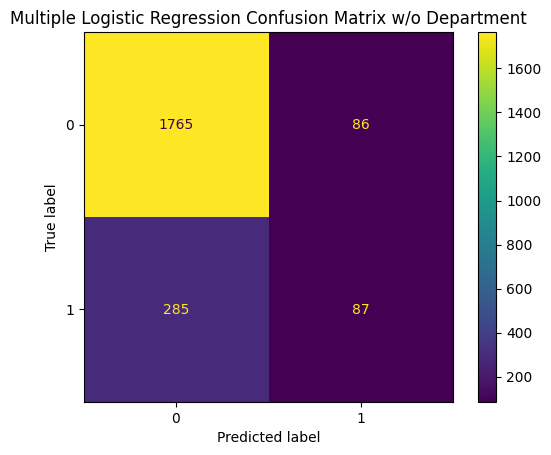

              precision    recall  f1-score   support

      Stayed       0.86      0.95      0.90      1851
        Left       0.50      0.23      0.32       372

    accuracy                           0.83      2223
   macro avg       0.68      0.59      0.61      2223
weighted avg       0.80      0.83      0.81      2223



Model  F1 Score    Recall  \
0  Multiple Logistic Regression Model w/o Department  0.319266  0.233871   

   Precision  Accuracy  
0    0.50289  0.833108

In [215]:
#Logistics Regression Model w/out Department

lrmwd_clf = LogisticRegression(random_state=42, max_iter =500).fit(X_train,y_train)
y_pred = lrmwd_clf.predict(X_test)

lrmwd_cm = confusion_matrix(y_test, y_pred, labels=lrmwd_clf.classes_)
lrmwd_disp = ConfusionMatrixDisplay(confusion_matrix=lrmwd_cm, display_labels=lrmwd_clf.classes_)
lrmwd_disp.plot(values_format='')
plt.title('Multiple Logistic Regression Confusion Matrix w/o Department')
plt.show()

target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

lrm_clf_nd_results = evaluate_model("Multiple Logistic Regression Model w/o Department", lrmwd_clf, X_test, y_test)
lrm_clf_nd_table = pd.DataFrame(lrm_clf_nd_results)

lrm_clf_nd_table

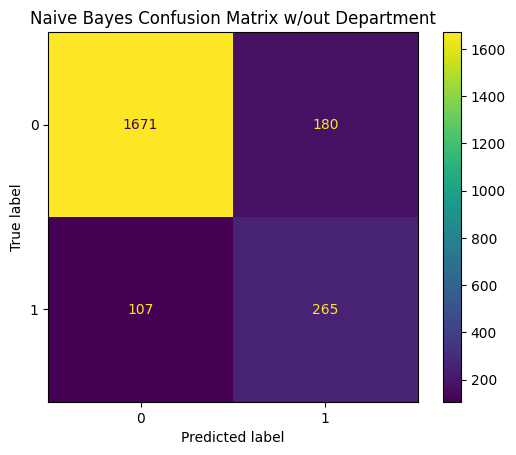

              precision    recall  f1-score   support

      Stayed       0.94      0.90      0.92      1851
        Left       0.60      0.71      0.65       372

    accuracy                           0.87      2223
   macro avg       0.77      0.81      0.78      2223
weighted avg       0.88      0.87      0.88      2223



Model  F1 Score    Recall  Precision  Accuracy
0  Naive Bayes Model w/o Department  0.648715  0.712366   0.595506  0.870895

In [216]:
#Gaussian Naive Bayes w/out Department
nbmwd = naive_bayes.GaussianNB()
nbmwd.fit(X_train, y_train)
y_pred = nbmwd.predict(X_test)

#Confusion Matrix
nbmwd_cm = confusion_matrix(y_test, y_pred, labels=nbmwd.classes_)
nbmwd_disp = ConfusionMatrixDisplay(confusion_matrix=nbmwd_cm, display_labels=nbmwd.classes_)
nbmwd_disp.plot(values_format='')
plt.title('Naive Bayes Confusion Matrix w/out Department')
plt.show()

#Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

nbm_nd_results = evaluate_model("Naive Bayes Model w/o Department", nbmwd, X_test, y_test)
nbm_nd_table = pd.DataFrame(nbm_nd_results)
nbm_nd_table

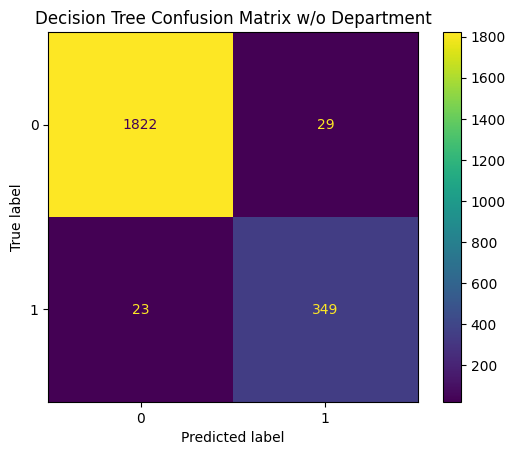

              precision    recall  f1-score   support

      Stayed       0.99      0.98      0.99      1851
        Left       0.92      0.94      0.93       372

    accuracy                           0.98      2223
   macro avg       0.96      0.96      0.96      2223
weighted avg       0.98      0.98      0.98      2223



Model  F1 Score    Recall  Precision  Accuracy
0  Decision Tree w/o Department  0.930667  0.938172    0.92328  0.976608

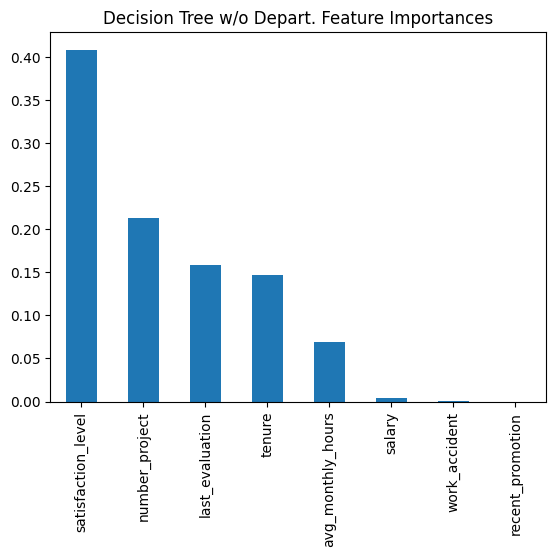

In [217]:
#Decision Tree w/o Department    
dtwd = DecisionTreeClassifier(random_state=42)
dtwd.fit(X_train, y_train)
y_pred = dtwd.predict(X_test)   

#Confusion Matrix
dtwd_cm = confusion_matrix(y_test, y_pred, labels=dtwd.classes_)
dtwd_disp = ConfusionMatrixDisplay(confusion_matrix=dtwd_cm, display_labels=dtwd.classes_)
dtwd_disp.plot(values_format='')
plt.title('Decision Tree Confusion Matrix w/o Department')
plt.show()

#Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

#Feature Importance Decision Tree w/o Department
dt_nd_importances = pd.Series(dtwd.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("Decision Tree w/o Depart. Feature Importances")
dt_nd_importances.plot.bar(ax=ax);

#Decision Tree Results
dt_nd_results = evaluate_model("Decision Tree w/o Department", dtwd, X_test, y_test)
dt_nd_table = pd.DataFrame(dt_nd_results)
dt_nd_table

In [218]:
#Tuned Decision Tree w/o Department
tree_para = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = ['accuracy', 'precision', 'recall', 'f1']

tdtwd = DecisionTreeClassifier(random_state=42)

tdtwd_clf = GridSearchCV(tdtwd, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

tdtwd_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [219]:
tdtwd_clf.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

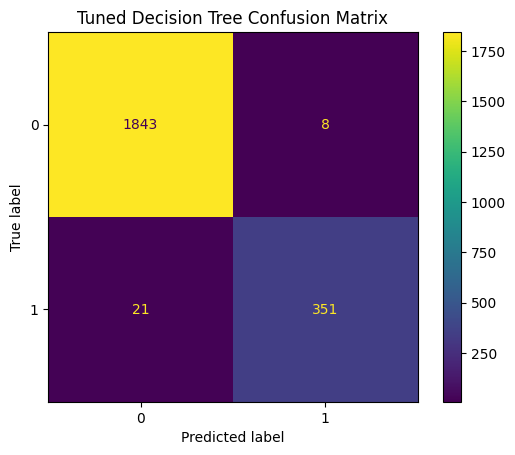

Model  F1 Score    Recall  Precision  Accuracy
0  Tuned Decision Tree w/o Department  0.960328  0.943548   0.977716  0.986955

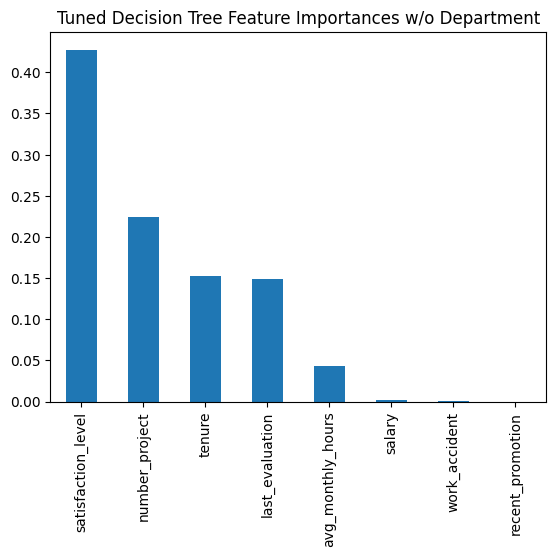

In [220]:
#Optimized Tuned Decision Tree w/o Department
tdtwd_opt = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 2, random_state=42)
tdtwd_opt.fit(X_train, y_train)

#Tuned Decision Tree Prediction
y_pred = tdtwd_opt.predict(X_test)

#Optimized Tuned Decision Tree Confusion Matrix
tdtwd_opt._cm = confusion_matrix(y_test, y_pred, labels=tdtwd_opt.classes_)
tdtwd_opt._disp = ConfusionMatrixDisplay(confusion_matrix=tdtwd_opt._cm, display_labels=tdtwd_opt.classes_)
tdtwd_opt._disp.plot(values_format='')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.show()

#Tuned Decision Tree Feature Importance
tuned_decision_nd_importances = pd.Series(tdtwd_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Tuned Decision Tree Feature Importances w/o Department")
tuned_decision_nd_importances.plot.bar(ax=ax);

#Tuned Decision Tree Result Table
tdtwd_results = evaluate_model("Tuned Decision Tree w/o Department", tdtwd_opt, X_test, y_test)
tdtwd_table = pd.DataFrame(tdtwd_results)
tdtwd_table


In [221]:
#Random Forest Model (No Department)
rf_nd = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [7, 8, 9], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_nd_cv = GridSearchCV(rf_nd, cv_params, scoring=scoring, cv=5, refit='f1')

In [222]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
rf_nd_cv.fit(X_train, y_train)
rf_nd_cv.best_params_

CPU times: total: 8min 5s
Wall time: 8min 9s


{'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

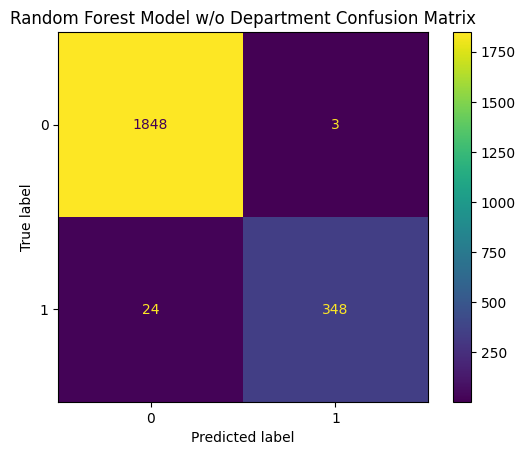

Model  F1 Score    Recall  Precision  Accuracy
0  Random Forest Model w/o Department  0.962656  0.935484   0.991453  0.987854

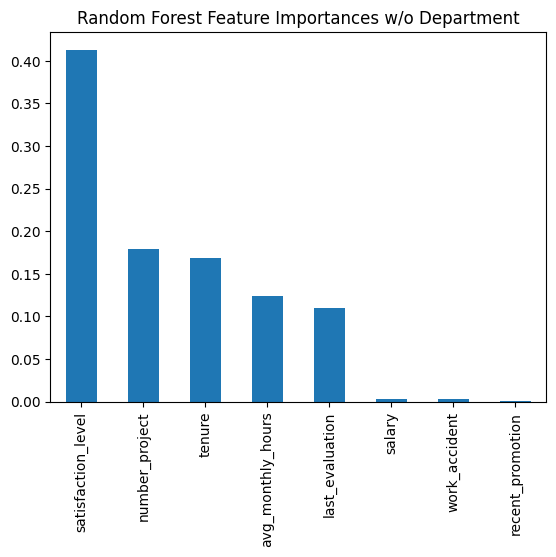

In [129]:
#Random Forest w/o Department Optimal Model
rf_nd_cv_opt = RandomForestClassifier(n_estimators = 100, max_depth = 8, 
                                min_samples_leaf = 1, min_samples_split = 4,
                                max_features= 3, random_state = 42)

rf_nd_cv_opt.fit(X_train, y_train)
y_pred = rf_nd_cv_opt.predict(X_test)

#Random Forest Optimal w/o Department Confusion Matrix
rf_nd_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=rf_nd_cv_opt.classes_)
rf_nd_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=rf_nd_cv_opt_cm, display_labels=rf_nd_cv_opt.classes_)
rf_nd_cv_opt_disp.plot(values_format='')
plt.title('Random Forest Model w/o Department Confusion Matrix')
plt.show()

#Random Forest Feature Importance
random_forest_nd_importances = pd.Series(rf_nd_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Random Forest Feature Importances w/o Department")
random_forest_nd_importances.plot.bar(ax=ax);

#Random Forest w/o Department Results
rf_nd_cv_results = evaluate_model("Random Forest Model w/o Department", rf_nd_cv_opt, X_test, y_test)
rf_nd_cv_table = pd.DataFrame(rf_nd_cv_results)
rf_nd_cv_table

In [130]:
#Instantiating XGB Model w/o Department
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 
 
cv_params = {
                    'max_depth': [5],  # Broader range for tree depth
                    'min_child_weight': [1], # Consider smaller weights for potential complex splits
                    'learning_rate': [0.05],      # Start with a moderate learning rate
                    'n_estimators': [200],       # Keep it manageable for the initial phase
                    'subsample': [0.8],          # Start with a reasonable subsample ratio
                    'colsample_bytree': [0.8],   # Start with a reasonable feature subsample ratio
                    'gamma': [0.1],       # Regularization to control node splitting
                    'reg_alpha': [0.1],      # L1 regularization
                    'reg_lambda': [1]     # L2 regularization

            }

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_nd_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [131]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
xgb_nd_cv.fit(X_train, y_train)
xgb_nd_cv.best_params_

CPU times: total: 11.5 s
Wall time: 1.05 s


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'subsample': 0.8}

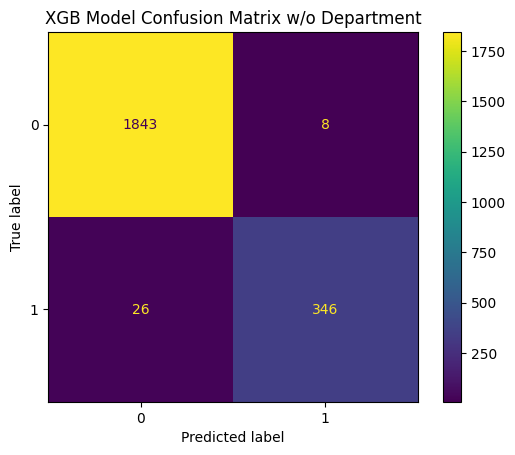

Model  F1 Score    Recall  Precision  Accuracy
0  XGB Model w/o Department  0.953168  0.930108   0.977401  0.984705

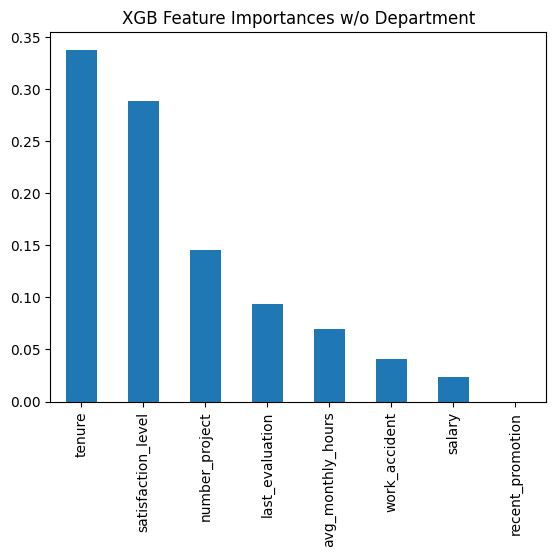

In [132]:
#XGB Optimal Classifier w/o Department
xgb_nd_cv_opt = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, reg_alpha = 1,\
                           max_depth = 5, min_child_weight = 1, n_estimators = 200, subsample = 0.8, gamma = 0.1,\
                           reg_lambda = 1, random_state=42)
xgb_nd_cv_opt.fit(X_train, y_train)
y_pred = xgb_nd_cv_opt.predict(X_test)

#Optimized XGB Model Confusion Matrix
#(This model was the best result that could be derived after multiple attempts.)
xgb_nd_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=xgb_nd_cv_opt.classes_)
xgb_nd_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_nd_cv_opt_cm, display_labels=xgb_nd_cv_opt.classes_)
xgb_nd_cv_opt_disp.plot(values_format='')
plt.title('XGB Model Confusion Matrix w/o Department')
plt.show()

#XGB Feature Importance
xgb_importances = pd.Series(xgb_nd_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("XGB Feature Importances w/o Department")
xgb_importances.plot.bar(ax=ax);

#XGB Model Results
xgb_nd_cv_results = evaluate_model("XGB Model w/o Department", xgb_nd_cv_opt, X_test, y_test)
xgb_nd_cv_table = pd.DataFrame(xgb_nd_cv_results)
xgb_nd_cv_table

In [133]:
# Round 2 Results
Round_2_Table = pd.concat([lrm_clf_nd_table, nbm_nd_table, dt_nd_table, tdtwd_table, rf_nd_cv_table, xgb_nd_cv_table])
Round_2_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0                 Random Forest Model w/o Department  0.962656  0.935484   
1                 Tuned Decision Tree w/o Department  0.960328  0.943548   
2                           XGB Model w/o Department  0.953168  0.930108   
3                       Decision Tree w/o Department  0.930667  0.938172   
4                   Naive Bayes Model w/o Department  0.648715  0.712366   
5  Multiple Logistic Regression Model w/o Department  0.319266  0.233871   

   Precision  Accuracy  
0   0.991453  0.987854  
1   0.977716  0.986955  
2   0.977401  0.984705  
3   0.923280  0.976608  
4   0.595506  0.870895  
5   0.502890  0.833108

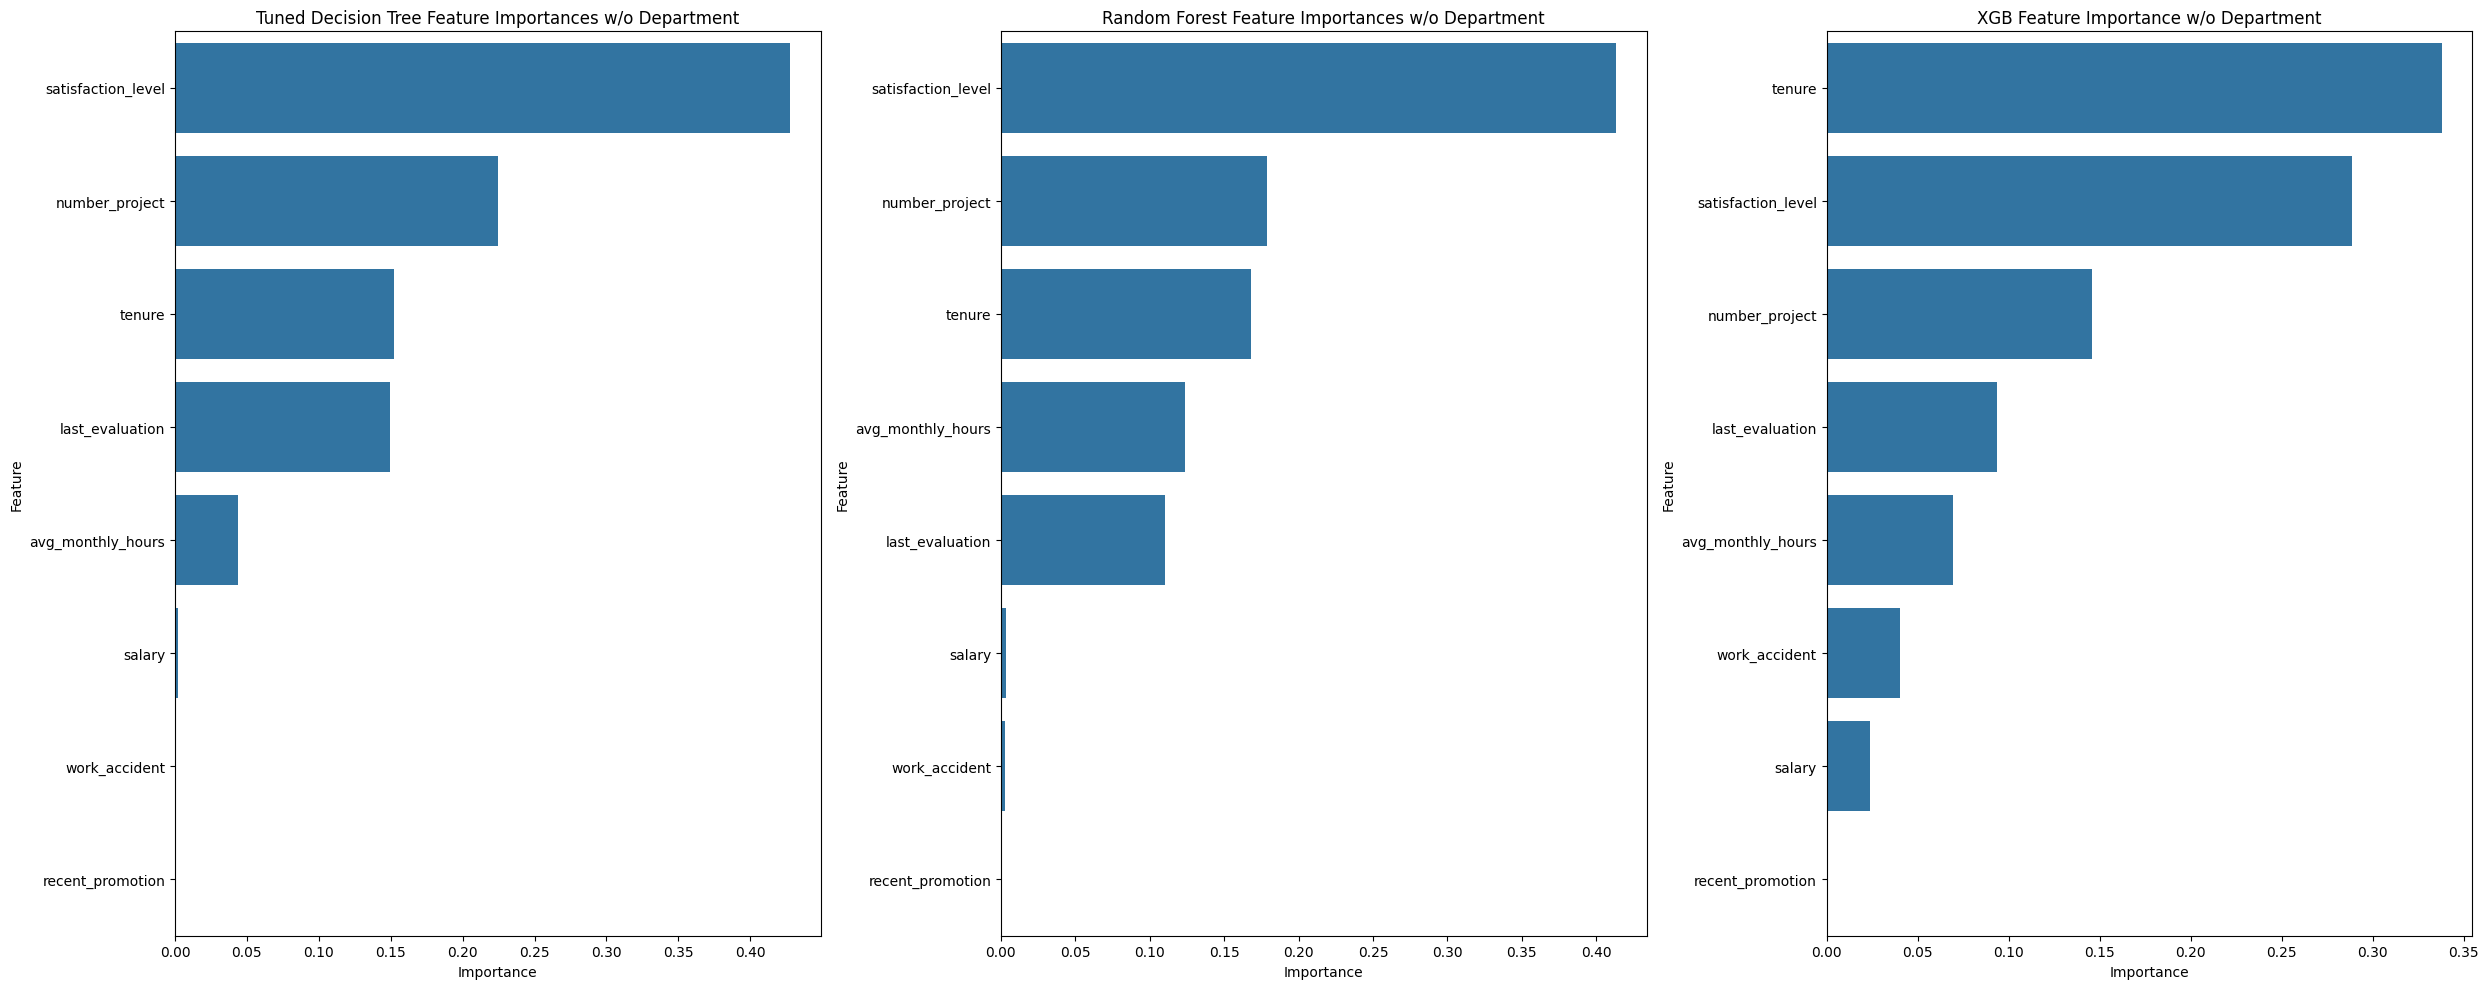

In [134]:
#Feature Importance Charts for Top 3 Models (No Department)
fig, axes = plt.subplots(1, 3, figsize=(25,10))

sns.barplot(x = xgb_importances.values, y = xgb_importances.index, ax=axes[2])
axes[2].set_title("XGB Feature Importance w/o Department")
axes[2].set_xlabel("Importance")
axes[2].set_ylabel("Feature")

sns.barplot(x = random_forest_nd_importances.values, y = random_forest_nd_importances.index, ax=axes[1])
axes[1].set_title("Random Forest Feature Importances w/o Department")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Feature")

sns.barplot(x = tuned_decision_nd_importances.values, y = tuned_decision_nd_importances.index, ax=axes[0])
axes[0].set_title("Tuned Decision Tree Feature Importances w/o Department")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

plt.tight_layout()

In [135]:
# Model Results (Round 1 + Round 2)
Final_Table = pd.concat([Round_1_Table, Round_2_Table])
Final_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0                  Random Forest Model w/o Department  0.962656  0.935484   
1                  Tuned Decision Tree w/o Department  0.960328  0.943548   
2                            XGB Model w/o Department  0.953168  0.930108   
3                        Decision Tree w/o Department  0.930667  0.938172   
4                                 Tuned Decision Tree  0.909091  0.900538   
5                                           XGB Model  0.901218  0.895161   
6                                 Random Forest Model  0.899598  0.903226   
7                                       Decision Tree  0.817961  0.905914   
8                    Naive Bayes Model w/o Department  0.648715  0.712366   
9   Multiple Logistic Regression Model w/o Department  0.319266  0.233871   
10                 Multiple Logistic Regression Model  0.105505  0.061828   
11                                  Naive Bayes Model  0.000000  0.000000   

    Precision  Accuracy  
0    0.991453  0.987854  
1    0.977716  0.986955  
2    0.977401  0.984705  
3    0.923280  0.976608  
4    0.917808  0.969861  
5    0.907357  0.967161  
6    0.896000  0.966262  
7    0.745575  0.932524  
8    0.595506  0.870895  
9    0.502890  0.833108  
10   0.359375  0.824561  
11   0.000000  0.832659

# Round 2 Insights:
- Removing the department variable greatly improved model accuracy across all model types.
    - This supports findings in my EDA and Round 1 results that turnover rates across departments are relatively similar and lack predictive power.
        - Removing 'Department' reduced the dimensionality of the data and, in turn, the noise that reduced predictive power in my models.
--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

# Round 3: 
- An important consideration is that our previous models were excluding outliers in tenure.
    - I excluded these outliers since certain models (MLRM and Naive Bayes) in my previous rounds didn't function well with extreme outliers.
    - However, these outliers provide important context for our data, especially for employees at 6+ years tenure.
- I will now include outliers in subsequent datasets and will discontinue Multiple Logistic Regression and Naive Bayes modeling due to lack of predictive power compared to other models and their sensitivity to outliers.

In [136]:
#Round 3
#Base Data (All-Separated + No Department + Outliers)
df1_no_department_o = df1.copy()
X = df1_no_department_o.drop(columns=['left'], axis=1)
y = df1_no_department_o['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state = 42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Removing Department for Train Set
X_train = X_train.drop(columns = 'department')

#Transforming Test and Champion Test
#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Removing Department for Test Set + Champion
X_test = X_test.drop(columns = 'department')
X_champ_test = X_champ_test.drop(columns = 'department')

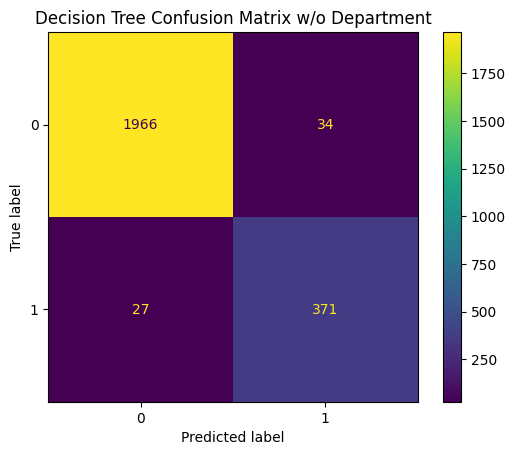

              precision    recall  f1-score   support

      Stayed       0.99      0.98      0.98      2000
        Left       0.92      0.93      0.92       398

    accuracy                           0.97      2398
   macro avg       0.95      0.96      0.95      2398
weighted avg       0.97      0.97      0.97      2398



Model  F1 Score    Recall  Precision  \
0  Decision Tree w/o Department + Outliers  0.924035  0.932161   0.916049   

   Accuracy  
0  0.974562

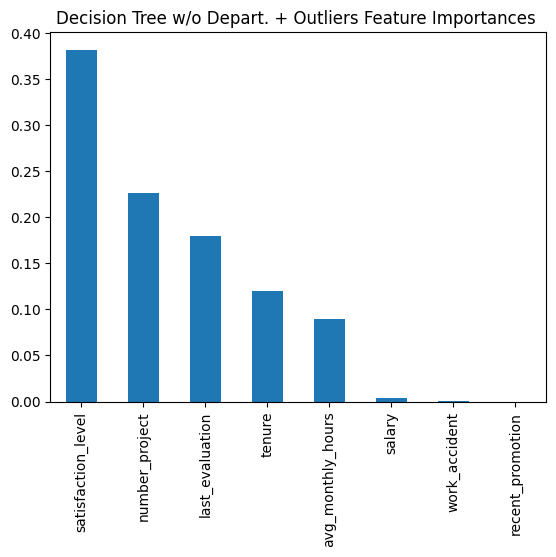

In [137]:
#Decision Tree w/o Department + Outliers   
dtwdo = DecisionTreeClassifier(random_state=42)
dtwdo.fit(X_train, y_train)
y_pred = dtwdo.predict(X_test)   

#Confusion Matrix
dtwdo_cm = confusion_matrix(y_test, y_pred, labels=dtwdo.classes_)
dtwdo_disp = ConfusionMatrixDisplay(confusion_matrix=dtwdo_cm, display_labels=dtwdo.classes_)
dtwdo_disp.plot(values_format='')
plt.title('Decision Tree Confusion Matrix w/o Department')
plt.show()

#Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

#Feature Importance Decision Tree w/o Department + Outliers
dt_ndo_importances = pd.Series(dtwdo.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("Decision Tree w/o Depart. + Outliers Feature Importances ")
dt_ndo_importances.plot.bar(ax=ax);

#Decision Tree Results
dt_ndo_results = evaluate_model("Decision Tree w/o Department + Outliers", dtwdo, X_test, y_test)
dt_ndo_table = pd.DataFrame(dt_ndo_results)
dt_ndo_table

In [138]:
#Tuned Decision Tree w/o Department + Outliers
tree_para = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = ['accuracy', 'precision', 'recall', 'f1']

tdtwdo = DecisionTreeClassifier(random_state=42)

tdtwdo_clf = GridSearchCV(tdtwd, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [139]:
tdtwdo_clf.fit(X_train, y_train)
tdtwdo_clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 4}

In [140]:
tdtwdo_clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 4}

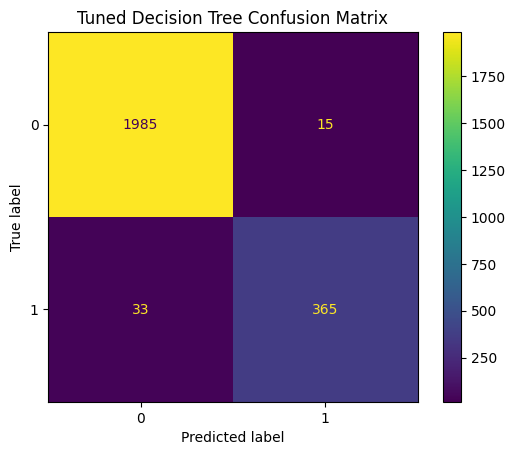

Model  F1 Score    Recall  \
0  Tuned Decision Tree w/o Department + Outliers  0.938303  0.917085   

   Precision  Accuracy  
0   0.960526  0.979983

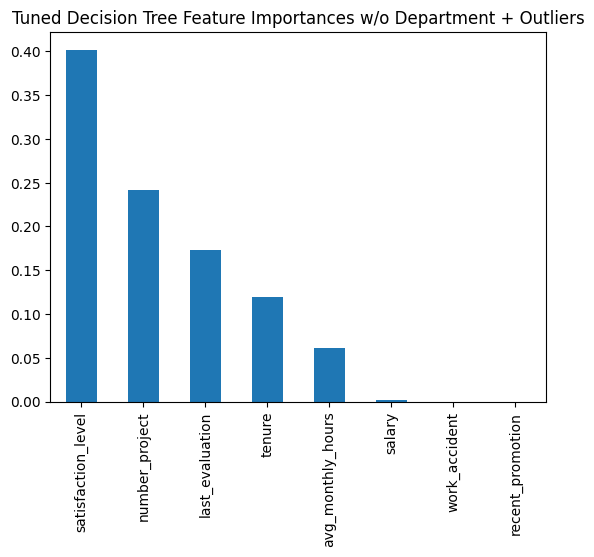

In [141]:
#Optimized Tuned Decision Tree w/o Department + Outliers
tdtwdo_opt = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 4, random_state=42)
tdtwdo_opt.fit(X_train, y_train)

#Tuned Decision Tree Prediction
y_pred = tdtwdo_opt.predict(X_test)

#Optimized Tuned Decision Tree Confusion Matrix
tdtwdo_opt._cm = confusion_matrix(y_test, y_pred, labels=tdtwdo_opt.classes_)
tdtwdo_opt._disp = ConfusionMatrixDisplay(confusion_matrix=tdtwdo_opt._cm, display_labels=tdtwdo_opt.classes_)
tdtwdo_opt._disp.plot(values_format='')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.show()

#Tuned Decision Tree Feature Importance
tuned_decision_ndo_importances = pd.Series(tdtwdo_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Tuned Decision Tree Feature Importances w/o Department + Outliers")
tuned_decision_ndo_importances.plot.bar(ax=ax);

#Tuned Decision Tree Result Table
tdtwdo_results = evaluate_model("Tuned Decision Tree w/o Department + Outliers", tdtwdo_opt, X_test, y_test)
tdtwdo_table = pd.DataFrame(tdtwdo_results)
tdtwdo_table

In [142]:
#Random Forest Model (No Department) + Outliers
rf_ndo = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [2, 3, 4, 5, 10, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_ndo_cv = GridSearchCV(rf_nd, cv_params, scoring=scoring, cv=5, refit='f1')

In [143]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
rf_ndo_cv.fit(X_train, y_train)
rf_ndo_cv.best_params_

CPU times: total: 15min 23s
Wall time: 15min 39s


{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

In [144]:
#Finding the Best Parameters
rf_ndo_cv.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

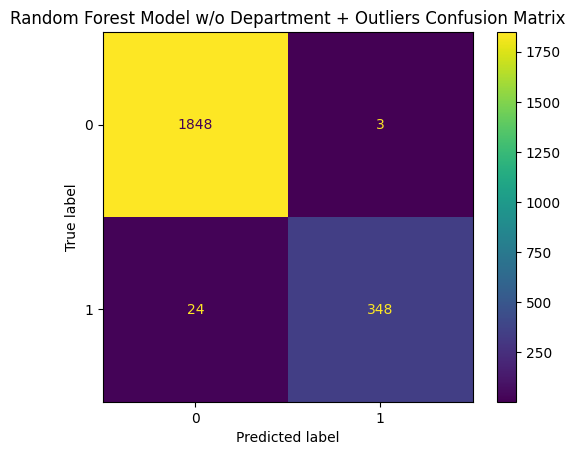

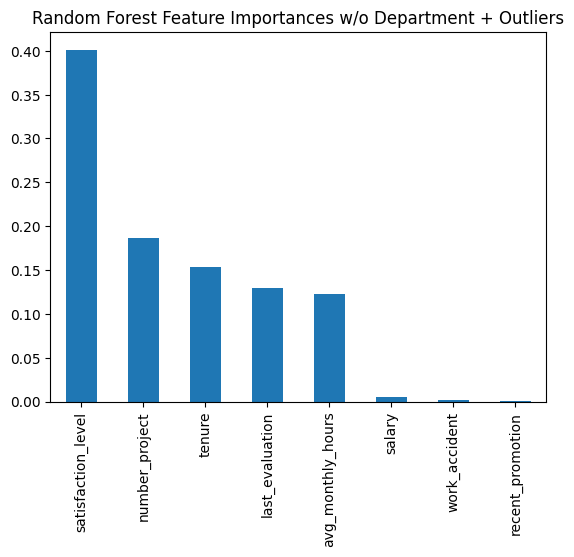

In [145]:
#Random Forest w/o Department + Outliers Optimal Model
rf_ndo_cv_opt = RandomForestClassifier(n_estimators = 125, max_depth = 10, 
                                min_samples_leaf = 1, min_samples_split = 2,
                                max_features= 4, random_state = 42)

rf_ndo_cv_opt.fit(X_train, y_train)
y_pred = rf_ndo_cv_opt.predict(X_test)

#Confusion Matrix
rf_ndo_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=rf_nd_cv_opt.classes_)
rf_ndo_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=rf_nd_cv_opt_cm, display_labels=rf_nd_cv_opt.classes_)
rf_ndo_cv_opt_disp.plot(values_format='')
plt.title('Random Forest Model w/o Department + Outliers Confusion Matrix')
plt.show()

#Random Forest Feature Importance
random_forest_ndo_importances = pd.Series(rf_ndo_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Random Forest Feature Importances w/o Department + Outliers")
random_forest_ndo_importances.plot.bar(ax=ax);

#Random Forest w/o Department + Outliers Results
rf_ndo_cv_results = evaluate_model("Random Forest Model w/o Department + Outliers", rf_nd_cv_opt, X_test, y_test)
rf_ndo_cv_table = pd.DataFrame(rf_ndo_cv_results)

In [146]:
#Instantiating XGB Model w/o Department
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 
 
cv_params = {
                        'max_depth': [8],  # Broader range for tree depth
                        'min_child_weight': [1], # Consider smaller weights for potential complex splits
                        'learning_rate': [0.1],      # Start with a moderate learning rate
                        'n_estimators': [100],       # Keep it manageable for the initial phase
                        'subsample': [0.8],          # Start with a reasonable subsample ratio
                        'colsample_bytree': [0.8],   # Start with a reasonable feature subsample ratio
                        'gamma': [0.2],       # Regularization to control node splitting
                        'reg_alpha': [0, 0.1, 0.5, 1],      # L1 regularization
                        'reg_lambda': [1, 0.1, 0.5, 1]     # L2 regularization

            }

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_ndo_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [147]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
xgb_ndo_cv.fit(X_train, y_train)
xgb_ndo_cv.best_params_

CPU times: total: 1min 41s
Wall time: 7.8 s


{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

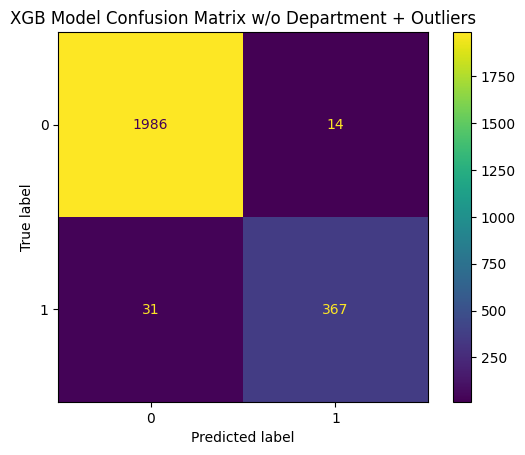

Model  F1 Score    Recall  Precision  \
0  XGB Model w/o Department + Outliers  0.942234  0.922111   0.963255   

   Accuracy  
0  0.981234

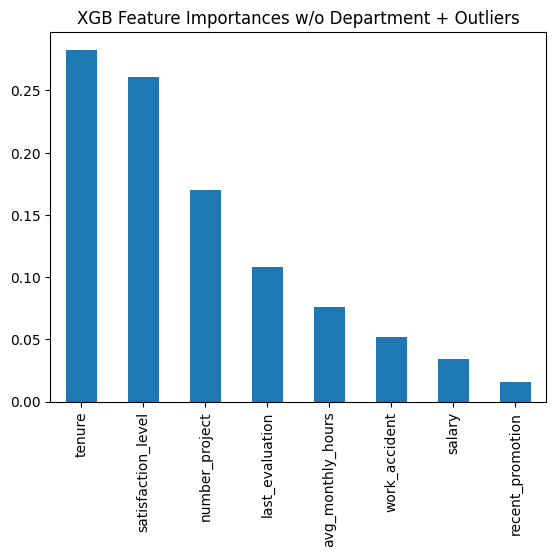

In [148]:
#XGB Optimal Classifier w/o Department + Outliers
xgb_ndo_cv_opt = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, reg_alpha = 0,\
                           max_depth = 5, min_child_weight = 1, n_estimators = 200, subsample = 0.8, gamma = 0.1,\
                           reg_lambda = 1, random_state=42)
xgb_ndo_cv_opt.fit(X_train, y_train)
y_pred = xgb_ndo_cv_opt.predict(X_test)

#Optimized XGB Model Confusion Matrix
#(This model was the best result that could be derived after multiple attempts.)
xgb_ndo_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=xgb_ndo_cv_opt.classes_)
xgb_ndo_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_ndo_cv_opt_cm, display_labels=xgb_ndo_cv_opt.classes_)
xgb_ndo_cv_opt_disp.plot(values_format='')
plt.title('XGB Model Confusion Matrix w/o Department + Outliers')
plt.show()

#XGB Feature Importance
xgb_ndo_importances = pd.Series(xgb_ndo_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("XGB Feature Importances w/o Department + Outliers")
xgb_ndo_importances.plot.bar(ax=ax);

#XGB Model Results
xgb_ndo_cv_results = evaluate_model("XGB Model w/o Department + Outliers", xgb_ndo_cv_opt, X_test, y_test)
xgb_ndo_cv_table = pd.DataFrame(xgb_ndo_cv_results)
xgb_ndo_cv_table

In [149]:
#Round 3 Model Results (No Department+Outlier)
Round_3_Table = pd.concat([dt_ndo_table, tdtwdo_table, rf_ndo_cv_table, xgb_ndo_cv_table])
Round_3_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0  Random Forest Model w/o Department + Outliers  0.951157  0.929648   
1            XGB Model w/o Department + Outliers  0.942234  0.922111   
2  Tuned Decision Tree w/o Department + Outliers  0.938303  0.917085   
3        Decision Tree w/o Department + Outliers  0.924035  0.932161   

   Precision  Accuracy  
0   0.973684  0.984153  
1   0.963255  0.981234  
2   0.960526  0.979983  
3   0.916049  0.974562

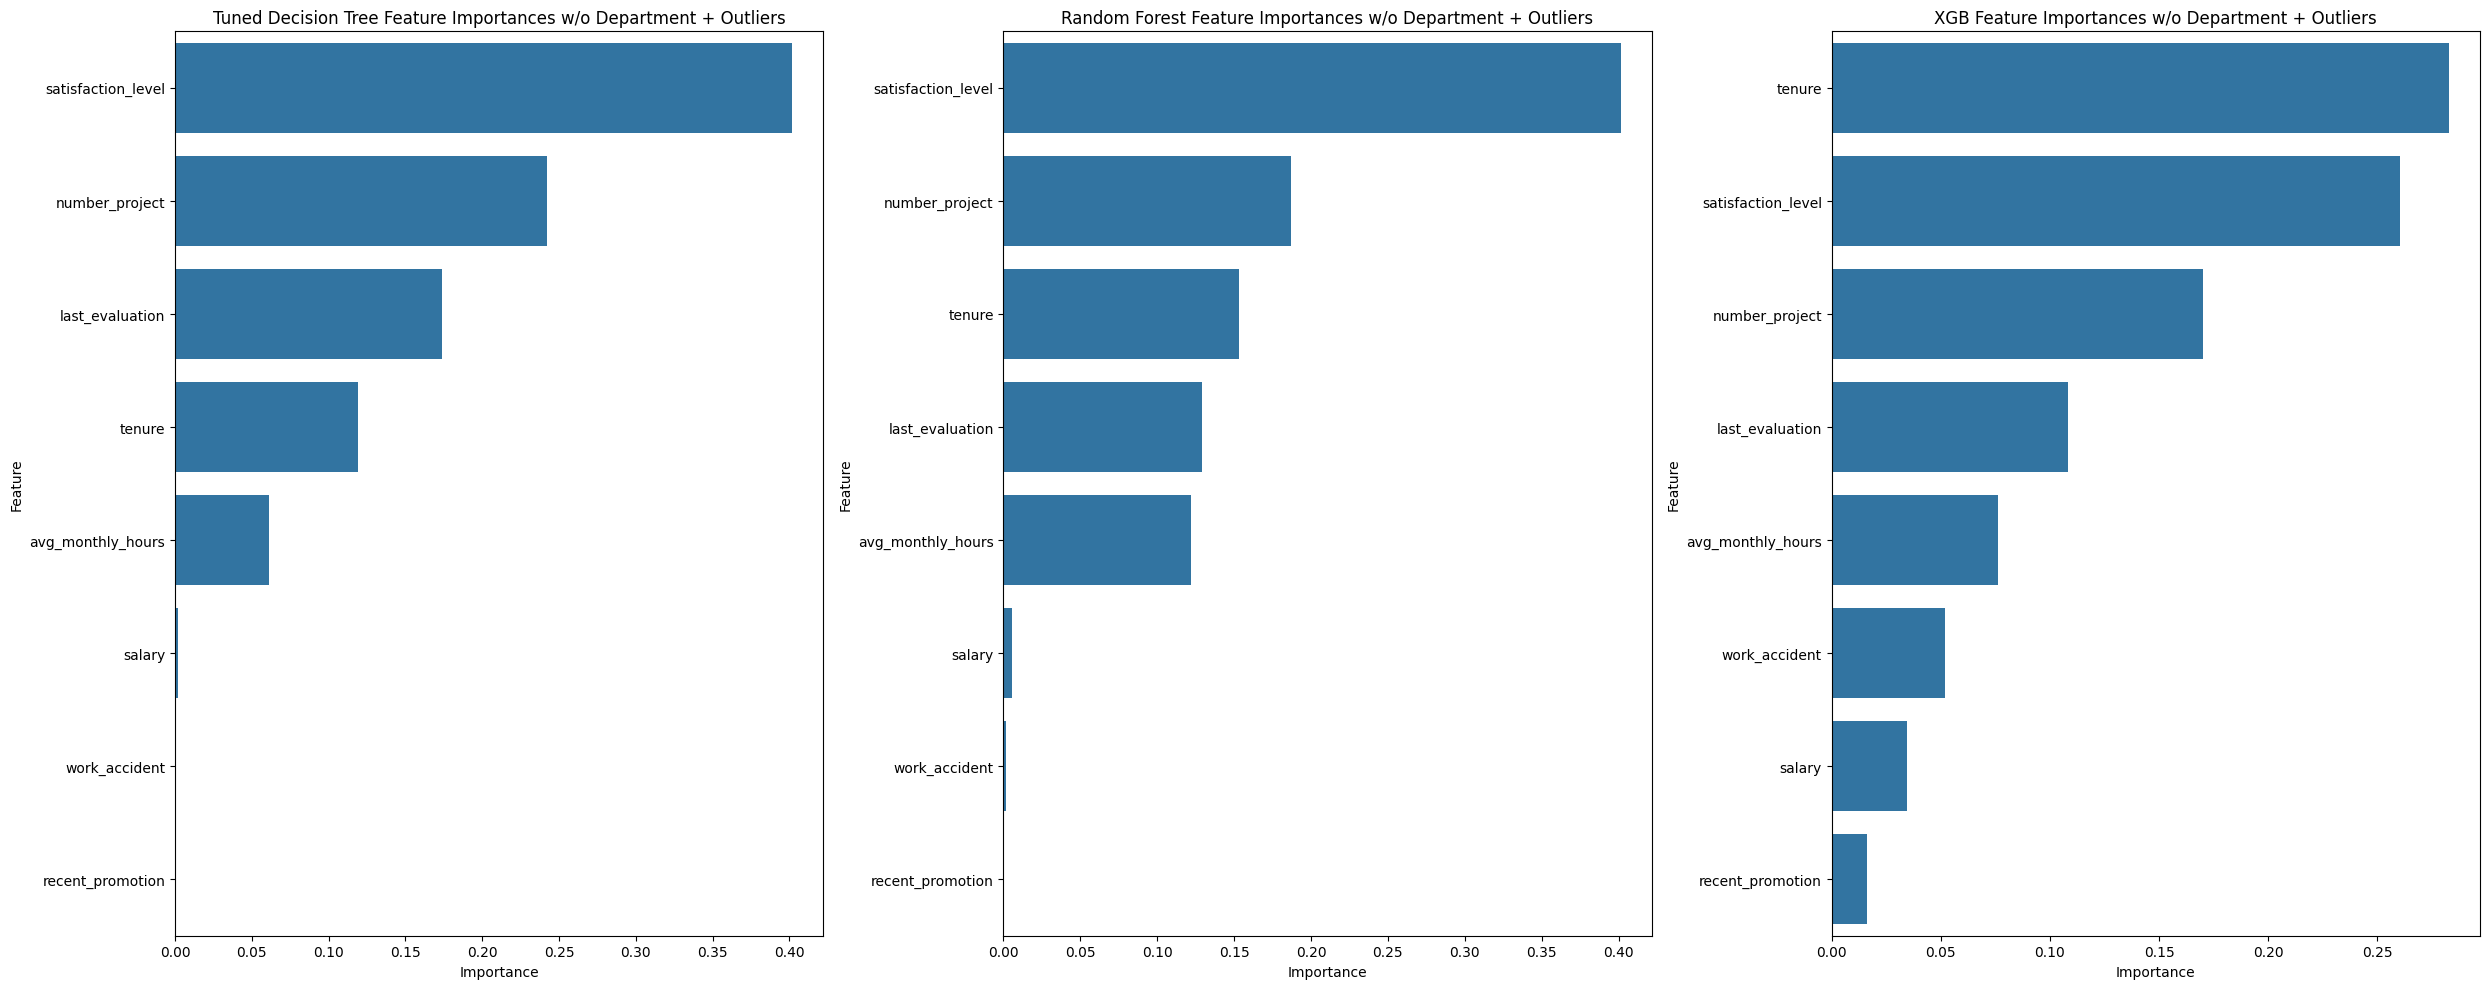

In [150]:
#Feature Importance Charts for Top 3 Models (No Department + Outliers)
fig, axes = plt.subplots(1, 3, figsize=(25,10))

sns.barplot(x = xgb_ndo_importances.values, y = xgb_ndo_importances.index, ax=axes[2])
axes[2].set_title("XGB Feature Importances w/o Department + Outliers")
axes[2].set_xlabel("Importance")
axes[2].set_ylabel("Feature")

sns.barplot(x = random_forest_ndo_importances.values, y = random_forest_ndo_importances.index, ax=axes[1])
axes[1].set_title("Random Forest Feature Importances w/o Department + Outliers")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Feature")

sns.barplot(x = tuned_decision_ndo_importances.values, y = tuned_decision_ndo_importances.index, ax=axes[0])
axes[0].set_title("Tuned Decision Tree Feature Importances w/o Department + Outliers")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

plt.tight_layout()


In [151]:
#Final Results (+Round 3)
Final_Table = pd.concat([Round_1_Table, Round_2_Table, Round_3_Table])
Final_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0                  Random Forest Model w/o Department  0.962656  0.935484   
1                  Tuned Decision Tree w/o Department  0.960328  0.943548   
2                            XGB Model w/o Department  0.953168  0.930108   
3       Random Forest Model w/o Department + Outliers  0.951157  0.929648   
4                 XGB Model w/o Department + Outliers  0.942234  0.922111   
5       Tuned Decision Tree w/o Department + Outliers  0.938303  0.917085   
6                        Decision Tree w/o Department  0.930667  0.938172   
7             Decision Tree w/o Department + Outliers  0.924035  0.932161   
8                                 Tuned Decision Tree  0.909091  0.900538   
9                                           XGB Model  0.901218  0.895161   
10                                Random Forest Model  0.899598  0.903226   
11                                      Decision Tree  0.817961  0.905914   
12                   Naive Bayes Model w/o Department  0.648715  0.712366   
13  Multiple Logistic Regression Model w/o Department  0.319266  0.233871   
14                 Multiple Logistic Regression Model  0.105505  0.061828   
15                                  Naive Bayes Model  0.000000  0.000000   

    Precision  Accuracy  
0    0.991453  0.987854  
1    0.977716  0.986955  
2    0.977401  0.984705  
3    0.973684  0.984153  
4    0.963255  0.981234  
5    0.960526  0.979983  
6    0.923280  0.976608  
7    0.916049  0.974562  
8    0.917808  0.969861  
9    0.907357  0.967161  
10   0.896000  0.966262  
11   0.745575  0.932524  
12   0.595506  0.870895  
13   0.502890  0.833108  
14   0.359375  0.824561  
15   0.000000  0.832659

# Round 3 Insights: 
- Including outliers resulted in less than a 1-2 % decrease in performance across all models.
    - Since including outliers resulted in only a slight reduction in predictive power and they add more context and realism in our models, we will include outliers in all further rounds.
- We now have a series of very well performing models in the +90% range.
    - We are close to choosing a champion model; however, model performance is only one factor.
- Usability and interpretability are major considerations when developing the model.
    - In other words, our model may be accurate, but it's limited in what we could do with it.
- Based on the latest models in Round 3, it may be a good idea to drop 'Satisfaction Level' despite it being the highest influencer in our latest Tuned Decision Tree and Random Forest Model.
    - As mentioned in the Final Insights EDA: section, data integrity comes into question as employees might not be providing accurate assessments because of factors such as fear of retaliation or refusing to answer honestly.
        - Usage of satisfaction levels as an actionable insight is less useful as a controllable metric.
            - "How would you increase satisfaction levels?" is a very diverse and open-ended question and is likely deviating from the goal of this project: predicting and preventing employee turnover.
- Feature engineering average monthly hours may be a good idea.
    - From previous EDA, we notice employees leave at two extremes:
        1. Between 125 average monthly hours (30 hours per week + Vacation) and 167 average monthly hours (40 hours per week + Vacation).
            - These are likely employees that are underutilized (actionable insight), but many may also be reducing hours if they already decided to quit (actionable insight) or are being prepared by management to be offboarded (actionable insight - may need to look at termination data and practices).
                - Will need additional data if deemed to be a good predictor feature.
        2. At an exponentially increasing rate (relative to total number of employees) above 216.67 average monthly hours (~52 hours per week + Vacation).
            - These are likely overworked and burned out employees (actionable insight).
    - Converting the average monthly hours variable to these types of feature engineered variables allows us to easily identify employees who are likely to turnover.

# Round 4:
- To create more actionable features in the next round:
    - Satisfaction level will be dropped.
    - Average Monthly Hours will be dropped and replaced with:
        - **Underutilized** variable for employees working under 167 average monthly hours (~40 hours per week + Vacation).
        - **Overworked** variable for employees working more than 200 average monthly hours (~48 hours per week + Vacation).
            - I choose 200 average monthly hours (~48 hours per week + vacation) rather than 216.67 for two reasons:
                1. Many peer-reviewed research studies suggest that working beyond 49 hours drastically reduces productivity among workers.
                    - Not only are we not getting the maximum productivity among workers who work above 49 hours, but we also increase their likelihood to burnout and turnover.
                    - Setting it to 200 average monthly hours allows us to proactively capture a larger group of employees who are likely to turnover sooner.
                2. Setting the threshold at 216.67 average monthly hours may encourage managers to put undue pressure on our high performing and more tenured employees to be more productive within a shorter hourly timeframe and/or add work to employees already meeting quota.
                    - A 200-hour threshold encourages a broader focus on workload distribution and would shift focus towards issues with our underutilized employees.
            - The only downside would be a potential reduction in predictive power of the model since the threshold value was found to be around 216.67.      

In [231]:
#Round 4
#Base Data (All-Separated + No Department and Satisfaction Level + Feature Engineered Variables and Outliers)
df1_fe = df1.copy()
X = df1_fe.drop(columns=['left'], axis=1)
y = df1_fe['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state = 42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Feature Engineering UnderUtilized and Overworked For Training Data
X_train['overworked'] = (X_train['avg_monthly_hours'] > 200).astype(int)
X_train['underutilized'] = (X_train['avg_monthly_hours'] < 167).astype(int)

#Removing Satisfaction Levels + Department for Train Set
X_train = X_train.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours'])

#Transforming Test and Champion Test

#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Feature Engineering UnderUtilized and Overworked For Test and Champion Test
X_test['overworked'] = (X_test['avg_monthly_hours'] > 200).astype(int)
X_test['underutilized'] = (X_test['avg_monthly_hours'] < 167).astype(int)
X_champ_test['overworked'] = (X_champ_test['avg_monthly_hours'] > 200).astype(int)
X_champ_test['underutilized'] = (X_champ_test['avg_monthly_hours'] < 167).astype(int)

#Removing Satisfaction Levels + Department for Test Set
X_test = X_test.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours'])

#Removing Satisfaction Levels + Department for Champion Set
X_champ_test = X_champ_test.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours'])

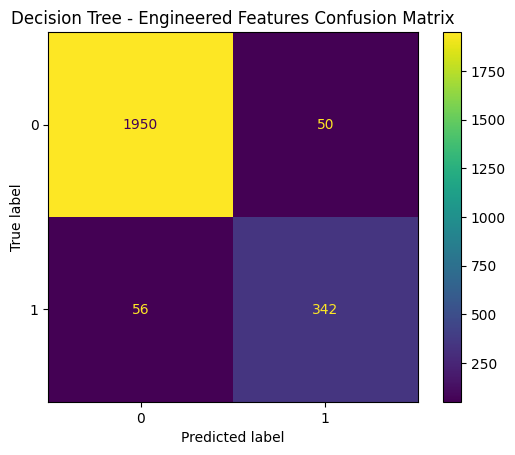

              precision    recall  f1-score   support

      Stayed       0.97      0.97      0.97      2000
        Left       0.87      0.86      0.87       398

    accuracy                           0.96      2398
   macro avg       0.92      0.92      0.92      2398
weighted avg       0.96      0.96      0.96      2398



Model  F1 Score    Recall  Precision  \
0  Decision Tree - Engineered Features  0.865823  0.859296   0.872449   

   Accuracy  
0  0.955796

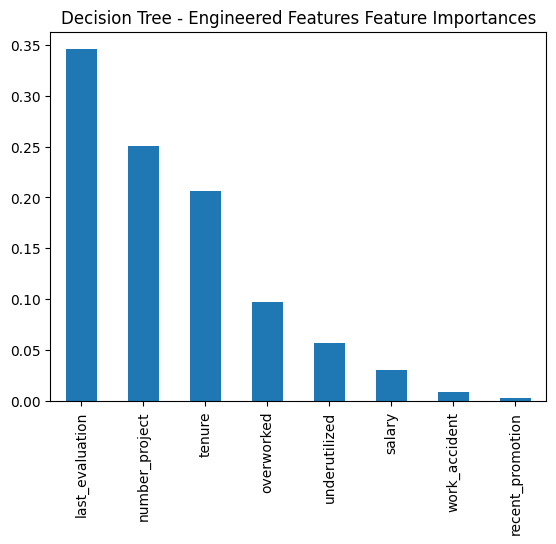

In [225]:
#Decision Tree w/o Department - Engineered Features and Outliers
dt_ndsfo = DecisionTreeClassifier(random_state=42)
dt_ndsfo.fit(X_train, y_train)
y_pred = dt_ndsfo.predict(X_test)   

#Decision Tree - Engineered Features Confusion Matrix
dt_ndsfo_cm = confusion_matrix(y_test, y_pred, labels=dt_ndsfo.classes_)
dt_ndsfo_disp = ConfusionMatrixDisplay(confusion_matrix=dt_ndsfo_cm, display_labels=dt_ndsfo.classes_)
dt_ndsfo_disp.plot(values_format='')
plt.title('Decision Tree - Engineered Features Confusion Matrix')
plt.show()

#Decision Tree - Engineered Features Classification Report
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_pred, target_names=target_names))

#Feature Importance Decision Tree - Engineered Features
dt_ndsfo_importances = pd.Series(dt_ndsfo.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("Decision Tree - Engineered Features Feature Importances")
dt_ndsfo_importances.plot.bar(ax=ax);

#Decision Tree - Engineered Features Results
dt_ndsfo_results = evaluate_model("Decision Tree - Engineered Features", dt_ndsfo, X_test, y_test)
dt_ndsfo_table = pd.DataFrame(dt_ndsfo_results)
dt_ndsfo_table


In [226]:
#Tuned Decision Tree Engineered Features
tree_para = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = ['accuracy', 'precision', 'recall', 'f1']

tdt_ndsfo = DecisionTreeClassifier(random_state=42)

tdt_ndsfo_clf = GridSearchCV(tdt_ndsfo, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

tdt_ndsfo_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [227]:
tdt_ndsfo_clf.best_params_

{'max_depth': 12, 'min_samples_leaf': 7}

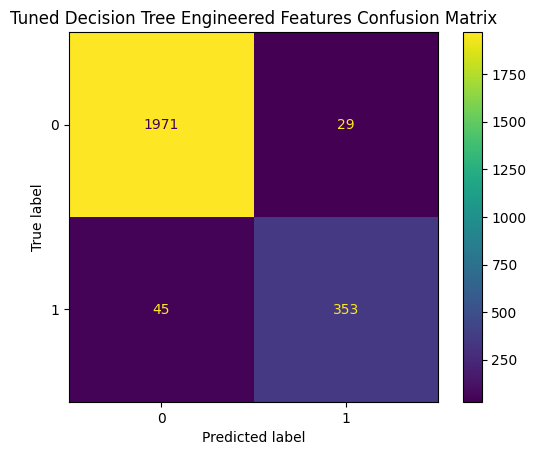

Model  F1 Score    Recall  Precision  \
0  Tuned Decision Tree Engineered Features  0.905128  0.886935   0.924084   

   Accuracy  
0  0.969141

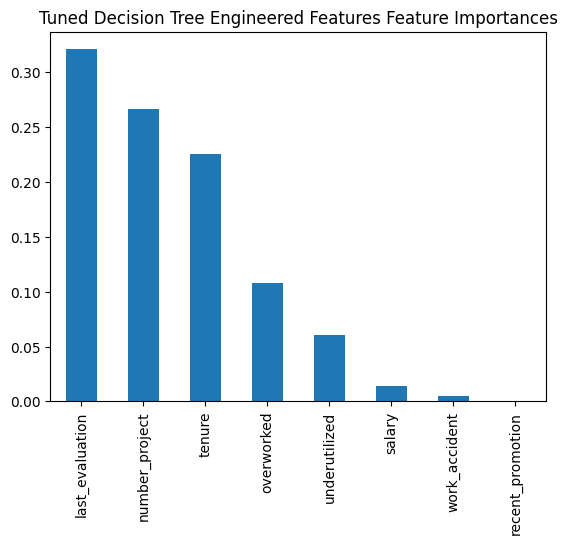

In [228]:
#Optimized Tuned Decision Tree Engineered Features  
tdt_ndsfo_opt = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 7, random_state=42)
tdt_ndsfo_opt.fit(X_train, y_train)

#Tuned Decision Tree Engineered Features Prediction 
y_pred = tdt_ndsfo_opt.predict(X_test)

#Optimized Tuned Decision Tree Confusion Matrix
tdt_ndsfo_opt._cm = confusion_matrix(y_test, y_pred, labels=tdt_ndsfo_opt.classes_)
tdt_ndsfo_opt._disp = ConfusionMatrixDisplay(confusion_matrix=tdt_ndsfo_opt._cm, display_labels=tdt_ndsfo_opt.classes_)
tdt_ndsfo_opt._disp.plot(values_format='')
plt.title('Tuned Decision Tree Engineered Features Confusion Matrix')
plt.show()

#Tuned Decision Tree Feature Importance
tuned_decision_ndsfo_importances = pd.Series(tdt_ndsfo_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Tuned Decision Tree Engineered Features Feature Importances")
tuned_decision_ndsfo_importances.plot.bar(ax=ax);

#Tuned Decision Tree Engineered Features Result Table
tdt_ndsfo_opt_results = evaluate_model("Tuned Decision Tree Engineered Features", tdt_ndsfo_opt, X_test, y_test)
tdt_ndsfo_table = pd.DataFrame(tdt_ndsfo_opt_results)
tdt_ndsfo_table

In [232]:
#Random Forest Model - Engineered Features
rf_ndsfo = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [6, 7, 8, 9, 10, 14], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_ndsfo_cv = GridSearchCV(rf_ndsfo, cv_params, scoring=scoring, cv=5, refit='f1')

In [233]:
%time
#Run only if necessary.
rf_ndsfo_cv.fit(X_train, y_train)
rf_ndsfo_cv.best_params_

CPU times: total: 0 ns
Wall time: 3.1 μs


{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

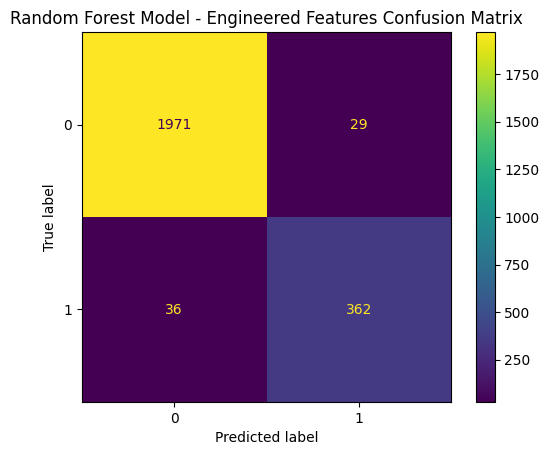

Model  F1 Score    Recall  Precision  \
0  Random Forest Model - Engineered Features  0.917617  0.909548   0.925831   

   Accuracy  
0  0.972894

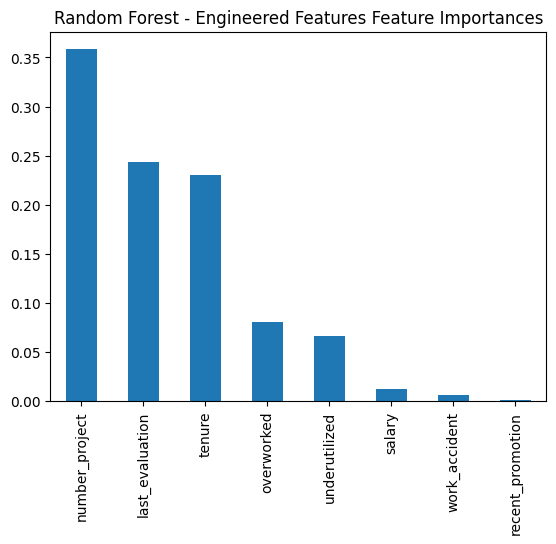

In [234]:
#Random Forest Engineered Features Optimal Model
rf_ndsfo_cv_opt = RandomForestClassifier(n_estimators = 100, max_depth = 8, 
                                min_samples_leaf = 1, min_samples_split = 3,
                                max_features = 4, random_state = 42)
rf_ndsfo_cv_opt.fit(X_train, y_train)
y_pred = rf_ndsfo_cv_opt.predict(X_test)

#Random Forest Optimal Engineered Features Confusion Matrix
rf_ndsfo_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=rf_ndsfo_cv_opt.classes_)
rf_ndsfo_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=rf_ndsfo_cv_opt_cm, display_labels=rf_ndsfo_cv_opt.classes_)
rf_ndsfo_cv_opt_disp.plot(values_format='')
plt.title('Random Forest Model - Engineered Features Confusion Matrix')
plt.show()

#Random Forest Engineered Features Feature Importance
random_forest_ndsfo_importances = pd.Series(rf_ndsfo_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Random Forest - Engineered Features Feature Importances")
random_forest_ndsfo_importances.plot.bar(ax=ax);

#Random Forest Engineered Features Department Results
rf_ndsfo_results = evaluate_model("Random Forest Model - Engineered Features", rf_ndsfo_cv_opt, X_test, y_test)
rf_ndsfo_table = pd.DataFrame(rf_ndsfo_results)
rf_ndsfo_table

In [235]:
#Instantiating XGB Model Engineered Features
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 
 
cv_params = {
                    'max_depth': [8],  # Broader range for tree depth
                    'min_child_weight': [1], # Consider smaller weights for potential complex splits
                    'learning_rate': [0.1],      # Start with a moderate learning rate
                    'n_estimators': [100],       # Keep it manageable for the initial phase
                    'subsample': [0.8],          # Start with a reasonable subsample ratio
                    'colsample_bytree': [0.8],   # Start with a reasonable feature subsample ratio
                    'gamma': [0.1],       # Regularization to control node splitting
                    'reg_alpha': [0],      # L1 regularization
                    'reg_lambda': [1]     # L2 regularization
            }

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_ndof_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [236]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
#Fitting XGB Model Engineered Features
xgb_ndof_cv.fit(X_train, y_train)
xgb_ndof_cv.best_params_

CPU times: total: 7.3 s
Wall time: 508 ms


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

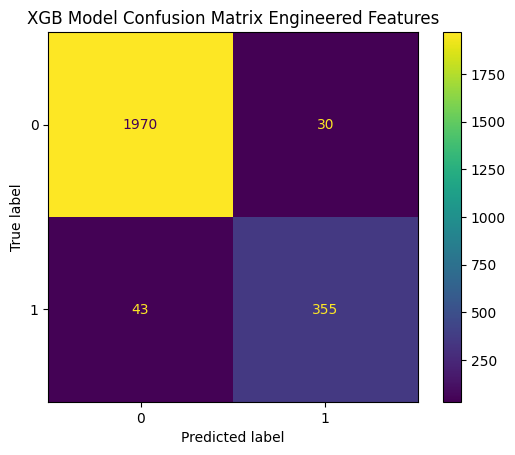

Model  F1 Score   Recall  Precision  Accuracy
0  XGB Model Engineered Features  0.906769  0.89196   0.922078  0.969558

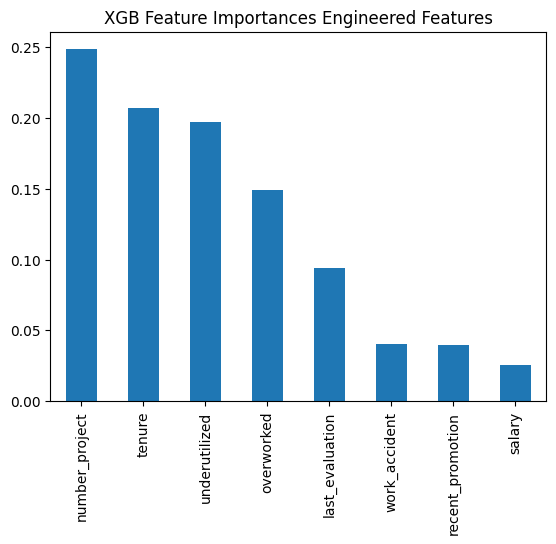

In [237]:
#XGB Optimal Classifier Engineered Features
xgb_ndof_opt = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, reg_alpha = 0,\
                           max_depth = 8, min_child_weight = 1, n_estimators = 100, subsample = 0.8, gamma = 0.1,\
                           reg_lambda = 1, random_state=42)
xgb_ndof_opt.fit(X_train, y_train)
y_pred = xgb_ndof_opt.predict(X_test)

#Optimized XGB Model Engineered Features Confusion Matrix
xgb_ndof_opt_cm = confusion_matrix(y_test, y_pred, labels=xgb_ndof_opt.classes_)
xgb_ndof_opt_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_ndof_opt_cm, display_labels=xgb_ndof_opt.classes_)
xgb_ndof_opt_disp.plot(values_format='')
plt.title('XGB Model Confusion Matrix Engineered Features')
plt.show()

#XGB Feature Importance Engineered Features
xgb_ndof_importances = pd.Series(xgb_ndof_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("XGB Feature Importances Engineered Features")
xgb_ndof_importances.plot.bar(ax=ax);

#XGB Model Engineered Features Results
xgb_ndof_results = evaluate_model("XGB Model Engineered Features", xgb_ndof_opt, X_test, y_test)
xgb_ndof_table = pd.DataFrame(xgb_ndof_results)
xgb_ndof_table


In [238]:
#Round 4 Model Results (Engineered Features)

Round_4_Table = pd.concat([dt_ndsfo_table, tdt_ndsfo_table, rf_ndsfo_table, xgb_ndof_table])
Round_4_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  Precision  \
0  Random Forest Model - Engineered Features  0.917617  0.909548   0.925831   
1              XGB Model Engineered Features  0.906769  0.891960   0.922078   
2    Tuned Decision Tree Engineered Features  0.905128  0.886935   0.924084   
3        Decision Tree - Engineered Features  0.865823  0.859296   0.872449   

   Accuracy  
0  0.972894  
1  0.969558  
2  0.969141  
3  0.955796

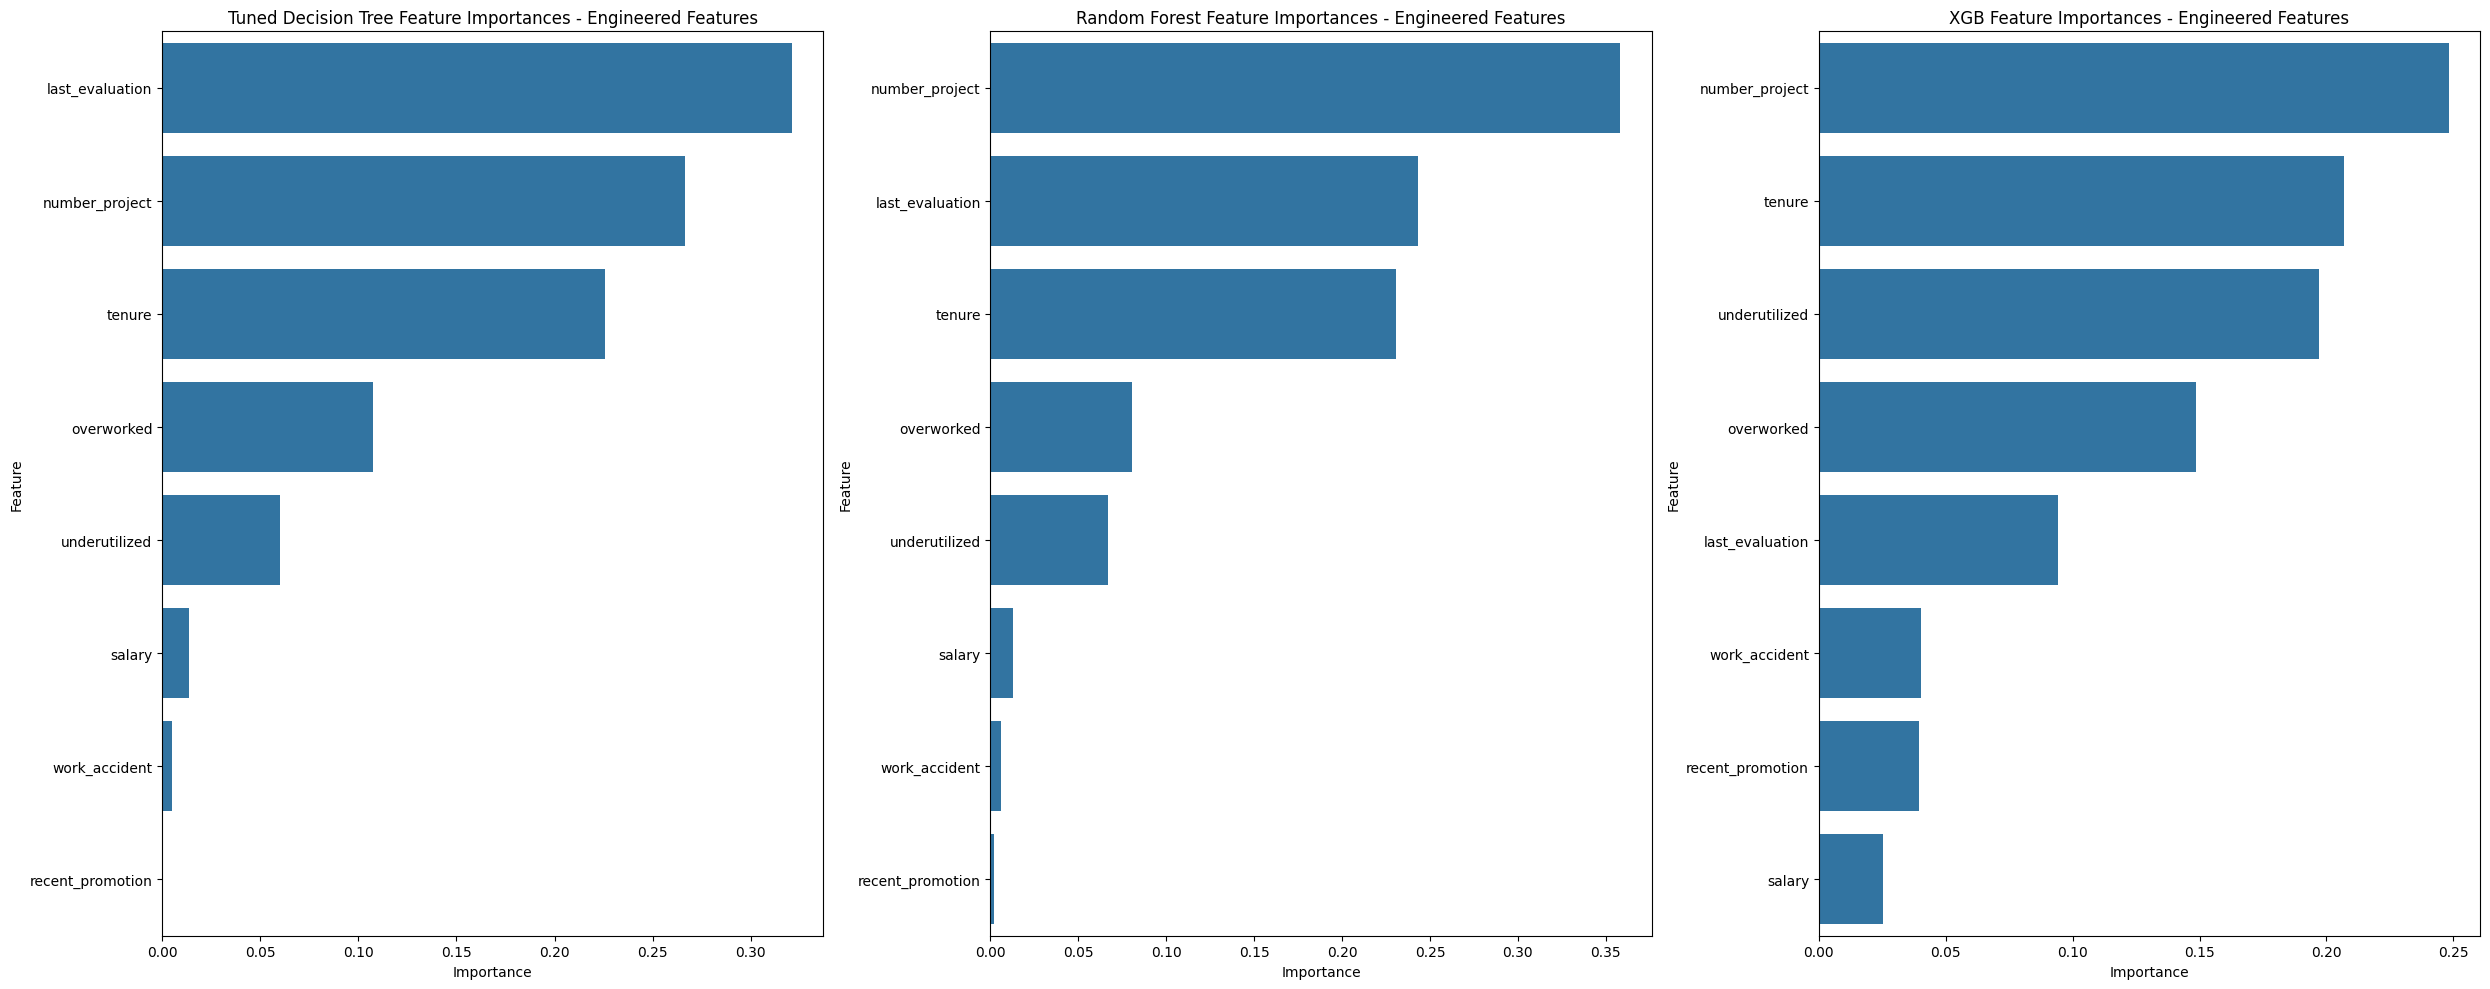

In [239]:
#Feature Importance Charts for Top 3 Models (Engineered Features)
fig, axes = plt.subplots(1, 3, figsize=(25,10))

sns.barplot(x = xgb_ndof_importances.values, y = xgb_ndof_importances.index, ax=axes[2])
axes[2].set_title("XGB Feature Importances - Engineered Features")
axes[2].set_xlabel("Importance")
axes[2].set_ylabel("Feature")

sns.barplot(x = random_forest_ndsfo_importances.values, y = random_forest_ndsfo_importances.index, ax=axes[1])
axes[1].set_title("Random Forest Feature Importances - Engineered Features")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Feature")

sns.barplot(x = tuned_decision_ndsfo_importances.values, y = tuned_decision_ndsfo_importances.index, ax=axes[0])
axes[0].set_title("Tuned Decision Tree Feature Importances - Engineered Features")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

plt.tight_layout()

In [240]:
# Final Results (+Round 4)
Final_Table = pd.concat([Round_1_Table, Round_2_Table, Round_3_Table, Round_4_Table])
Final_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0                  Random Forest Model w/o Department  0.962656  0.935484   
1                  Tuned Decision Tree w/o Department  0.960328  0.943548   
2                            XGB Model w/o Department  0.953168  0.930108   
3       Random Forest Model w/o Department + Outliers  0.951157  0.929648   
4                 XGB Model w/o Department + Outliers  0.942234  0.922111   
5       Tuned Decision Tree w/o Department + Outliers  0.938303  0.917085   
6                        Decision Tree w/o Department  0.930667  0.938172   
7             Decision Tree w/o Department + Outliers  0.924035  0.932161   
8           Random Forest Model - Engineered Features  0.917617  0.909548   
9                                 Tuned Decision Tree  0.909091  0.900538   
10                      XGB Model Engineered Features  0.906769  0.891960   
11            Tuned Decision Tree Engineered Features  0.905128  0.886935   
12                                          XGB Model  0.901218  0.895161   
13                                Random Forest Model  0.899598  0.903226   
14                Decision Tree - Engineered Features  0.865823  0.859296   
15                                      Decision Tree  0.817961  0.905914   
16                   Naive Bayes Model w/o Department  0.648715  0.712366   
17  Multiple Logistic Regression Model w/o Department  0.319266  0.233871   
18                 Multiple Logistic Regression Model  0.105505  0.061828   
19                                  Naive Bayes Model  0.000000  0.000000   

    Precision  Accuracy  
0    0.991453  0.987854  
1    0.977716  0.986955  
2    0.977401  0.984705  
3    0.973684  0.984153  
4    0.963255  0.981234  
5    0.960526  0.979983  
6    0.923280  0.976608  
7    0.916049  0.974562  
8    0.925831  0.972894  
9    0.917808  0.969861  
10   0.922078  0.969558  
11   0.924084  0.969141  
12   0.907357  0.967161  
13   0.896000  0.966262  
14   0.872449  0.955796  
15   0.745575  0.932524  
16   0.595506  0.870895  
17   0.502890  0.833108  
18   0.359375  0.824561  
19   0.000000  0.832659

# Round 4 Insights:
- When removing satisfaction level and feature engineering average monthly hours, we get a series of models that have accurate predictive power ~90% and have more easily interpretable features such as *number of projects, underutilized, overworked, last evaluation scores, and salary*.
- However, there is one variable that is still not as actionable: 'Tenure'.
    - It had very high predictive power in the latest round of our top 3 models, ranking 2nd or 3rd in each of those model's feature importances.
    - Regardless, we can't control how long a person works here; we can only improve the work conditions and environment that they're in to encourage them to stay.
--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

# Round 5:
- We'll perform a final round of modeling where we will remove tenure to see if we can safely remove it without compromising predictive power.
    - We removed and transformed a lot of features already, so predictive power might go down drastically.

In [241]:
#Round 5
#Base Data (All-Separated + No Department, Satisfaction Level, and Tenure + Feature Engineered Variables and Outliers)
df1_finale = df1.copy()
X = df1_finale.drop(columns=['left'], axis=1)
y = df1_finale['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state = 42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Feature Engineering Underutilized and Overworked For Training Data
X_train['overworked'] = (X_train['avg_monthly_hours'] > 200).astype(int)
X_train['underutilized'] = (X_train['avg_monthly_hours'] < 167).astype(int)

#Removing Satisfaction Levels, Tenure, Department, Average Monthly Hours for Train Set
X_train = X_train.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours', 'tenure'])

#Transforming Test and Champion Test

#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Feature Engineering underutilized and Overworked For Test and Champion Test
X_test['overworked'] = (X_test['avg_monthly_hours'] > 200).astype(int)
X_test['underutilized'] = (X_test['avg_monthly_hours'] < 167).astype(int)
X_champ_test['overworked'] = (X_champ_test['avg_monthly_hours'] > 200).astype(int)
X_champ_test['underutilized'] = (X_champ_test['avg_monthly_hours'] < 167).astype(int)

#Removing Satisfaction Levels, Tenure, Department, Average Monthly Hours for Test Set
X_test = X_test.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours', 'tenure'])

#Removing Satisfaction Levels, Tenure, Department, Average Monthly Hours for Champion Set
X_champ_test = X_champ_test.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours', 'tenure'])


In [242]:
#Tuned Decision Tree Engineered Features w/o Tenure
tree_para = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = ['accuracy', 'precision', 'recall', 'f1']

tdt_ndsfot = DecisionTreeClassifier(random_state=42)

tdt_ndsfot_clf = GridSearchCV(tdtwd, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

tdt_ndsfot_clf.fit(X_train, y_train)

tdt_ndsfot_clf.best_params_

{'max_depth': 8, 'min_samples_leaf': 20}

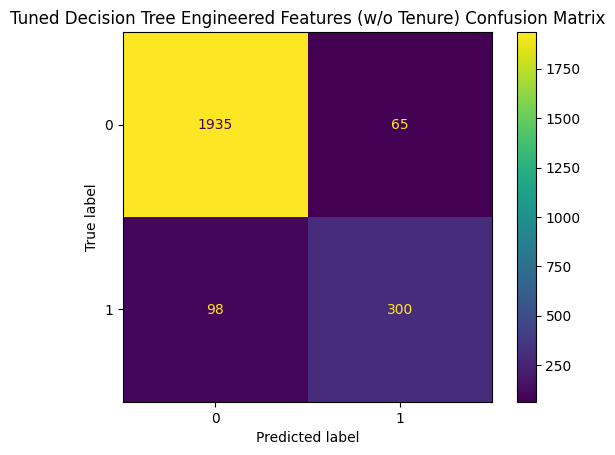

Model  F1 Score    Recall  \
0  Tuned Decision Tree Engineered Features (w/o T...   0.78637  0.753769   

   Precision  Accuracy  
0   0.821918  0.932027

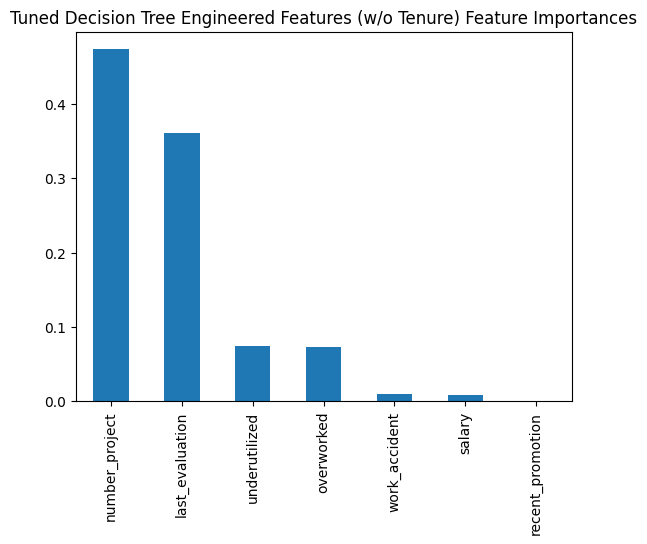

In [243]:
#Optimized Tuned Decision Tree Engineered Features (w/o Tenure)
tdt_ndsfot_opt = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 20, random_state=42)
tdt_ndsfot_opt.fit(X_train, y_train)

#Tuned Decision Tree Engineered Features (w/o Tenure) Prediction 
y_pred = tdt_ndsfot_opt.predict(X_test)

#Optimized Tuned Decision Tree (w/o Tenure) Confusion Matrix
tdt_ndsfot_opt._cm = confusion_matrix(y_test, y_pred, labels=tdt_ndsfot_opt.classes_)
tdt_ndsfot_opt._disp = ConfusionMatrixDisplay(confusion_matrix=tdt_ndsfot_opt._cm, display_labels=tdt_ndsfot_opt.classes_)
tdt_ndsfot_opt._disp.plot(values_format='')
plt.title('Tuned Decision Tree Engineered Features (w/o Tenure) Confusion Matrix')
plt.show()

#Tuned Decision Tree Engineered Features (w/o Tenure) Feature Importance
tuned_decision_ndsfot_importances = pd.Series(tdt_ndsfot_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Tuned Decision Tree Engineered Features (w/o Tenure) Feature Importances")
tuned_decision_ndsfot_importances.plot.bar(ax=ax);

#Tuned Decision Tree Engineered Features (w/o Tenure) Result Table
tdt_ndsfot_opt_results = evaluate_model("Tuned Decision Tree Engineered Features (w/o Tenure)", tdt_ndsfot_opt, X_test, y_test)
tdt_ndsfot_table = pd.DataFrame(tdt_ndsfot_opt_results)
tdt_ndsfot_table

In [244]:
#Random Forest Model - Engineered Features w/o Tenure
rf_ndsfot = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [8, 9, 10, 14], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_ndsfot_cv = GridSearchCV(rf_ndsfot, cv_params, scoring=scoring, cv=5, refit='f1')

In [245]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
rf_ndsfot_cv.fit(X_train, y_train)

CPU times: total: 9min 14s
Wall time: 9min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 9, 10, 14], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [246]:
#Find Best Parameters of Previous Model
rf_ndsfot_cv.best_params_ 

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

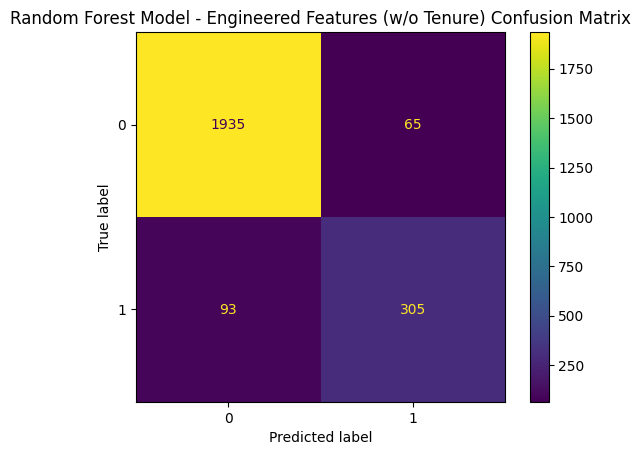

Model  F1 Score    Recall  \
0  Random Forest Model - Engineered Features (w/o...  0.794271  0.766332   

   Precision  Accuracy  
0   0.824324  0.934112

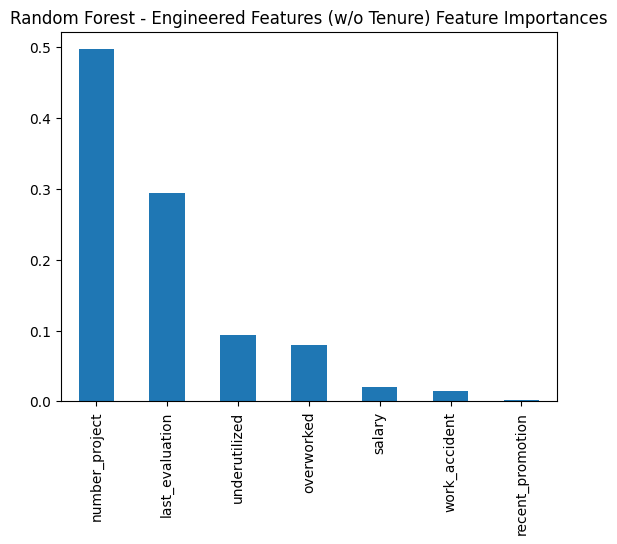

In [247]:
# Random Forest Engineered Features Optimal Model (w/o Tenure)
rf_ndsfot_cv_opt = RandomForestClassifier(n_estimators = 150, max_depth = 9, 
                                min_samples_leaf = 3, min_samples_split = 2,
                                max_features = 4, random_state = 42)
rf_ndsfot_cv_opt.fit(X_train, y_train)
y_pred = rf_ndsfot_cv_opt.predict(X_test)

#Random Forest Optimal Engineered Features (w/o Tenure) Confusion Matrix
rf_ndsfot_cv_opt_cm = confusion_matrix(y_test, y_pred, labels=rf_ndsfot_cv_opt.classes_)
rf_ndsfot_cv_opt_disp = ConfusionMatrixDisplay(confusion_matrix=rf_ndsfot_cv_opt_cm, display_labels=rf_ndsfot_cv_opt.classes_)
rf_ndsfot_cv_opt_disp.plot(values_format='')
plt.title('Random Forest Model - Engineered Features (w/o Tenure) Confusion Matrix')
plt.show()

#Random Forest Engineered Features (w/o Tenure) Feature Importance
random_forest_ndsfot_importances = pd.Series(rf_ndsfot_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Random Forest - Engineered Features (w/o Tenure) Feature Importances")
random_forest_ndsfot_importances.plot.bar(ax=ax);

#Random Forest Engineered Features (w/o Tenure) Results
rf_ndsfot_results = evaluate_model("Random Forest Model - Engineered Features (w/o Tenure)", rf_ndsfot_cv_opt, X_test, y_test)
rf_ndsfot_table = pd.DataFrame(rf_ndsfot_results)
rf_ndsfot_table

In [248]:
#Instantiating XGB Model Engineered Features (w/o Tenure)
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 
 
cv_params = {
                        'max_depth': [3],  # Broader range for tree depth
                        'min_child_weight': [1], # Consider smaller weights for potential complex splits
                        'learning_rate': [0.1],      # Start with a moderate learning rate
                        'n_estimators': [100],       # Keep it manageable for the initial phase
                        'subsample': [0.8],          # Start with a reasonable subsample ratio
                        'colsample_bytree': [0.8],   # Start with a reasonable feature subsample ratio
                        'gamma': [0.2],       # Regularization to control node splitting
                        'reg_alpha': [0.1],      # L1 regularization
                        'reg_lambda': [1]     # L2 regularization
            }

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_ndoft_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [249]:
%%time
#RUN THIS ONLY IF NECESSARY!!!
#Fitting XGB Model Engineered Features (w/o Tenure)
xgb_ndoft_cv.fit(X_train, y_train)
xgb_ndoft_cv.best_params_

CPU times: total: 3.64 s
Wall time: 299 ms


{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'subsample': 0.8}

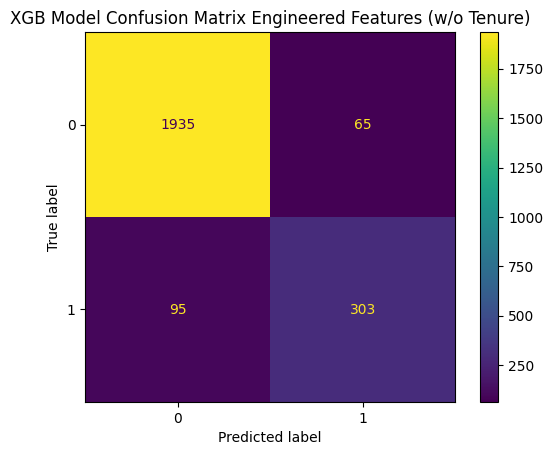

Model  F1 Score    Recall  Precision  \
0  XGB Model Engineered Features (w/o Tenure)  0.791123  0.761307    0.82337   

   Accuracy  
0  0.933278

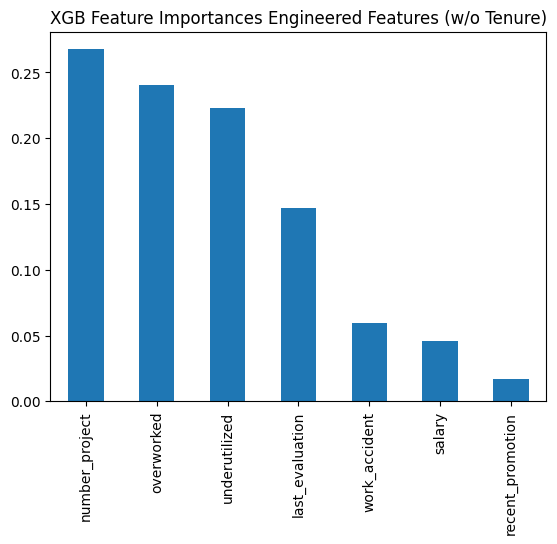

In [250]:
#XGB Optimal Classifier Engineered Features (w/o Tenure)
xgb_ndoft_opt = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, reg_alpha = 0.1,\
                           max_depth = 3, min_child_weight = 1, n_estimators = 100, subsample = 0.8, gamma = 0.2,\
                           reg_lambda = 1, random_state=42)
xgb_ndoft_opt.fit(X_train, y_train)
y_pred = xgb_ndoft_opt.predict(X_test)

#Optimized XGB Model Engineered Features (w/o Tenure) Confusion Matrix
xgb_ndoft_opt_cm = confusion_matrix(y_test, y_pred, labels=xgb_ndoft_opt.classes_)
xgb_ndoft_opt_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_ndoft_opt_cm, display_labels=xgb_ndoft_opt.classes_)
xgb_ndoft_opt_disp.plot(values_format='')
plt.title('XGB Model Confusion Matrix Engineered Features (w/o Tenure)')
plt.show()

#XGB Feature Importance Engineered Features
xgb_ndoft_importances = pd.Series(xgb_ndoft_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
plt.title("XGB Feature Importances Engineered Features (w/o Tenure)")
xgb_ndoft_importances.plot.bar(ax=ax);

#XGB Model Engineered Features Results
xgb_ndoft_results = evaluate_model("XGB Model Engineered Features (w/o Tenure)", xgb_ndoft_opt, X_test, y_test)
xgb_ndoft_table = pd.DataFrame(xgb_ndoft_results)
xgb_ndoft_table

In [251]:
#Round 5 Model Results (Engineered Features)

Round_5_Table = pd.concat([tdt_ndsfot_table, rf_ndsfot_table, xgb_ndoft_table])
Round_5_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0  Random Forest Model - Engineered Features (w/o...  0.794271  0.766332   
1         XGB Model Engineered Features (w/o Tenure)  0.791123  0.761307   
2  Tuned Decision Tree Engineered Features (w/o T...  0.786370  0.753769   

   Precision  Accuracy  
0   0.824324  0.934112  
1   0.823370  0.933278  
2   0.821918  0.932027

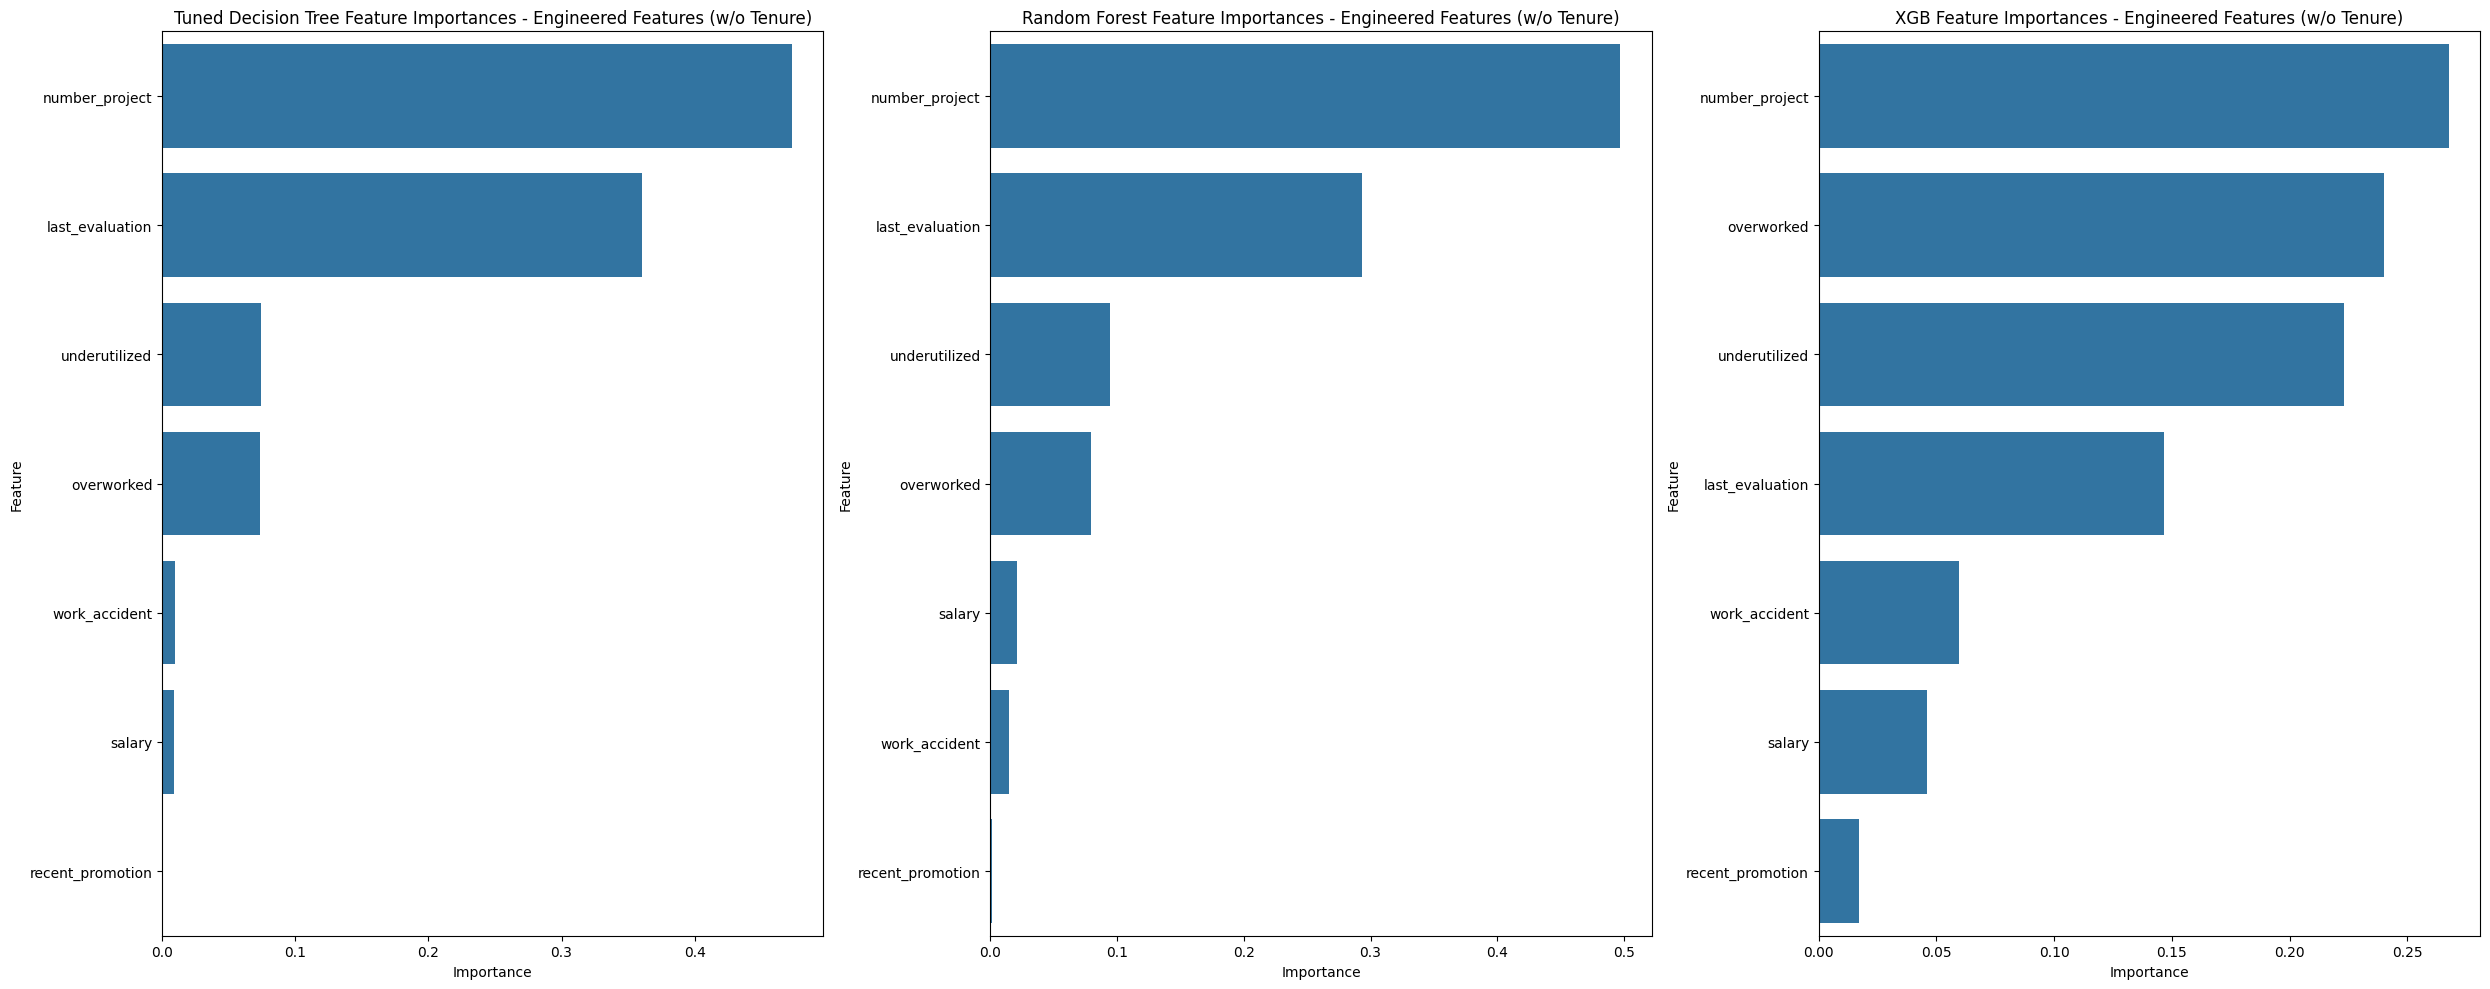

In [252]:
#Feature Importance Charts for Top 3 Models (Engineered Features w/o Tenure)
fig, axes = plt.subplots(1, 3, figsize=(25,10))

sns.barplot(x = xgb_ndoft_importances.values, y = xgb_ndoft_importances.index, ax=axes[2])
axes[2].set_title("XGB Feature Importances - Engineered Features (w/o Tenure)")
axes[2].set_xlabel("Importance")
axes[2].set_ylabel("Feature")

sns.barplot(x = random_forest_ndsfot_importances.values, y = random_forest_ndsfot_importances.index, ax=axes[1])
axes[1].set_title("Random Forest Feature Importances - Engineered Features (w/o Tenure)")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Feature")

sns.barplot(x = tuned_decision_ndsfot_importances.values, y = tuned_decision_ndsfot_importances.index, ax=axes[0])
axes[0].set_title("Tuned Decision Tree Feature Importances - Engineered Features (w/o Tenure)")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

plt.tight_layout()

In [253]:
# Final Results (+Round 5)
Final_Table = pd.concat([Round_1_Table, Round_2_Table, Round_3_Table, Round_4_Table, Round_5_Table])
Final_Table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Model  F1 Score    Recall  \
0                  Random Forest Model w/o Department  0.962656  0.935484   
1                  Tuned Decision Tree w/o Department  0.960328  0.943548   
2                            XGB Model w/o Department  0.953168  0.930108   
3       Random Forest Model w/o Department + Outliers  0.951157  0.929648   
4                 XGB Model w/o Department + Outliers  0.942234  0.922111   
5       Tuned Decision Tree w/o Department + Outliers  0.938303  0.917085   
6                        Decision Tree w/o Department  0.930667  0.938172   
7             Decision Tree w/o Department + Outliers  0.924035  0.932161   
8           Random Forest Model - Engineered Features  0.917617  0.909548   
9                                 Tuned Decision Tree  0.909091  0.900538   
10                      XGB Model Engineered Features  0.906769  0.891960   
11            Tuned Decision Tree Engineered Features  0.905128  0.886935   
12                                          XGB Model  0.901218  0.895161   
13                                Random Forest Model  0.899598  0.903226   
14                Decision Tree - Engineered Features  0.865823  0.859296   
15                                      Decision Tree  0.817961  0.905914   
16  Random Forest Model - Engineered Features (w/o...  0.794271  0.766332   
17         XGB Model Engineered Features (w/o Tenure)  0.791123  0.761307   
18  Tuned Decision Tree Engineered Features (w/o T...  0.786370  0.753769   
19                   Naive Bayes Model w/o Department  0.648715  0.712366   
20  Multiple Logistic Regression Model w/o Department  0.319266  0.233871   
21                 Multiple Logistic Regression Model  0.105505  0.061828   
22                                  Naive Bayes Model  0.000000  0.000000   

    Precision  Accuracy  
0    0.991453  0.987854  
1    0.977716  0.986955  
2    0.977401  0.984705  
3    0.973684  0.984153  
4    0.963255  0.981234  
5    0.960526  0.979983  
6    0.923280  0.976608  
7    0.916049  0.974562  
8    0.925831  0.972894  
9    0.917808  0.969861  
10   0.922078  0.969558  
11   0.924084  0.969141  
12   0.907357  0.967161  
13   0.896000  0.966262  
14   0.872449  0.955796  
15   0.745575  0.932524  
16   0.824324  0.934112  
17   0.823370  0.933278  
18   0.821918  0.932027  
19   0.595506  0.870895  
20   0.502890  0.833108  
21   0.359375  0.824561  
22   0.000000  0.832659

# Round 5 Insights:
- After the removal of the tenure variable, predictive power starts to significantly decrease to about ~.79 for our models.
- Even though these are technically the most actionable models, the significant drop in predictive power doesn't justify modeling with actionable features only.
    - In turn, these models will not be selected as a champion model.

💭



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Reflection Results:
1. See 'Champion Model Summary:' section below.
2. See 'Champion Model Summary:' section below.
3. See 'Champion Model Summary:' section below.
4. See 'Champion Model Summary:' section below.
5. See 'Champion Model Summary:' section below.
6. At this point, we are still using Python w/Jupyter Notebooks along with AI integration to help with code debugging.
7. Since the satisfaction level variable was found to be likely suffering from data bias and manipulation, picking a model that has high predictive power but also includes satisfaction level as a feature may be problematic.  For example, if the method for collecting satisfaction level surveys improves, the model will likely become less efficient at making accurate predictions because the model is based on old data collection processes.  If the biases in collecting satisfaction level surveys remain, we fail to address the issues that lead to manipulated satisfaction levels which can also lead to increased turnover.  
 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




# <u>Champion Model Selection:</u>
- We have completed multiple rounds of modeling by removing, transforming, and feature engineering variables.
- We have a good understanding of the structure and features of the data and plenty of options of models to choose from.
- A champion model to run on an unseen test set must be selected.
    - However, selecting a model with the highest predictive power (in our case: Random Forest Model w/o Department) is not necessarily the best option.
        - Even though Random Forest Model w/o Department had the best predictive power, it excludes relevant outliers from our data and lacks in actionable features.
            - Moreover, the difference between predictive scores of "Random Forest Model w/o Department" and "Random Forest Model w/o Department + Outliers" is incredibly low (less than .1-.2 across all predictive scores) and is likely not statistically significant.
                - In turn, we will disqualify models that exclude outliers in our selection process.
    - Choosing a model with more actionable features such as the "Random Forest Model - Engineered Features" has drawbacks.
        - The primary one is a minor decrease in predictive power.
            - Regardless of the decrease, the ability to not only make relatively accurate predictions but also derive clear, actionable insights from the model could be invaluable to Salifort Motors' business goals.
- In this case, we need to remember what the Salifort Motors Leadership requested:
    - "Analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company."
        - Based on that, the "Random Forest Model w/o Department + Outliers" would suffice based on the business objective alone.
        - However, the "Random Forest Model - Engineered Features" provides very good insights and is only slightly less predictive.
- This is a rare case, where I will present two models to the leadership team, explain the benefits and drawbacks of each, and let them decide how to proceed.
- So we will do two champion runs: one for "Random Forest Model w/o Department + Outliers" and the other for "Random Forest Model - Engineered Features".
  

### <u>**Champion Model Evaluation Function:**</u>
- To make results easier to display and include AUC scores, I made a 'Champion Model Evaluation Function' to extract the accuracy, precision, recall, f1-score, and AUC from a model run.
- AUC score is important because it allows us to evaluate how a model distinguishes classes.
    - This will be important consideration when HR chooses which model to use moving forward.

In [37]:
#Champ Model Evaluation Function - Displays model score based on latest run.
def evaluate_champ_model(model_name, model, X_val_data, y_val_data):
    """
    Evaluates a trained classification model and returns a dictionary
    containing the model name, F1 score, recall, precision, accuracy, and AUC score.
    """
    y_pred = model.predict(X_val_data)
    accuracy = accuracy_score(y_val_data, y_pred)
    precision = precision_score(y_val_data, y_pred, zero_division=0)
    recall = recall_score(y_val_data, y_pred, zero_division=0)
    f1 = f1_score(y_val_data, y_pred, zero_division=0)
    
    # Calculate AUC score from predicted probabilities
    y_prob = model.predict_proba(X_val_data)[:, 1]
    auc_score = roc_auc_score(y_val_data, y_prob)
    
    # Compile all results into a single dictionary
    results = {
        'Model': [model_name],  # Wrap in a list to create a column with one value
        'F1 Score': [f1],
        'Recall': [recall],
        'Precision': [precision],    
        'Accuracy': [accuracy],    
        'AUC Score': [auc_score]
    }
    
    return results

### <u>**Important Note:**</u>
- Since we're including AUC score in the model, we'll also include the ROC (Receiver Operating Characteristic) curve to visualize how changing the threshold (currently 0.5) will affect model performance.

# Champ Test 1 - Random Forest Model w/o Department + Outliers

In [38]:
#Base Data (All-Separated + No Department + Outliers)
df1_no_department_o = df1.copy()
X = df1_no_department_o.drop(columns=['left'], axis=1)
y = df1_no_department_o['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state = 42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Removing Department for Train Set
X_train = X_train.drop(columns = 'department')

#Transforming Test and Champion Test
#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Removing Department for Test Set + Champion
X_test = X_test.drop(columns = 'department')
X_champ_test = X_champ_test.drop(columns = 'department')

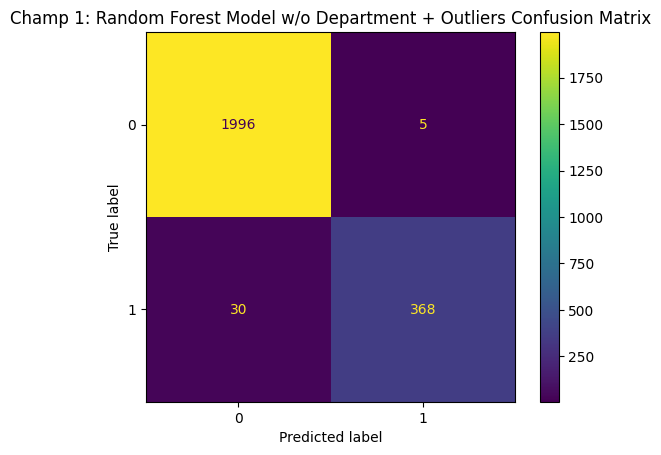

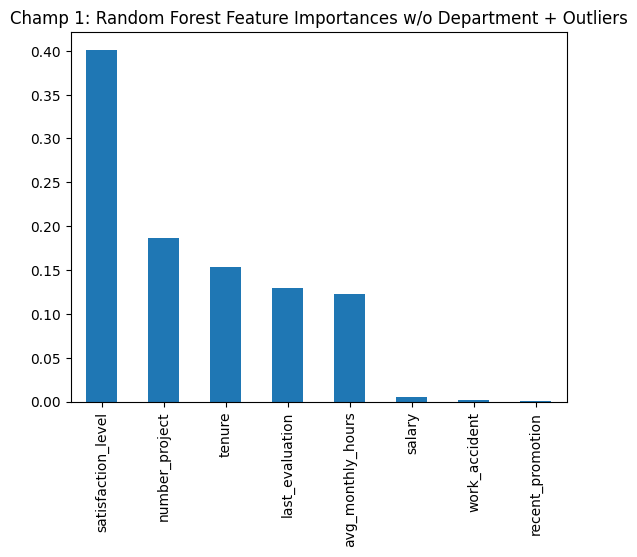

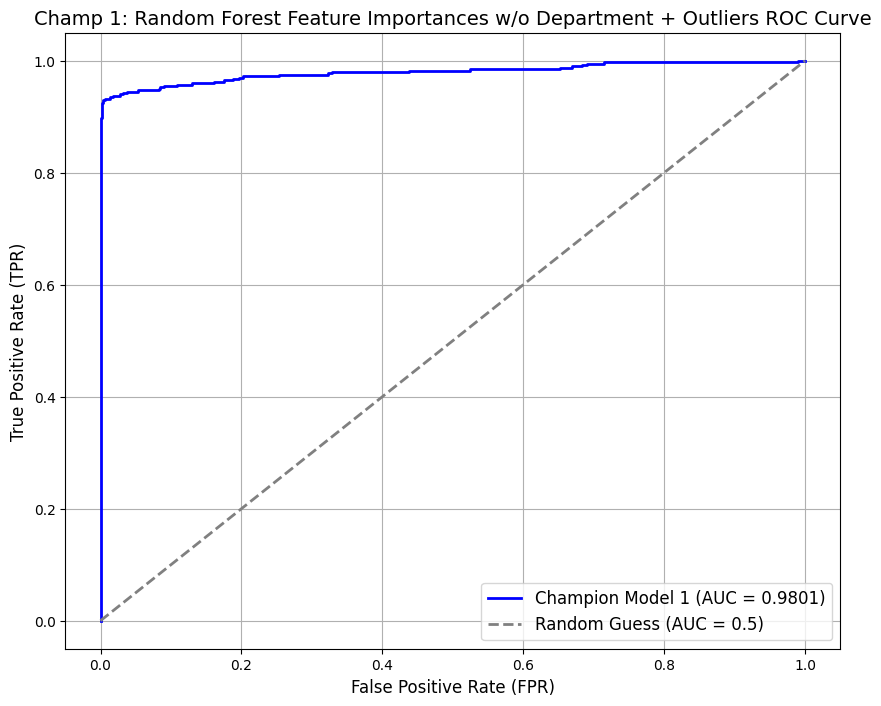

Model  F1 Score    Recall  \
0  Champ 1: Random Forest Model w/o Department + ...  0.954604  0.924623   

   Precision  Accuracy  AUC Score  
0   0.986595  0.985411   0.980127

In [39]:
#Champion 1 Run - Random Forest w/o Department + Outliers Optimal Model
rf_ndo_cv_opt = RandomForestClassifier(n_estimators = 125, max_depth = 10, 
                                min_samples_leaf = 1, min_samples_split = 2,
                                max_features= 4, random_state = 42)

rf_ndo_cv_opt.fit(X_train, y_train)
y_pred = rf_ndo_cv_opt.predict(X_champ_test)

#Champ 1 - Random Forest w/o Department + Outliers Confusion Matrix
rf_ndo_cv_opt_champ1_cm = confusion_matrix(y_champ_test, y_pred, labels=rf_ndo_cv_opt.classes_)
rf_ndo_cv_opt_champ1_disp = ConfusionMatrixDisplay(confusion_matrix=rf_ndo_cv_opt_champ1_cm, display_labels=rf_ndo_cv_opt.classes_)
rf_ndo_cv_opt_champ1_disp.plot(values_format='')
plt.title('Champ 1: Random Forest Model w/o Department + Outliers Confusion Matrix')
plt.show()

#Champ 1 - Random Forest w/o Department + Outliers Feature Importance
champ1_random_forest_ndo_importances = pd.Series(rf_ndo_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Champ 1: Random Forest Feature Importances w/o Department + Outliers")
champ1_random_forest_ndo_importances.plot.bar(ax=ax);

#Champ 1 - Random Forest w/o Department + Outliers ROC Curve
y_prob1 = rf_ndo_cv_opt.predict_proba(X_champ_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_champ_test, y_prob1)
auc_score1 = auc(fpr1, tpr1)
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Champion Model 1 (AUC = {auc_score1:.4f})', color='blue', linewidth=2)
# Plot the baseline random guess line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)', linewidth=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Champ 1: Random Forest Feature Importances w/o Department + Outliers ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

#Random Forest w/o Department + Outliers Results
rf_ndo_cv_champ1_results = evaluate_champ_model("Champ 1: Random Forest Model w/o Department + Outliers", rf_ndo_cv_opt, X_champ_test, y_champ_test)
rf_ndo_cv_champ1_table = pd.DataFrame(rf_ndo_cv_champ1_results)
rf_ndo_cv_champ1_table

# Champ Test 2 - "Random Forest Model - Engineered Features"

In [40]:
#Base Data (All-Separated + No Department and Satisfaction Level + Feature Engineered Variables and Outliers)
df1_fe = df1.copy()
X = df1_fe.drop(columns=['left'], axis=1)
y = df1_fe['left']

#Separate Validation and Champion Sets
X_dev, X_champ_test, y_dev, y_champ_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size=0.25, stratify = y_dev, random_state = 42)

#Transforming Salary for Train Set
salary_codes = {'low': 0, 'medium': 1, 'high': 2}
X_train['salary'] = X_train['salary'].map(salary_codes)

#Feature Engineering underutilized and Overworked For Training Data
X_train['overworked'] = (X_train['avg_monthly_hours'] > 200).astype(int)
X_train['underutilized'] = (X_train['avg_monthly_hours'] < 167).astype(int)

#Removing Satisfaction Levels + Department for Train Set
X_train = X_train.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours'])

#Transforming Test and Champion Test

#Transform Salary in Test and Champion Test
X_test['salary'] = X_test['salary'].map(salary_codes)
X_champ_test['salary'] = X_champ_test['salary'].map(salary_codes)

#Feature Engineering underutilized and Overworked For Test and Champion Test
X_test['overworked'] = (X_test['avg_monthly_hours'] > 200).astype(int)
X_test['underutilized'] = (X_test['avg_monthly_hours'] < 167).astype(int)
X_champ_test['overworked'] = (X_champ_test['avg_monthly_hours'] > 200).astype(int)
X_champ_test['underutilized'] = (X_champ_test['avg_monthly_hours'] < 167).astype(int)

#Removing Satisfaction Levels + Department for Test Set
X_test = X_test.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours'])

#Removing Satisfaction Levels + Department for Champion Set
X_champ_test = X_champ_test.drop(columns = ['department', 'satisfaction_level', 'avg_monthly_hours'])

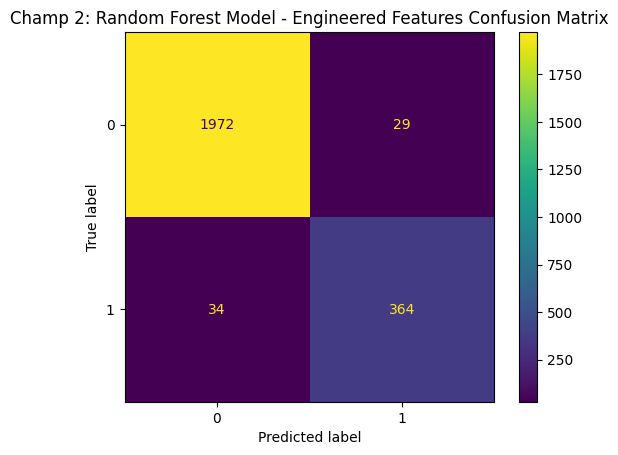

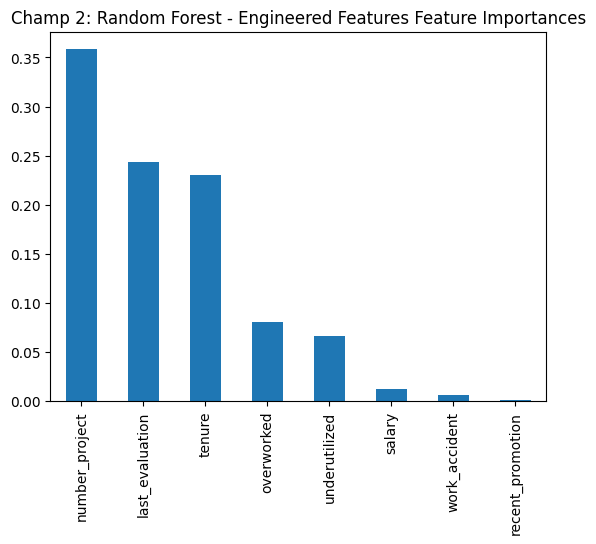

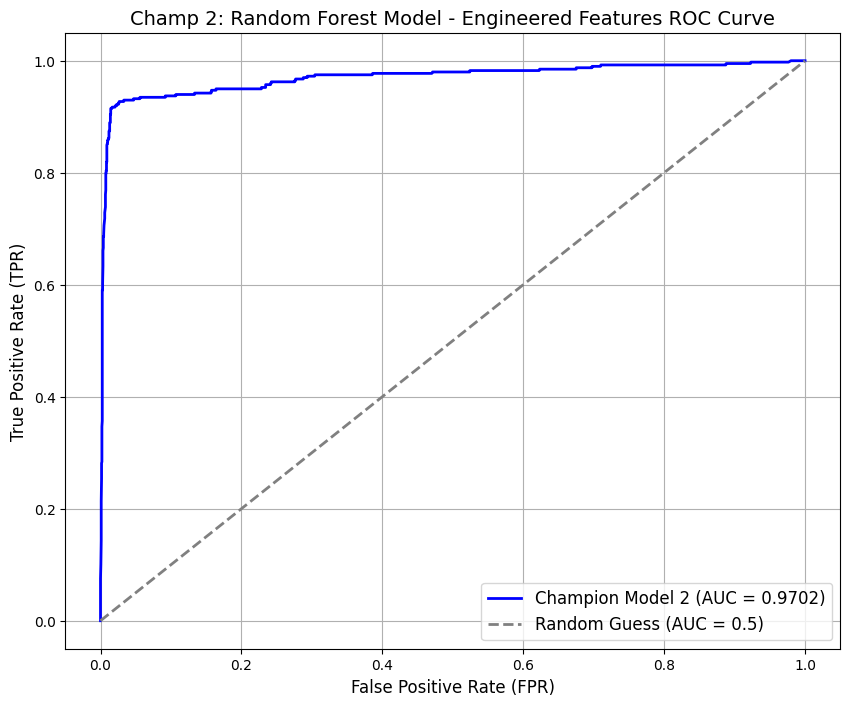

Model  F1 Score    Recall  \
0  Champ 2: Random Forest Model - Engineered Feat...  0.920354  0.914573   

   Precision  Accuracy  AUC Score  
0   0.926209  0.973739   0.970217

In [42]:
#Champ 2 - Random Forest - Engineered Features Optimal Model
rf_ndsfo_cv_opt = RandomForestClassifier(n_estimators = 100, max_depth = 8, 
                                min_samples_leaf = 1, min_samples_split = 3,
                                max_features = 4, random_state = 42)
rf_ndsfo_cv_opt.fit(X_train, y_train)
y_pred = rf_ndsfo_cv_opt.predict(X_champ_test)

#Champ 2 - Random Forest - Engineered Features Confusion Matrix
rf_ndsfo_cv_opt_champ2_cm = confusion_matrix(y_champ_test, y_pred, labels=rf_ndsfo_cv_opt.classes_)
rf_ndsfo_cv_opt_champ2_disp = ConfusionMatrixDisplay(confusion_matrix=rf_ndsfo_cv_opt_champ2_cm, display_labels=rf_ndsfo_cv_opt.classes_)
rf_ndsfo_cv_opt_champ2_disp.plot(values_format='')
plt.title('Champ 2: Random Forest Model - Engineered Features Confusion Matrix')
plt.show()

#Champ 2 - Random Forest - Engineered Features Feature Importance
champ2_random_forest_ndsfo_importances = pd.Series(rf_ndsfo_cv_opt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
ax.set_title("Champ 2: Random Forest - Engineered Features Feature Importances")
champ2_random_forest_ndsfo_importances.plot.bar(ax=ax);

#Champ 2 - Random Forest - Engineered Features ROC Curve
y_prob2 = rf_ndsfo_cv_opt.predict_proba(X_champ_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_champ_test, y_prob2)
auc_score2 = auc(fpr2, tpr2)
plt.figure(figsize=(10, 8))
plt.plot(fpr2, tpr2, label=f'Champion Model 2 (AUC = {auc_score2:.4f})', color='blue', linewidth=2)
# Plot the baseline random guess line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)', linewidth=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Champ 2: Random Forest Model - Engineered Features ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

#Champ 2 - Random Forest - Engineered Features Department Results
rf_ndsfo_champ2_results = evaluate_champ_model("Champ 2: Random Forest Model - Engineered Features", rf_ndsfo_cv_opt, X_champ_test, y_champ_test)
rf_ndsfo_champ2_table = pd.DataFrame(rf_ndsfo_champ2_results)
rf_ndsfo_champ2_table

Model  F1 Score    Recall  \
0  Champ 1: Random Forest Model w/o Department + ...  0.954604  0.924623   
1  Champ 2: Random Forest Model - Engineered Feat...  0.920354  0.914573   

   Precision  Accuracy  AUC Score  
0   0.986595  0.985411   0.980127  
1   0.926209  0.973739   0.970217

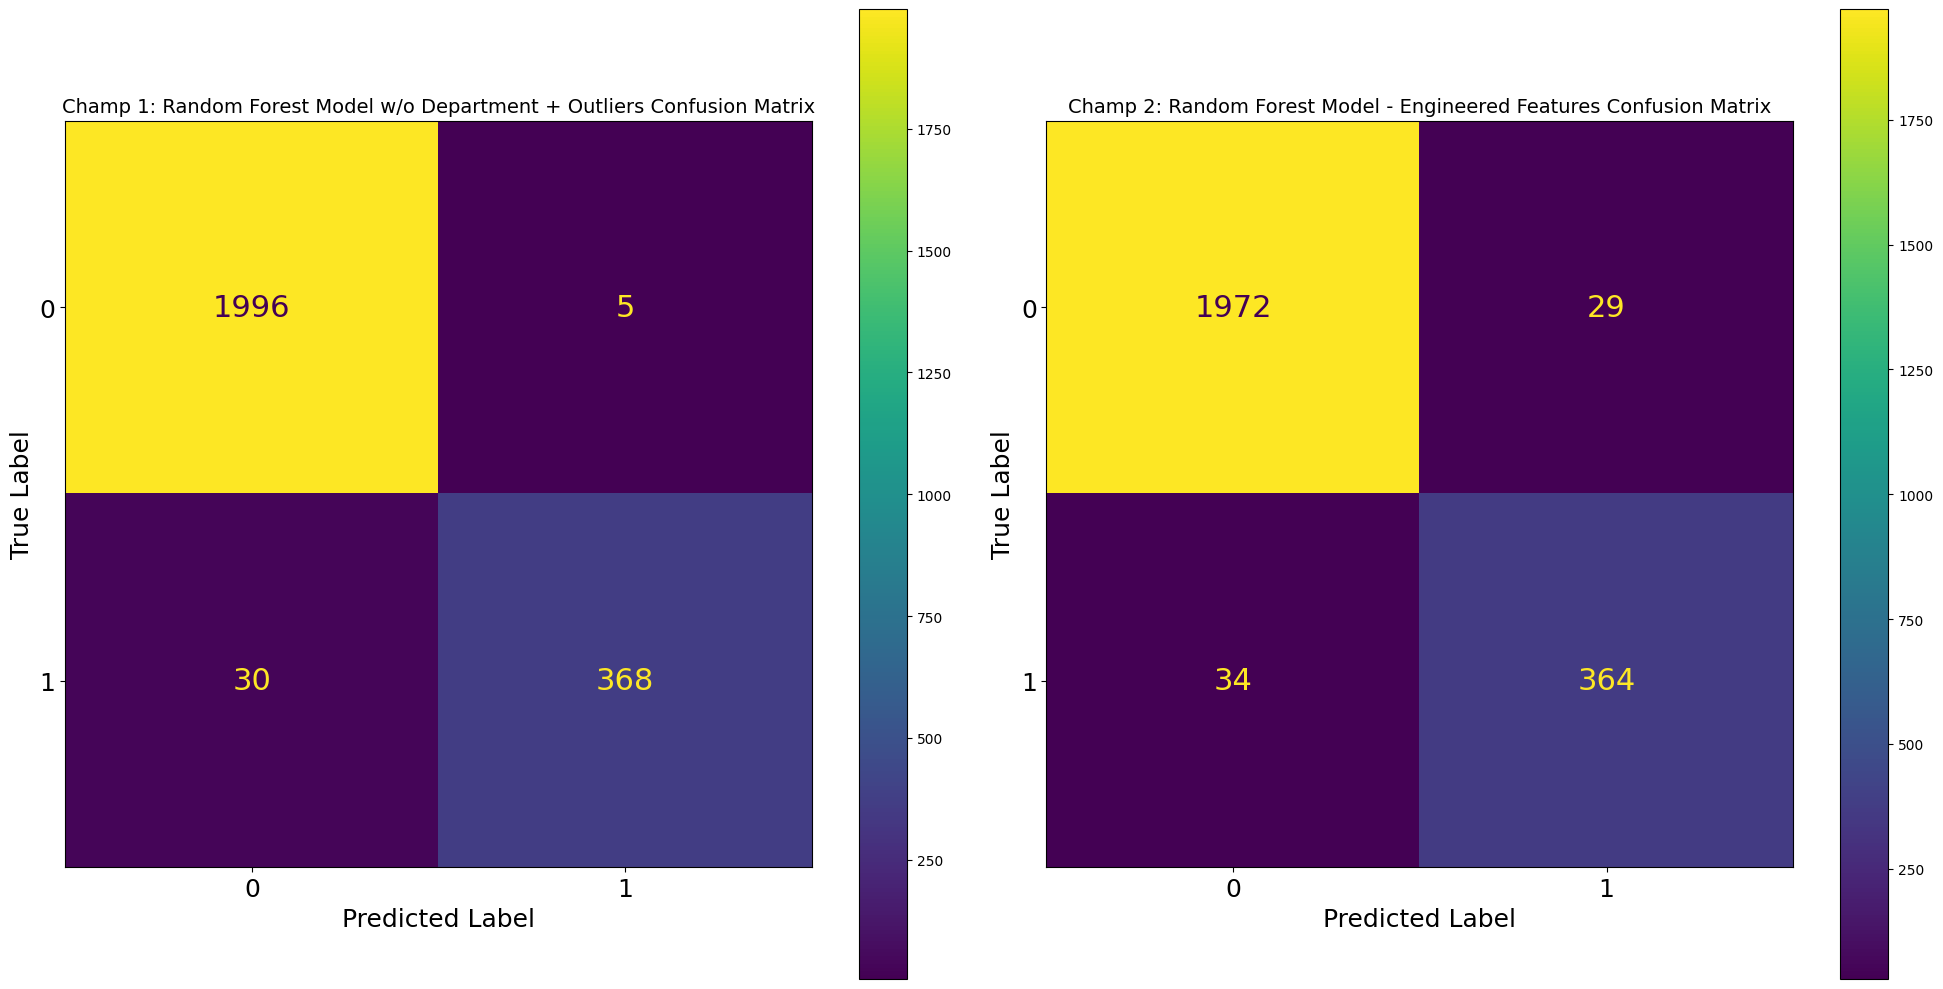

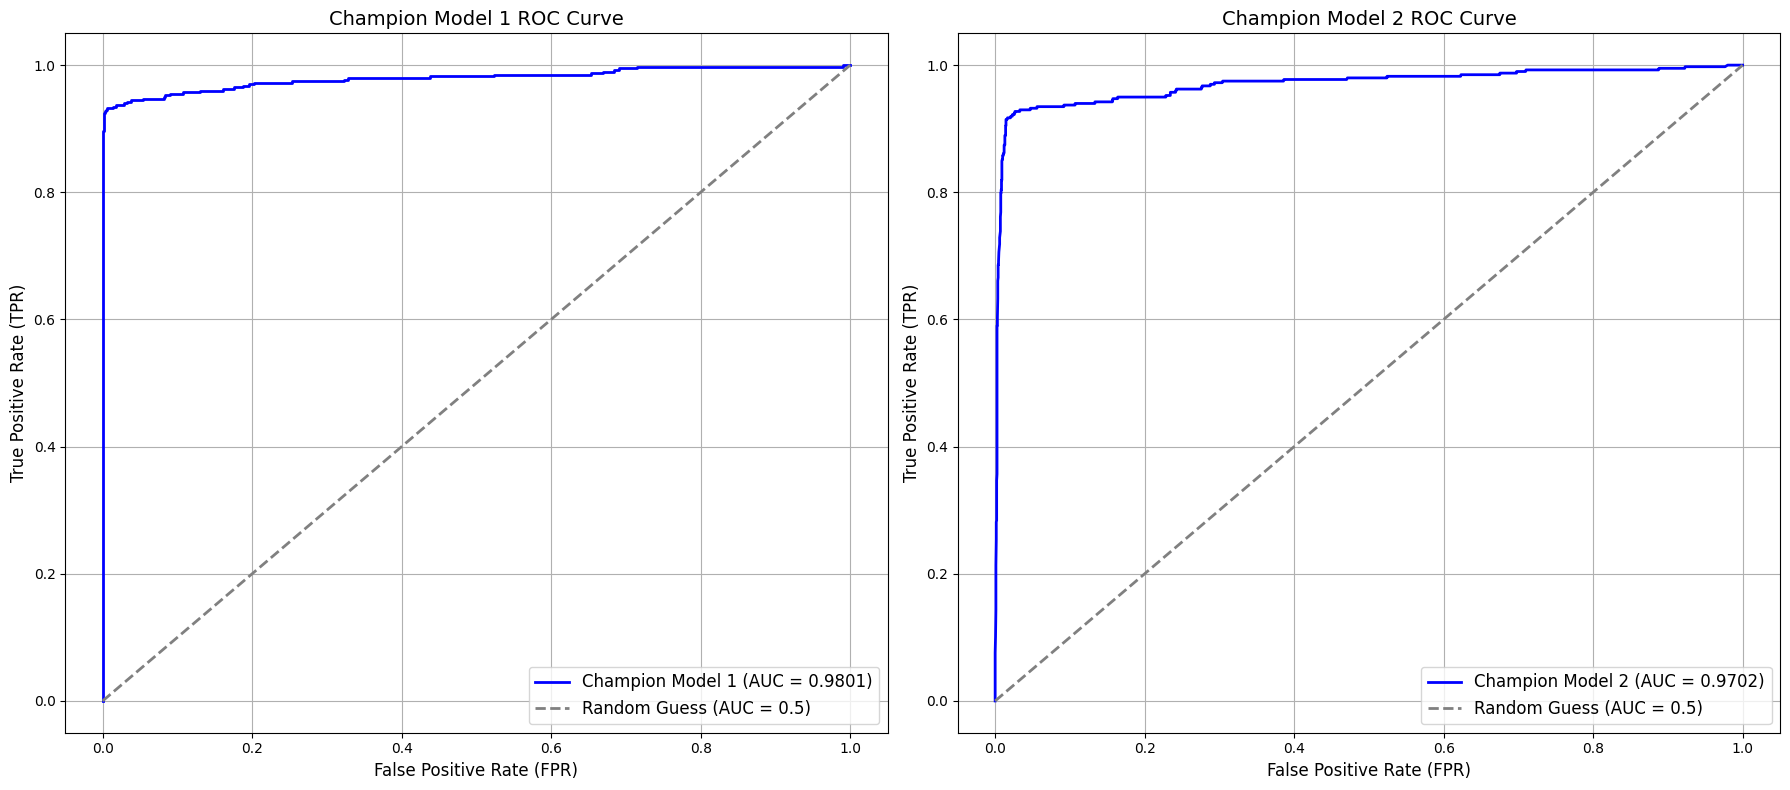

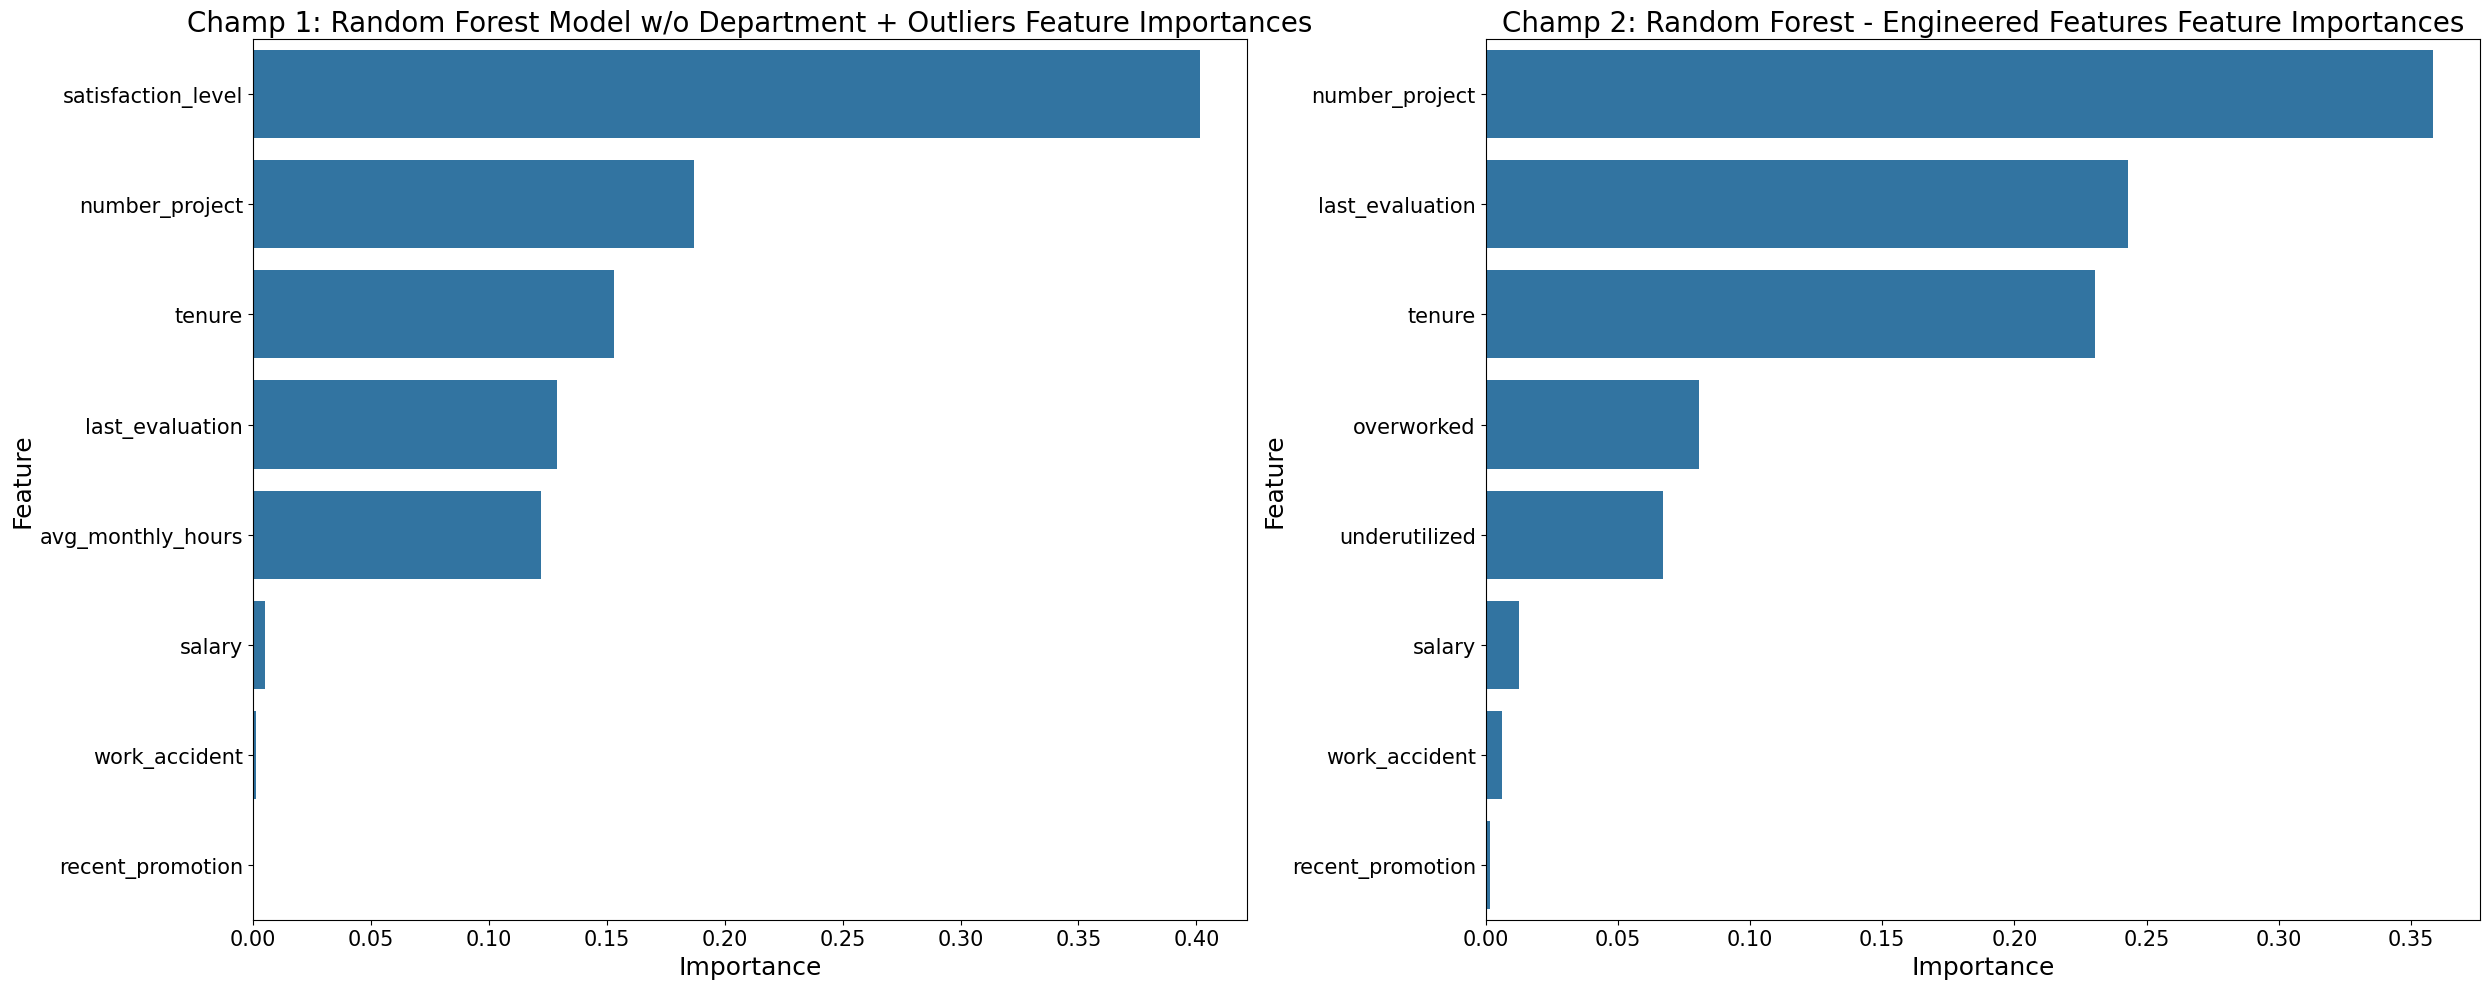

In [43]:
#Champion Comparisons:

#Confusion Matrices For Champion Models
fig, axes = plt.subplots(1, 2, figsize=(20,10))
rf_ndo_cv_opt_champ1_disp.plot(ax = axes[0], values_format='')
axes[0].set_title('Champ 1: Random Forest Model w/o Department + Outliers Confusion Matrix', fontsize=14)
axes[0].set_xlabel("Predicted Label", fontsize=18)
axes[0].set_ylabel("True Label", fontsize=18)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)

rf_ndsfo_cv_opt_champ2_disp.plot(ax = axes[1], values_format='')
axes[1].set_title('Champ 2: Random Forest Model - Engineered Features Confusion Matrix', fontsize=14)
axes[1].set_xlabel("Predicted Label", fontsize=18)
axes[1].set_ylabel("True Label", fontsize=18)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
for ax in axes:
    for text in ax.texts:
        text.set_size('22')  # Try 'medium', 'large', or a float
plt.tight_layout()

#ROC Curves for Champion Models
#Defining the plots for each ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot Champion Model 1's ROC Curve on the first subplot
ax1.plot(fpr1, tpr1, label=f'Champion Model 1 (AUC = {auc_score1:.4f})', color='blue', linewidth=2)
ax1.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)', linewidth=2)
ax1.set_xlabel('False Positive Rate (FPR)', fontsize=12)
ax1.set_ylabel('True Positive Rate (TPR)', fontsize=12)
ax1.set_title('Champion Model 1 ROC Curve', fontsize=14)
ax1.legend(loc='lower right', fontsize=12)
ax1.grid(True)

# Plot Champion Model 2's ROC Curve on the second subplot
ax2.plot(fpr2, tpr2, label=f'Champion Model 2 (AUC = {auc_score2:.4f})', color='blue', linewidth=2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)', linewidth=2)
ax2.set_xlabel('False Positive Rate (FPR)', fontsize=12)
ax2.set_ylabel('True Positive Rate (TPR)', fontsize=12)
ax2.set_title('Champion Model 2 ROC Curve', fontsize=14)
ax2.legend(loc='lower right', fontsize=12)
ax2.grid(True)
plt.tight_layout()

#Feature Importance Charts for Champion Models
fig, axes = plt.subplots(1, 2, figsize=(25,10))
sns.barplot(x = champ2_random_forest_ndsfo_importances.values, y = champ2_random_forest_ndsfo_importances.index, ax=axes[1])
axes[1].set_title("Champ 2: Random Forest - Engineered Features Feature Importances", fontsize=20)
axes[1].set_xlabel("Importance", fontsize=18)
axes[1].set_ylabel("Feature", fontsize=18)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

sns.barplot(x = champ1_random_forest_ndo_importances.values, y = champ1_random_forest_ndo_importances.index, ax=axes[0])
axes[0].set_title("Champ 1: Random Forest Model w/o Department + Outliers Feature Importances", fontsize=20)
axes[0].set_xlabel("Importance", fontsize=18)
axes[0].set_ylabel("Feature", fontsize=18)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
plt.tight_layout()

#Champ Tables:
champ_table = pd.concat([rf_ndo_cv_champ1_table, rf_ndsfo_champ2_table])
champ_table.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

### <u>Summary of Model Results:</u>
- As shown in the champion table above, the predictive scores were very similar between the champion models.
    - The 'Champ 1: Random Forest Model w/o Department + Outliers' had the highest F1-score at 0.954604.
    - The 'Champ 2: Random Forest Model - Engineered Features' was close behind with an F1-score of 0.920354.
    - The biggest difference between the models is with precision.
        - Champ Model 1 which had a score of 0.987 while Champ Model 2 had a precision score of 0.926.
            - This means that Champ Model 2 had a higher likelihood of incorrectly predicting that someone will leave when they would actually stay.
                - This could be problematic if the cost to retain an employee is very high.
                    - In other words, we would be wasting extra resources retaining employees that are already likely to stay. 
    - Regardless, both models performed very well at making predictions.
- The confusion matrices show how to translate those scores into reality.
    - Out of 2,399 employees:
        - Champ Model 1 correctly predicted 1996 employees stayed and 368 employees left.
            - It incorrectly predicted 30 employees would stay (when they actually left) and incorrectly predicted 5 employees would leave (when they actually stayed).
        - Champ Model 2 correctly predicted 1972 employees stayed while 364 employees left.
            - It incorrectly predicted 34 employees would stay (when they actually left) and incorrectly predicted 29 employees would leave (when they actually stayed).
- The ROC curves show how changing the threshold affects model performance. 
    - The high AUC scores indicate the models have strong predictive power and can accurately identify classes.
    - As mentioned earlier, if the cost of retaining employee is cost prohibitively expensive, adjusting the threshold to a higher value may be necessary to reduce our false positive rate (FPR).
        - The excellent performance of our models suggests that we can likely achieve a significant reduction in false positives with only a minimal trade-off in true positive, especially in Champ Model 2.
- The important features of each model were similar also.
    - The Champ Model 1's most important features were:
        1. Satisfaction Level
        2. Number of Projects
        3. Tenure
        4. Last Evaluation
        5. Average Monthly Hours
    - The Champ Model 2's most important features were:
        1. Number of Projects
        2. Last Evaluation
        3. Tenure
        4. Overworked
        5. Underutilized

## <u>Conclusions:</u>
- All in all, the insights extracted from the EDA and Model development shows that there's a lot of issues that need to be addressed.  
    1. Resource Management/Training Issues:
        - Many of the tenured employees who left are working long hours and have more (+4) projects and are likely suffering from burnout.
        - Most of the 3 year tenured employees who left were working less hours and had fewer projects based on average monthly hours and project distributions by tenure.
            - This is most likely due to lack of training and support.
            - There's a possibility that they are being improperly offboarded.
                - Managers may be reducing their hours until they are forced to quit.
            - Either way, as the 3 year tenured employees leave the company, the workload would get transferred to the more tenured employees resulting in burnout. 
        - Overall this leads to a problematic cycle that siphons potential and reduces top talent.
    2. Data bias/Manipulation in Satisfaction Level Scoring.
        - Satisfaction level as a scoring metric was shown to likely have some form of data manipulation and bias.
            - It was unrealistically high for 5-6 year tenured employees who left working between 5-6 projects.
            - It also had questionable distributions across different departments.
    3. Last Evaluation Survey Bias:
        - Last Evaluation surveys may be suffering from some type of bias also.
            - Scores were significantly higher for 4+ tenure employees who left.
                - This suggests the scores were artificially inflated to retain them.
                - It could also be a case that management is incentivizing employees that work more projects and longer hours with promises of promotions.
                    - When the employees inevitably burnout and don't receive a promotion, they end up leaving.
            - The bias isn't as bad as with the Satisfaction level Scores, but it needs to be addressed regardless.   
    4. High Workplace Accident Rates:
        -  Workplace accident rates were also quite high at 15.4% of all employees.
            - This means that approximately 1 in 6 employees experienced an accident at work.  
        - However, work accidents were not found to increase turnover rates.
            - Employees were more likely to stay if they had an accident.
                - They were likely receiving some form of worker's compensation.
        - Due to accident rates being high, the data may not pick up trends on reduced satisfaction level and, in turn, increased turnover rates among employees.
            - Employees communicate with each other and often hear about accidents that happen to other employees.
                - This may produce a chilling effect and bring employee morale down as a whole which leads to turnover.
                    - This is nearly impossible to check with the current datasource.
                    - More data would be needed to explore this theory further.
        -  Safety should be a top priority regardless.


## <u>Model Recommendations:</u>
- The selection of the model will depend on the needs of HR and what is their ultimate goal.
- Considerations for model selection:
    - Choose 'Champ Model 1 - Random Forest Model w/o Department + Outliers' if:
        - You need the highest predictive power possible.
        - No immediate changes will be made to company wide policies and procedures.
    - Choose 'Champ Model 2 - Random Forest Model - Engineered Features' if:
        - You want a predictive model with very actionable features.
        - Plan on making changes to company wide policies and procedures based on the insights from this data.
- If I was solely making the choice of which model to select moving forward, I would choose the Champ Model 2 due to the relevant features with actionable insights.
  - The main downside of using this model would be the slightly lower predictive scores of Champ Model 2 compared to Champ Model 1, especially in precision.
      - Regardless, we can clearly see and easily interpret the important features of Champ Model 2 and act on those insights.

### **<u>Suggested Solutions:</u>**

- Since the primary driver of turnover is a training pipeline issue from the 3 year tenured group to 4, 5, and 6 year tenured group, solutions are going to need to start with stop-gap measures (bandaids) then move on to more effective and long-lasting institutional changes.

- **<u>Stop Gap Solutions:</u>**
  1. **Institute Mandatory Project Limits (3-4 projects only):**
        - The optimal number of projects to retain employees was found to be between 3 - 4 projects. 
        - This needs to be done very carefully.
        - The work doesn't suddenly go away; it will need to be completed at some point.
            - Projects will need to be triaged and completed based on deadlines and necessity.
        - Only allow more projects to be completed by an individual employee under certain circumstances:
            - It's an absolute necessity for the survival of the business.
            - The employee has demonstrated they can handle their current workload within or under the sweet spot hourly range of 167.67 average monthly hours (40 hours per week) - 200 average monthly hours (48 hours a week).
  2. **Set Average Monthly Hours Maximums:**
       - Monitor and reduce hours of employees who work over a certain hourly threshold.
           - 200 average monthly hours would be ideal but may need to be adjusted depending on business needs.
           - An important aspect of this plan is to find out why the employees are working so long and provide the necessary support needed for them to succeed.
                - This should reduce hours taken to complete a task and help prevent burnout.
- **<u>Institutional Changes:</u>**
    1. **Develop a Better Training and Support Line for 3 Year Tenured Employees:**
        - This will take time to implement properly.
        - Turnover was incredibly low in the two year tenure group.
            - Taking lessons from that group, modifying those lessons, and applying them to the three year group may be the quickest solution to resolve this.
        - Using a facilitator-like program that takes model employees to support and uptrain employees that are struggling would likely be an effective strategy.
    2.  **Develop a Project Workload Rater:**
        - Develop a system or program that can calculate the required time to complete an individual project.
        - This would allow managers and employees to better understand time commitments for a project and allocate support and resources for employees accordingly.
        - It also would allow an employee's progress to be measured more accurately and fairly than using an unreliable and simplistic metric like number of projects or hours worked.
    3. **Reevaluate Last Evaluation Score System:**
        - Use metrics that are less subjective to judge performance.
        - Make sure it's based on a mixture of quality and quantity of work, not just quantity alone.
            - We don't want situations where managers are giving high scores in an attempt to retain employees or are encouraging conditions for burnout.
        - Most importantly though, we want to make sure that employees who are receiving exemplary scores are the ones being promoted.
    4. **Restructure and Redesign Satisfaction Level Surveys:**
        - Review best data collections processes and procedures with HR.
        - Develop procedures to minimize collection bias and potential data manipulation.
        - Potentially look at using an independent data collection company to collect the data and provide the results.
            - This could potentially improve individual employee trust and limit data manipulation (if found to be a serious issue.)
    5. **Review and Update Workplace Safety Procedures**
        - Review workplace safety procedures and update processes as needed to increase safety.
        - Provide mandatory safety uptraining and support for employees across all departments and tenure levels.
        - Include an accident severity metric column within the survey to see if accident type increases turnover rate.
          